In [1]:
library(data.table)
library(gtools) #Required for smartbind
options(repr.matrix.max.cols=50) #Show 50 cols
options(repr.matrix.max.rows=50) #Show 50 rows
DEBUG = FALSE

rows_to_read = -1

if(DEBUG) {
    rows_to_read = 50
}

In [2]:
train <- fread("../input/train-flattened.csv", nrows=rows_to_read, colClasses=c(date='character',trafficSource.campaignCode='character'))
test <- fread("../input/test-flattened.csv", nrows=rows_to_read, colClasses=c(date='character'))

In [3]:
# Convert some columns
train$date <- as.Date(train$date, format='%Y%m%d')
test$date <- as.Date(test$date, format='%Y%m%d')

Which columns in test are not found in train?

In [4]:
setdiff(colnames(train),colnames(test))

[1] "totals.transactionRevenue"  "trafficSource.campaignCode"

In [5]:
train$trafficSource.campaignCode <- NULL
test$totals.transactionRevenue <- -1

In [6]:
tr_te <- smartbind(train,test)

Warning message in smartbind(train, test):
“Converting non-atomic type column 'date' to type character.”Warning message in smartbind(train, test):
“Converting non-atomic type column 'totals.transactionRevenue' to type character.”Warning message in smartbind(train, test):
“Converting non-atomic type column 'date' to type character.”Warning message in smartbind(train, test):
“Column class mismatch for 'totals.transactionRevenue'. Converting column to class 'character'.”

In [7]:
tr_te <- as.data.table(tr_te)
colnames(tr_te)

[1] "channelGrouping"                                  
 [2] "date"                                             
 [3] "fullVisitorId"                                    
 [4] "sessionId"                                        
 [5] "socialEngagementType"                             
 [6] "visitId"                                          
 [7] "visitNumber"                                      
 [8] "visitStartTime"                                   
 [9] "device.browser"                                   
[10] "device.browserSize"                               
[11] "device.browserVersion"                            
[12] "device.deviceCategory"                            
[13] "device.flashVersion"                              
[14] "device.isMobile"                                  
[15] "device.language"                                  
[16] "device.mobileDeviceBranding"                      
[17] "device.mobileDeviceInfo"                          
[18] "device.mobileDeviceMarketingName"                 
[19] "device.mobileDeviceModel"                         
[20] "device.mobileInputSelector"                       
[21] "device.operatingSystem"                           
[22] "device.operatingSystemVersion"                    
[23] "device.screenColors"                              
[24] "device.screenResolution"                          
[25] "geoNetwork.city"                                  
[26] "geoNetwork.cityId"                                
[27] "geoNetwork.continent"                             
[28] "geoNetwork.country"                               
[29] "geoNetwork.latitude"                              
[30] "geoNetwork.longitude"                             
[31] "geoNetwork.metro"                                 
[32] "geoNetwork.networkDomain"                         
[33] "geoNetwork.networkLocation"                       
[34] "geoNetwork.region"                                
[35] "geoNetwork.subContinent"                          
[36] "totals.bounces"                                   
[37] "totals.hits"                                      
[38] "totals.newVisits"                                 
[39] "totals.pageviews"                                 
[40] "totals.transactionRevenue"                        
[41] "totals.visits"                                    
[42] "trafficSource.adContent"                          
[43] "trafficSource.adwordsClickInfo.adNetworkType"     
[44] "trafficSource.adwordsClickInfo.criteriaParameters"
[45] "trafficSource.adwordsClickInfo.gclId"             
[46] "trafficSource.adwordsClickInfo.isVideoAd"         
[47] "trafficSource.adwordsClickInfo.page"              
[48] "trafficSource.adwordsClickInfo.slot"              
[49] "trafficSource.campaign"                           
[50] "trafficSource.isTrueDirect"                       
[51] "trafficSource.keyword"                            
[52] "trafficSource.medium"                             
[53] "trafficSource.referralPath"                       
[54] "trafficSource.source"

In [8]:
tr_te$date <- as.Date(tr_te$date, format="%Y-%m-%d") #Recast back to date
tr_te$totals.transactionRevenue <- as.numeric(tr_te$totals.transactionRevenue) #Recast back to numeric

# Are there any columns with all the same values?

In [9]:
apply(tr_te, 2, function(x) length(unique(x)))

channelGrouping 
                                                8 
                                             date 
                                              638 
                                    fullVisitorId 
                                          1323730 
                                        sessionId 
                                          1706613 
                             socialEngagementType 
                                                1 
                                          visitId 
                                          1665802 
                                      visitNumber 
                                              457 
                                   visitStartTime 
                                          1667423 
                                   device.browser 
                                              129 
                               device.browserSize 
                                                1 
                            device.browserVersion 
                                                1 
                            device.deviceCategory 
                                                3 
                              device.flashVersion 
                                                1 
                                  device.isMobile 
                                                2 
                                  device.language 
                                                1 
                      device.mobileDeviceBranding 
                                                1 
                          device.mobileDeviceInfo 
                                                1 
                 device.mobileDeviceMarketingName 
                                                1 
                         device.mobileDeviceModel 
                                                1 
                       device.mobileInputSelector 
                                                1 
                           device.operatingSystem 
                                               24 
                    device.operatingSystemVersion 
                                                1 
                              device.screenColors 
                                                1 
                          device.screenResolution 
                                                1 
                                  geoNetwork.city 
                                              956 
                                geoNetwork.cityId 
                                                1 
                             geoNetwork.continent 
                                                6 
                               geoNetwork.country 
                                              228 
                              geoNetwork.latitude 
                                                1 
                             geoNetwork.longitude 
                                                1 
                                 geoNetwork.metro 
                                              123 
                         geoNetwork.networkDomain 
                                            41982 
                       geoNetwork.networkLocation 
                                                1 
                                geoNetwork.region 
                                              483 
                          geoNetwork.subContinent 
                                               23 
                                   totals.bounces 
                                                2 
                                      totals.hits 
                                              297 
                                 totals.newVisits 
                                                2 
                                 totals.pageviews 
                                              231 
                        totals.transactionRevenue 
     

# Let's start removing those columns that are all the same

In [10]:
tr_te$socialEngagementType <- NULL
tr_te$device.browserSize <- NULL
tr_te$device.browserVersion <- NULL
tr_te$device.flashVersion <- NULL
tr_te$device.language <- NULL
tr_te$device.mobileDeviceBranding <- NULL
tr_te$device.mobileDeviceInfo <- NULL
tr_te$device.mobileDeviceMarketingName <- NULL
tr_te$device.mobileDeviceModel <- NULL
tr_te$device.mobileInputSelector <- NULL
tr_te$device.operatingSystemVersion <- NULL
tr_te$device.screenColors <- NULL
tr_te$device.screenResolution <- NULL
tr_te$geoNetwork.cityId <- NULL
tr_te$geoNetwork.latitude <- NULL
tr_te$geoNetwork.longitude <- NULL
tr_te$geoNetwork.networkLocation <- NULL
tr_te$totals.visits <- NULL
tr_te$trafficSource.adwordsClickInfo.criteriaParameters <- NULL

# Are there any columns with NA's?

In [11]:
colSums(is.na(tr_te))

channelGrouping 
                                           0 
                                        date 
                                           0 
                               fullVisitorId 
                                           0 
                                   sessionId 
                                           0 
                                     visitId 
                                           0 
                                 visitNumber 
                                           0 
                              visitStartTime 
                                           0 
                              device.browser 
                                           0 
                       device.deviceCategory 
                                           0 
                             device.isMobile 
                                           0 
                      device.operatingSystem 
                                           0 
                             geoNetwork.city 
                                           0 
                        geoNetwork.continent 
                                           0 
                          geoNetwork.country 
                                           0 
                            geoNetwork.metro 
                                           0 
                    geoNetwork.networkDomain 
                                           0 
                           geoNetwork.region 
                                           0 
                     geoNetwork.subContinent 
                                           0 
                              totals.bounces 
                                      836759 
                                 totals.hits 
                                           0 
                            totals.newVisits 
                                      400907 
                            totals.pageviews 
                                         239 
                   totals.transactionRevenue 
                                      892138 
                     trafficSource.adContent 
                                           0 
trafficSource.adwordsClickInfo.adNetworkType 
                                           0 
        trafficSource.adwordsClickInfo.gclId 
                                           0 
    trafficSource.adwordsClickInfo.isVideoAd 
                                     1633063 
         trafficSource.adwordsClickInfo.page 
                                     1633063 
         trafficSource.adwordsClickInfo.slot 
                                           0 
                      trafficSource.campaign 
                                           0 
                  trafficSource.isTrueDirect 
                                     1173819 
                       trafficSource.keyword 
                                           0 
                        trafficSource.medium 
                                           0 
                  trafficSource.referralPath 
                                           0 
                        trafficSource.source 
                                           0

In [12]:
#Fill in NA's
tr_te[is.na(totals.bounces)]$totals.bounces <- 0
tr_te[is.na(totals.newVisits)]$totals.newVisits <- 0
tr_te[is.na(totals.pageviews)]$totals.pageviews <- 0
tr_te[is.na(totals.transactionRevenue)]$totals.transactionRevenue <- 0
tr_te[is.na(trafficSource.adwordsClickInfo.isVideoAd)]$trafficSource.adwordsClickInfo.isVideoAd <- TRUE
tr_te[is.na(trafficSource.adwordsClickInfo.page)]$trafficSource.adwordsClickInfo.page <- 0
tr_te[is.na(trafficSource.isTrueDirect)]$trafficSource.isTrueDirect <- FALSE

# Convert columns with only 2 values into 0,1

In [13]:
apply(tr_te, 2, function(x) length(unique(x)))

channelGrouping 
                                           8 
                                        date 
                                         638 
                               fullVisitorId 
                                     1323730 
                                   sessionId 
                                     1706613 
                                     visitId 
                                     1665802 
                                 visitNumber 
                                         457 
                              visitStartTime 
                                     1667423 
                              device.browser 
                                         129 
                       device.deviceCategory 
                                           3 
                             device.isMobile 
                                           2 
                      device.operatingSystem 
                                          24 
                             geoNetwork.city 
                                         956 
                        geoNetwork.continent 
                                           6 
                          geoNetwork.country 
                                         228 
                            geoNetwork.metro 
                                         123 
                    geoNetwork.networkDomain 
                                       41982 
                           geoNetwork.region 
                                         483 
                     geoNetwork.subContinent 
                                          23 
                              totals.bounces 
                                           2 
                                 totals.hits 
                                         297 
                            totals.newVisits 
                                           2 
                            totals.pageviews 
                                         231 
                   totals.transactionRevenue 
                                        5334 
                     trafficSource.adContent 
                                          77 
trafficSource.adwordsClickInfo.adNetworkType 
                                           4 
        trafficSource.adwordsClickInfo.gclId 
                                       59009 
    trafficSource.adwordsClickInfo.isVideoAd 
                                           2 
         trafficSource.adwordsClickInfo.page 
                                          12 
         trafficSource.adwordsClickInfo.slot 
                                           4 
                      trafficSource.campaign 
                                          35 
                  trafficSource.isTrueDirect 
                                           2 
                       trafficSource.keyword 
                                        5393 
                        trafficSource.medium 
                                           7 
                  trafficSource.referralPath 
                                        3197 
                        trafficSource.source 
                                         500

In [14]:
tr_te$device.isMobile <- as.numeric(tr_te$device.isMobile)
tr_te$trafficSource.adwordsClickInfo.isVideoAd <- as.numeric(tr_te$trafficSource.adwordsClickInfo.isVideoAd)
tr_te$trafficSource.isTrueDirect <- as.numeric(tr_te$trafficSource.isTrueDirect)

# Let's start looking at a single user, to understand how things happen.

In [15]:
table(tr_te[totals.transactionRevenue!=-1,.(length(channelGrouping), sum(totals.transactionRevenue)),by=fullVisitorId]$V1)


     1      2      3      4      5      6      7      8      9     10     11 
620675  58711  17159   7400   3633   2065   1231    838    538    384    270 
    12     13     14     15     16     17     18     19     20     21     22 
   229    169    131     99     77     67     59     45     37     39     39 
    23     24     25     26     27     28     29     30     31     32     33 
    19     23     20     14     12     13     15     11      6      6      9 
    34     35     36     37     38     39     40     41     42     43     44 
     8      6      7      4      4      8      3      2      5      2      6 
    45     46     47     48     50     51     53     55     57     58     59 
     4      2      1      2      3      3      2      1      4      1      1 
    60     61     62     63     65     67     68     69     70     71     72 
     1      1      1      2      4      1      1      1      2      2      1 
    74     75     76     81     83     86     89     90     94 

In [16]:
tr_te[,.(length(channelGrouping), min(totals.transactionRevenue)),by=fullVisitorId][V2==-1][order(-V1)]$fullVisitorId[100]

[1] "0599917515908848884"

In [17]:
tr_te[fullVisitorId==599917515908848896][order(visitStartTime)][,c('date','fullVisitorId','visitNumber','visitStartTime','device.browser','device.deviceCategory','totals.transactionRevenue')]

date fullVisitorId visitNumber visitStartTime device.browser
     device.deviceCategory totals.transactionRevenue

# Ideas: Time since last visit. Also what the heck, visitNumber doesn't always go up by 1. Therefore maybe I should change the "time since last visit" based on the shift of visitNumber

Now let's just start doing some observations.

In [18]:
# Ratio of purchases vs not purchases?
nrow(train[totals.transactionRevenue > 0]) / nrow(train)

[1] 0.01274272

In [19]:
#Only 1.27% of visits generate a purchase. Let's see what's the best indicator for a purchase.

In [20]:
tr_te$purchased <- ifelse(tr_te$totals.transactionRevenue > 0, 1, 0)

In [21]:
sum(tr_te$purchased) / nrow(train)

[1] 0.01274272

In [22]:
str(tr_te)

Classes ‘data.table’ and 'data.frame':	1708337 obs. of  36 variables:
 $ channelGrouping                             : chr  "Organic Search" "Organic Search" "Organic Search" "Organic Search" ...
 $ date                                        : Date, format: "2016-09-02" "2016-09-02" ...
 $ fullVisitorId                               : chr  "1131660440785968503" "377306020877927890" "3895546263509774583" "4763447161404445595" ...
 $ sessionId                                   : chr  "1131660440785968503_1472830385" "377306020877927890_1472880147" "3895546263509774583_1472865386" "4763447161404445595_1472881213" ...
 $ visitId                                     : int  1472830385 1472880147 1472865386 1472881213 1472822600 1472807194 1472817241 1472812602 1472805784 1472812272 ...
 $ visitNumber                                 : int  1 1 1 1 2 1 1 1 1 1 ...
 $ visitStartTime                              : int  1472830385 1472880147 1472865386 1472881213 1472822600 1472807194 1472817241 

In [23]:
library(ggplot2)
library(ggthemes)
library(gridExtra)

In [24]:
#channelGrouping
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=channelGrouping][order(-mean)]

channelGrouping count  mean        
1 Referral        104838 0.0506591122
2 Display           6262 0.0226764612
3 Paid Search      25326 0.0184790334
4 Direct          143026 0.0142771244
5 Organic Search  381561 0.0090103548
6 (Other)            120 0.0083333333
7 Affiliates       16403 0.0005486801
8 Social          226117 0.0004599389

# Not sure what these mean, but Referral has a higher chance of paying

ERROR while rich displaying an object: Error in fullVisitorId^(1/3): non-numeric argument to binary operator

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.gg

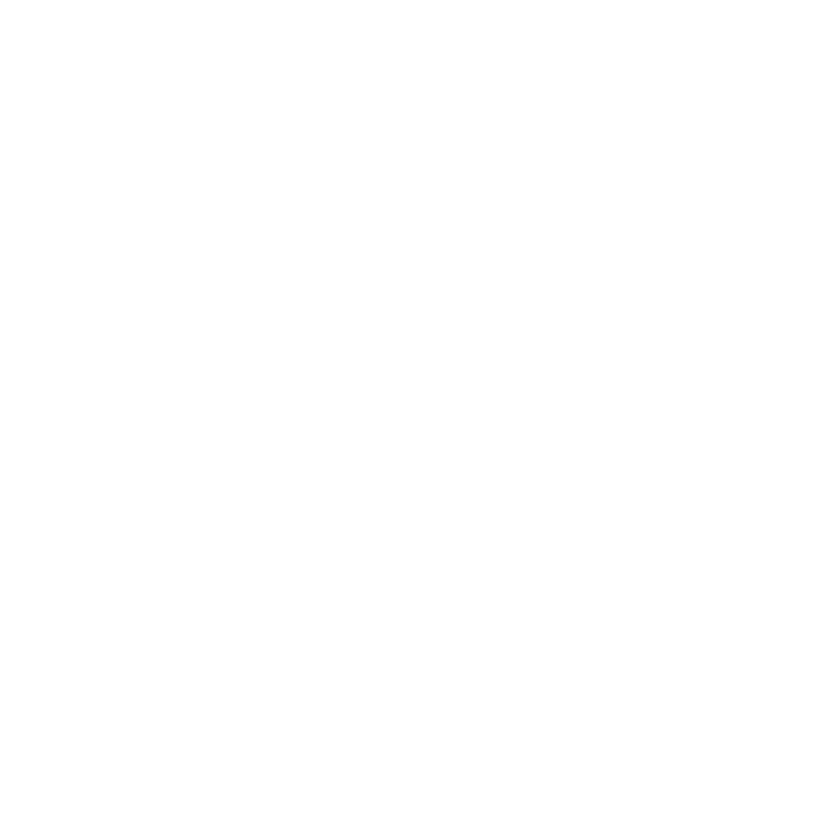

In [25]:
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = fullVisitorId^(1/3), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given fullVisitorId") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

# Idea: Large fullVisitorId makes you act differently? Also, very small fullVisitorId makes you act differently? Maybe not, because a transformation of ^(1/3) makes them act the same...

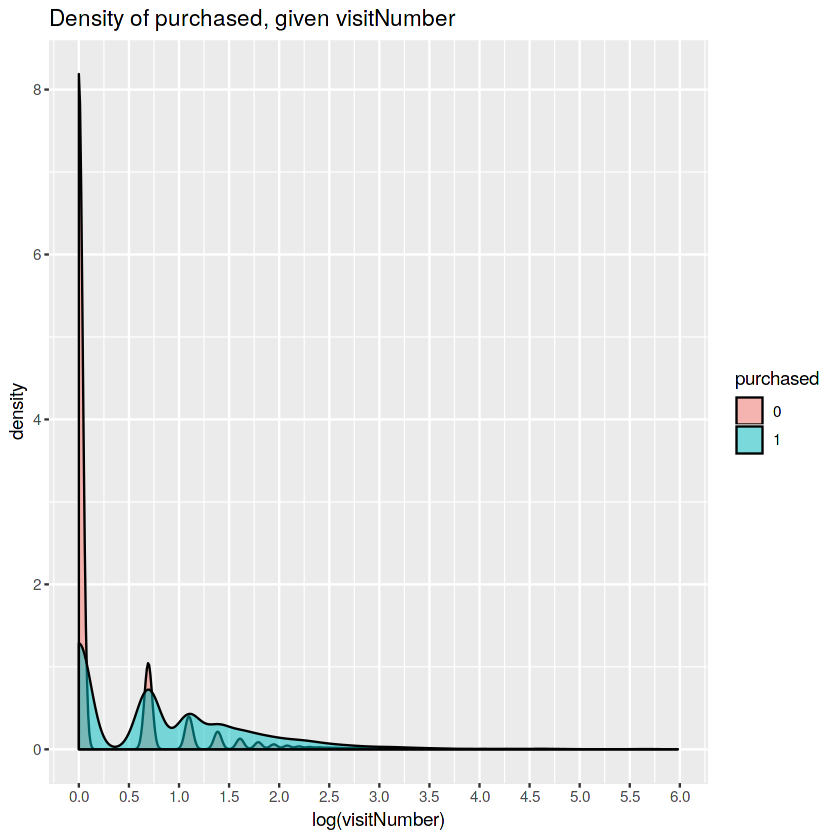

In [26]:
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log(visitNumber), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given visitNumber") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

# Larger visitNumber -> more likely to make a purchase

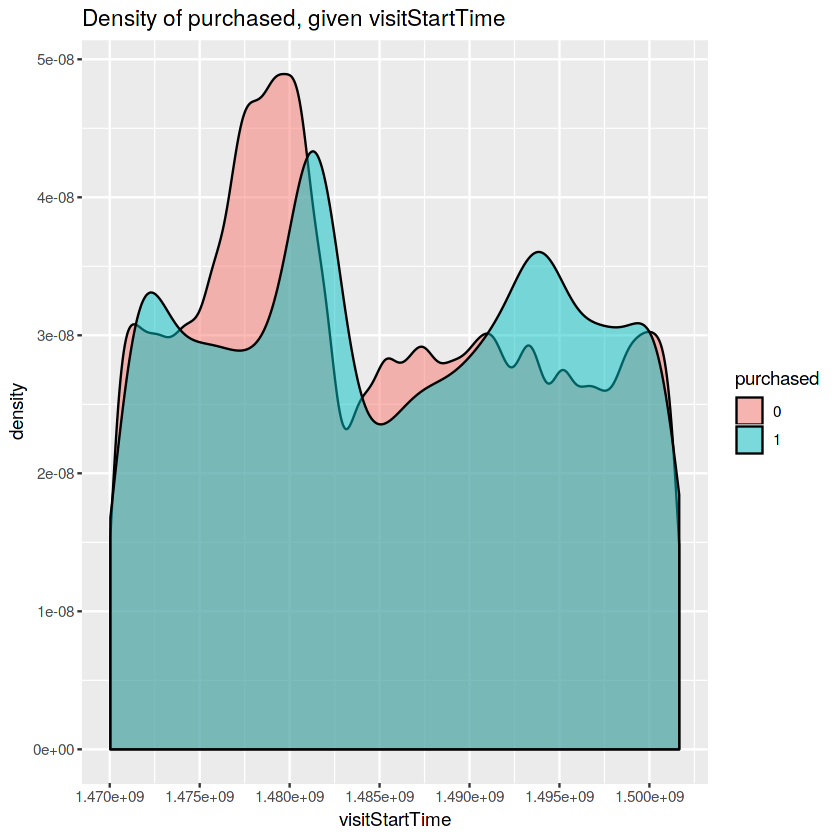

In [27]:
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = visitStartTime, fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given visitStartTime") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

# More purchases happen more recently

In [28]:
tr_te <- tr_te[order(fullVisitorId, visitStartTime)] #order it

In [29]:
#shiftVisitStartTime
tmp <- tr_te[, .('shift_visitStartTime'=visitStartTime - shift(visitStartTime), 'max_visitStartTime'=max(visitStartTime), 'min_visitStartTime'=min(visitStartTime)), by=fullVisitorId]
tr_te$shift_visitStartTime <- tmp$shift_visitStartTime
tr_te$max_visitStartTime <- tmp$max_visitStartTime
tr_te$min_visitStartTime <- tmp$min_visitStartTime

tr_te$cur_minus_max_visitStartTime <- tr_te$visitStartTime - tr_te$max_visitStartTime #Time left until last visit
tr_te$cur_minus_min_visitStartTime <- tr_te$visitStartTime - tr_te$min_visitStartTime #Time elapsed since first visit
tr_te$max_minus_min_visitStartTime <- tr_te$max_visitStartTime - tr_te$min_visitStartTime #Total time elapsed
tr_te$ratio_visitStartTime <- tr_te$cur_minus_min_visitStartTime / (tr_te$max_minus_min_visitStartTime + 0.00001)

Warning message:
“Removed 714167 rows containing non-finite values (stat_density).”

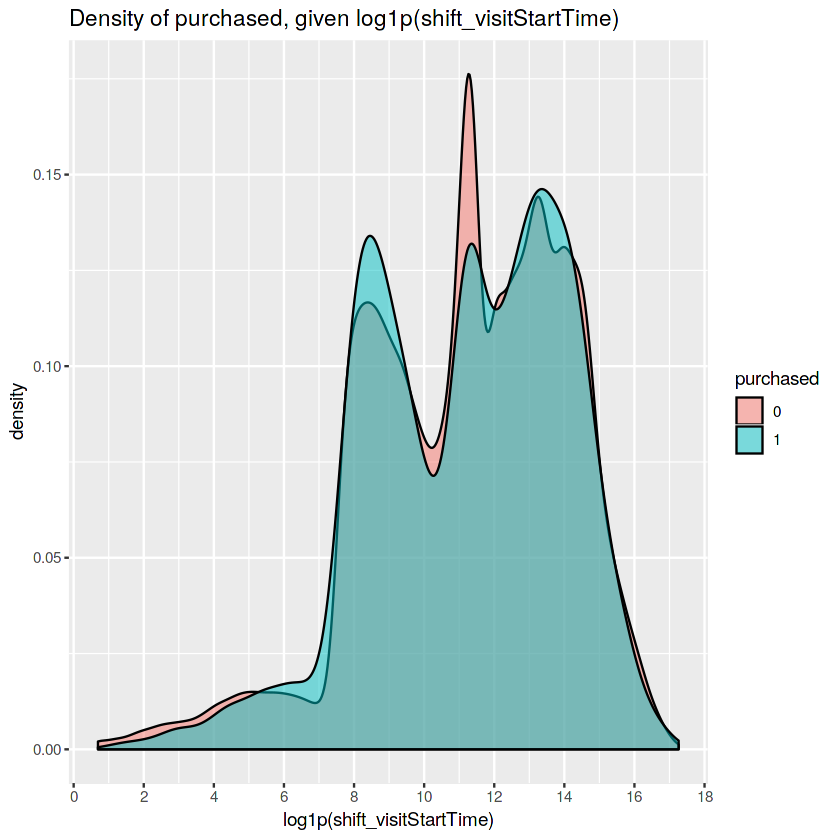

In [30]:
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log1p(shift_visitStartTime), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given log1p(shift_visitStartTime)") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

In [31]:
tr_te$shift_visitStartTime <- log1p(tr_te$shift_visitStartTime)

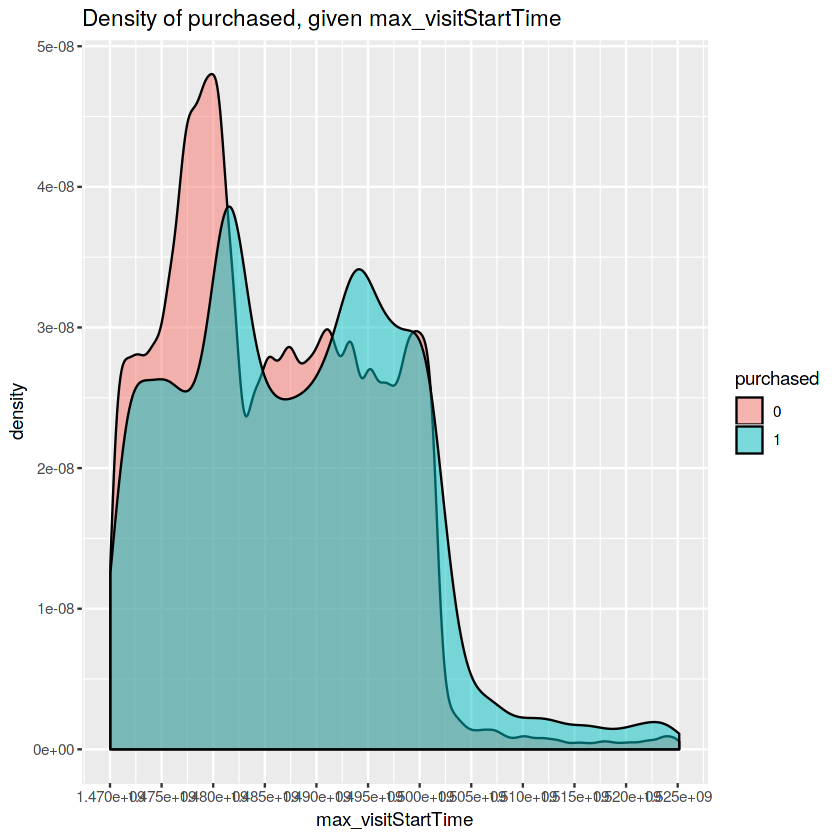

In [32]:
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = max_visitStartTime, fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given max_visitStartTime") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

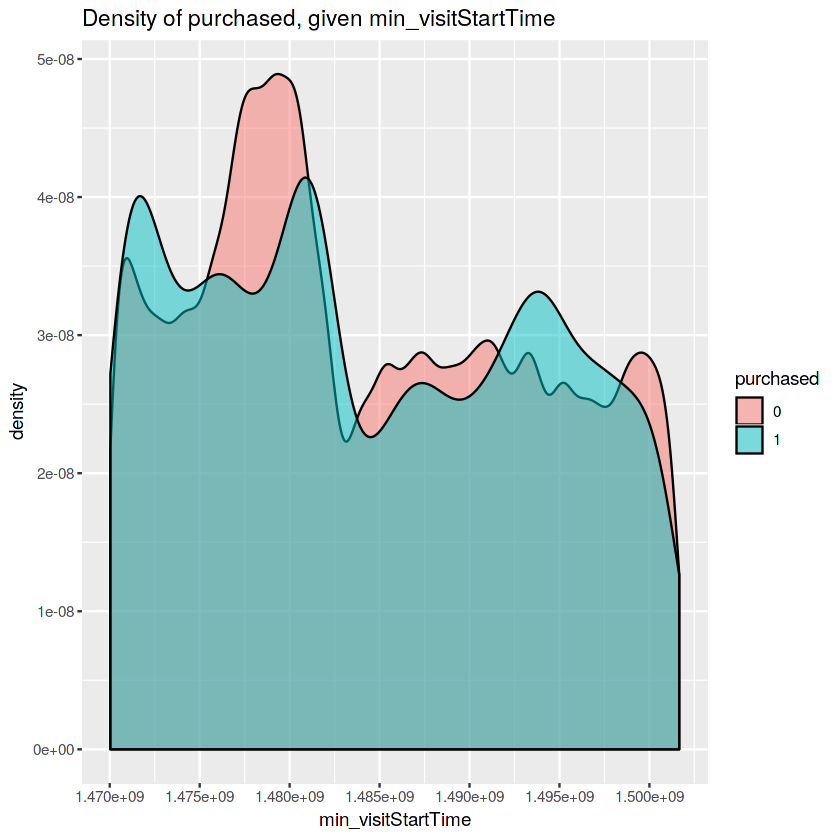

In [33]:
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = min_visitStartTime, fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given min_visitStartTime") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

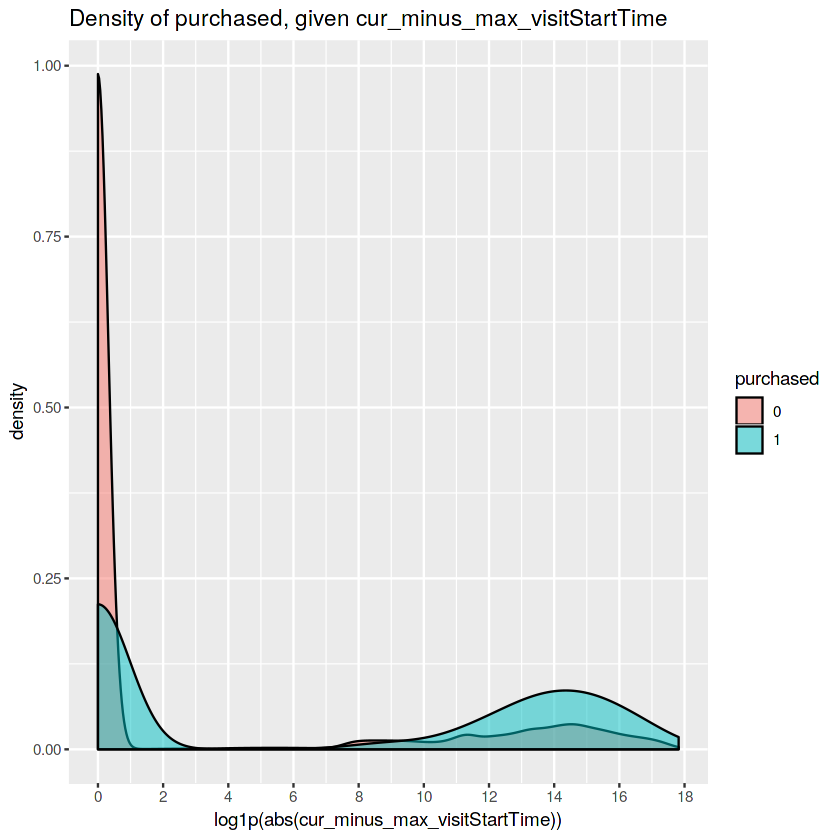

In [34]:
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log1p(abs(cur_minus_max_visitStartTime)), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given cur_minus_max_visitStartTime") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

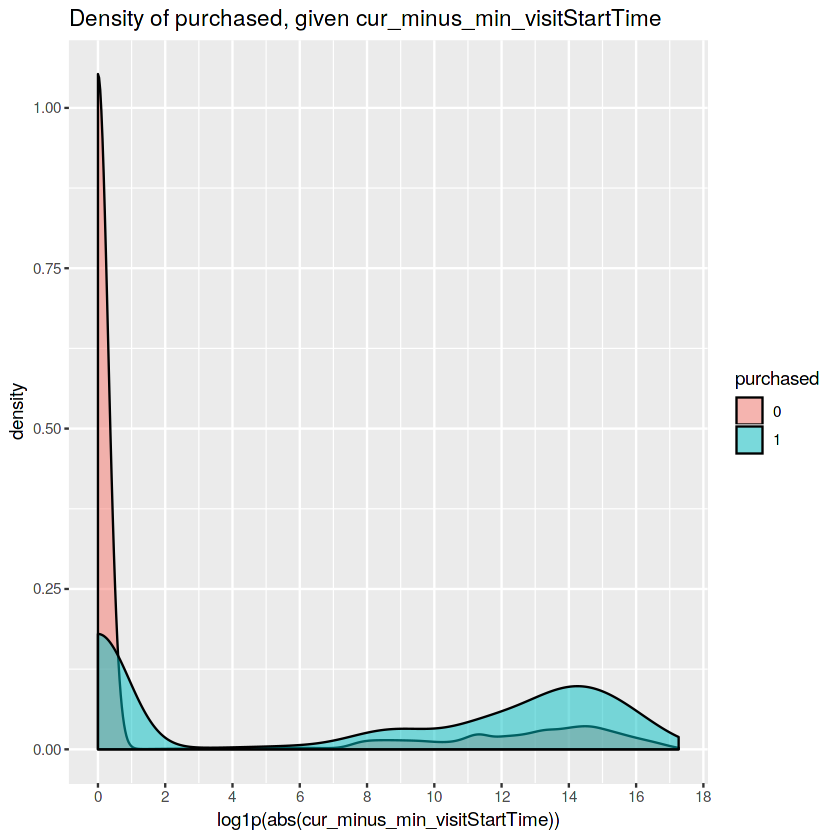

In [35]:
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log1p(abs(cur_minus_min_visitStartTime)), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given cur_minus_min_visitStartTime") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

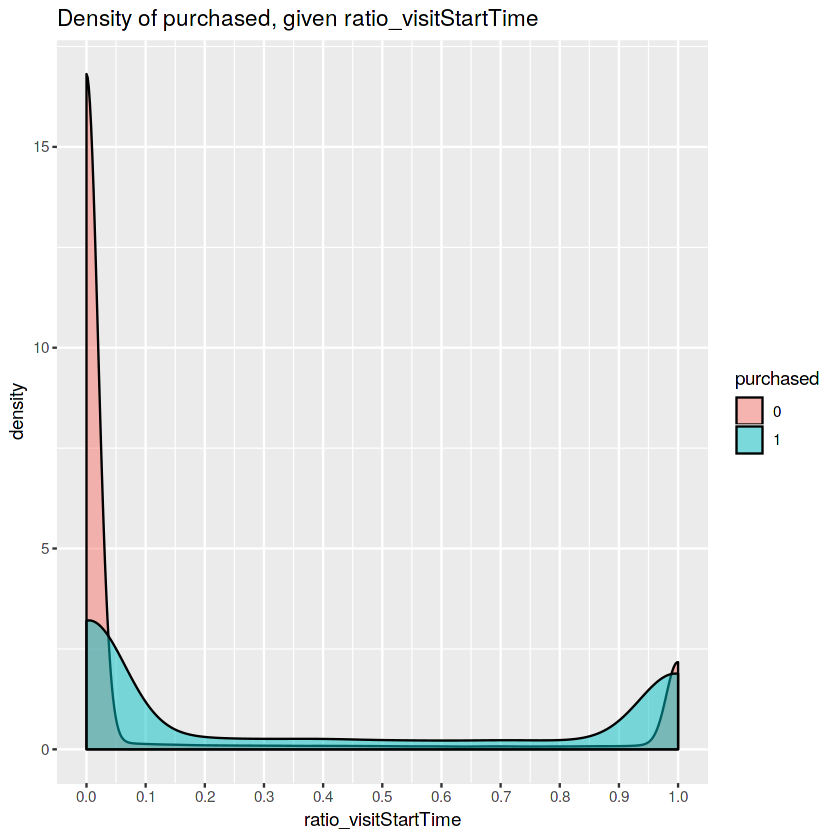

In [36]:
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = ratio_visitStartTime, fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given ratio_visitStartTime") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

In [37]:
tr_te$cur_minus_max_visitStartTime <- log1p(abs(tr_te$cur_minus_max_visitStartTime))
tr_te$cur_minus_min_visitStartTime <- log1p(abs(tr_te$cur_minus_min_visitStartTime))

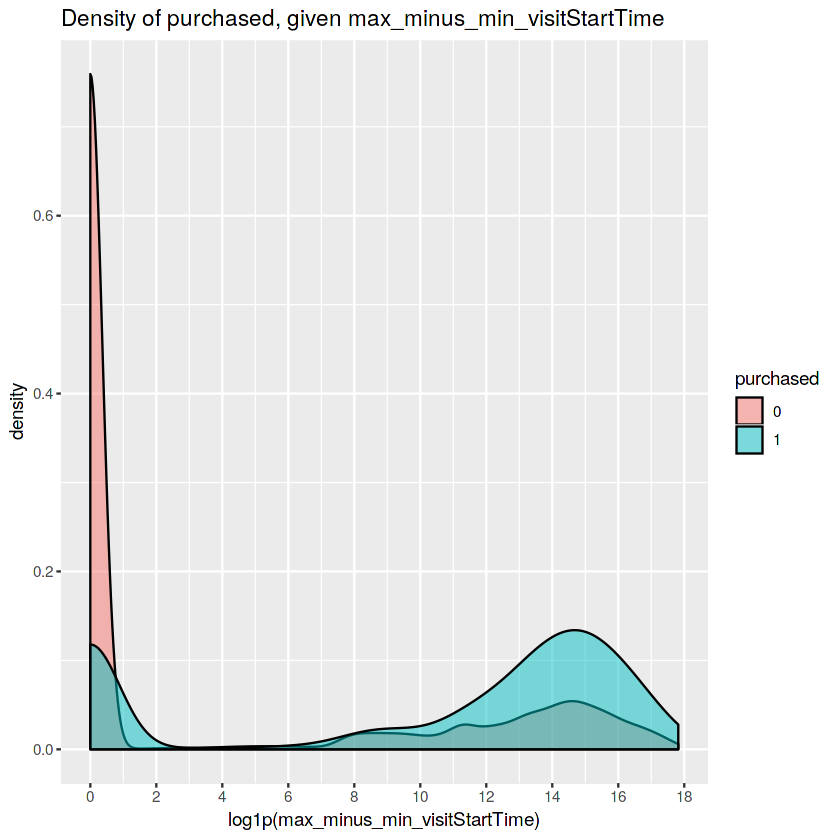

In [38]:
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log1p(max_minus_min_visitStartTime), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given max_minus_min_visitStartTime") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

In [39]:
tr_te$max_minus_min_visitStartTime <- log1p(tr_te$max_minus_min_visitStartTime)

In [40]:
#device.browser
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=device.browser][order(-mean)]

device.browser                              count  mean        
1  Chrome                                      620364 0.0166885893
2  Edge                                         10205 0.0056834885
3  Internet Explorer                            19375 0.0056258065
4  Firefox                                      37069 0.0051525533
5  Safari                                      182245 0.0042799528
6  Amazon Silk                                    561 0.0017825312
7  Safari (in-app)                               6850 0.0017518248
8  Opera                                         5643 0.0008860535
9  Android Webview                               7865 0.0007628735
10 Opera Mini                                    6139 0.0000000000
11 YaBrowser                                     2096 0.0000000000
12 Coc Coc                                        727 0.0000000000
13 Iron                                            33 0.0000000000
14 Puffin                                          93 0.0000000000
15 UC Browser                                    2427 0.0000000000
16 Nintendo Browser                               140 0.0000000000
17 Mozilla Compatible Agent                       374 0.0000000000
18 Nokia Browser                                   67 0.0000000000
19 Android Browser                                553 0.0000000000
20 MRCHROME                                       263 0.0000000000
21 BlackBerry                                     184 0.0000000000
22 Maxthon                                        246 0.0000000000
23 LYF_LS_4002_11                                   3 0.0000000000
24 Nichrome                                         7 0.0000000000
25 User Agent                                       1 0.0000000000
⋮  ⋮                                           ⋮      ⋮           
30 Apple-iPhone7C2                              9     0           
31 MQQBrowser                                   2     0           
32 osee2unifiedRelease                          5     0           
33 LYF_LS_4002_12                              21     0           
34 YE                                           2     0           
35 Mozilla                                     11     0           
36 Android Runtime                              2     0           
37 HTC802t_TD                                   1     0           
38 DASH_JR_3G                                   4     0           
39 M5                                           1     0           
40 Lunascape                                    5     0           
41 Reddit                                       1     0           
42 NokiaE52-1                                   2     0           
43 CSM Click                                    1     0           
44 Konqueror                                    1     0           
45 0                                            7     0           
46 [Use default User-agent string] LIVRENPOCHE  1     0           
47 no-ua                                        3     0           
48 ADM                                          1     0           
49 Changa 99695759                              1     0           
50 DoCoMo                                       1     0           
51 Hisense M20-M_LTE                            1     0           
52 IE with Chrome Frame                         1     0           
53 TCL P500M                                    1     0           
54 subjectAgent: NoticiasBoom                   1     0

# Okay...idea: create rare browsers. I mean look at all of those junk browser names. It seems that certain browsers are more likely to follow-through with a purchase, too.

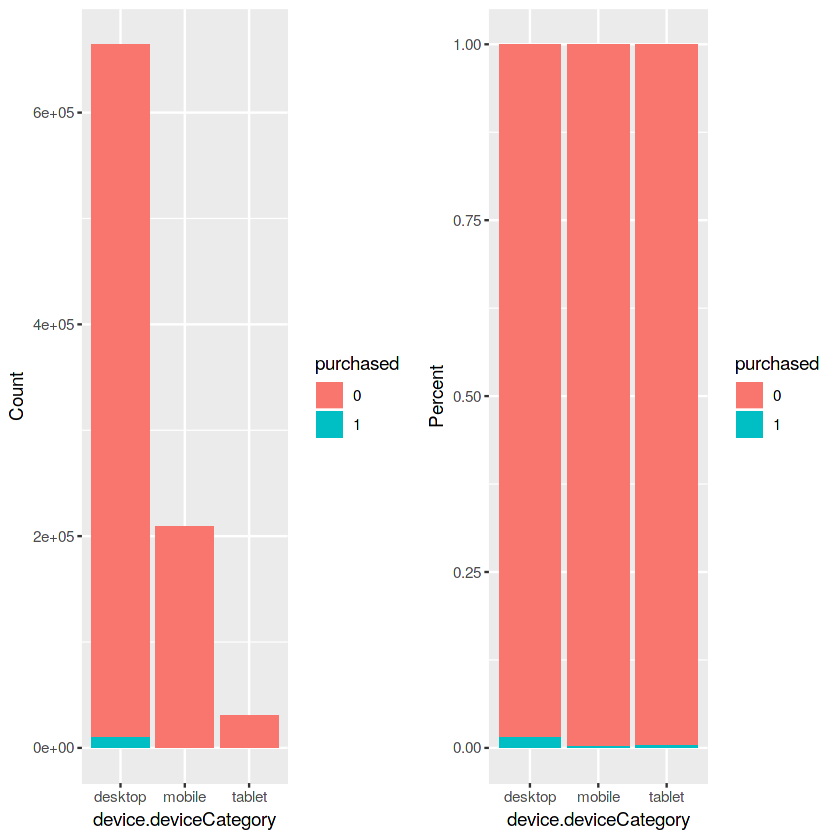

In [41]:
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=device.deviceCategory, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'device.deviceCategory', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=device.deviceCategory, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'device.deviceCategory', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

# Mobiles and tablets are kind of the same, but desktops have a higher likelihood to make a purchase

# Idea: Boolean: Owns Mobile? Owns Tablet? Owns Desktop? Owns Mobile + Tablet? Owns Mobile + Desktop? Owns Tablet + Desktop? Owns all 3? This can show you how many electronic devices you own, which may indicate how likely you are to purchase a Google (tech) related item

### Unfortunately, I can't do this, since each fullVisitorId only has one device.deviceCategory. However, if you noticed, some fullVisitorId's start with visitNumber > 1, which may imply they visited the website before, just on a different machine.

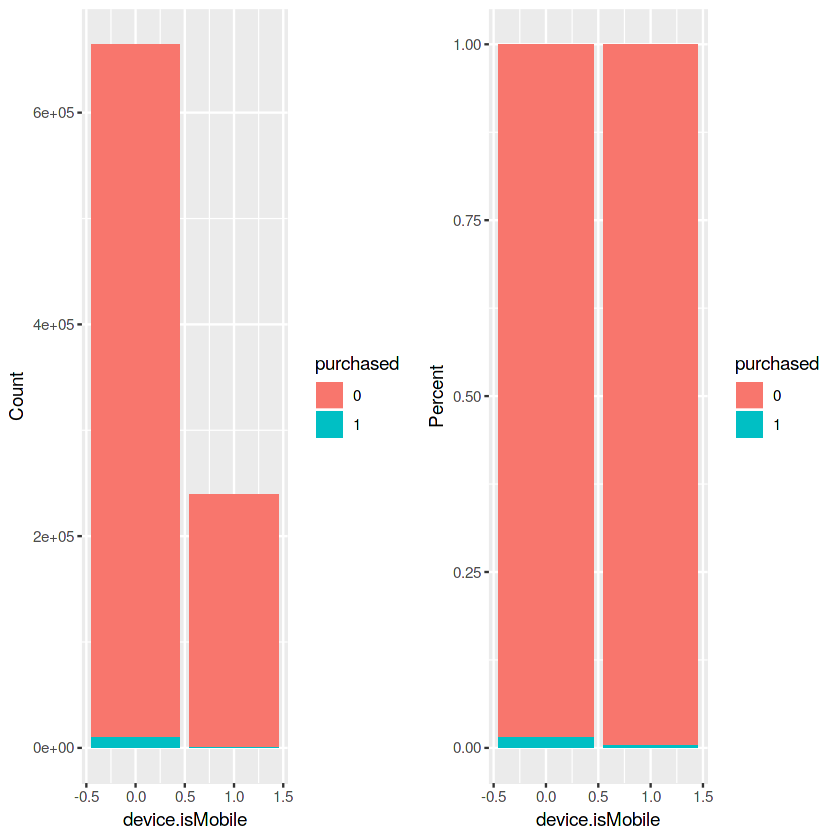

In [42]:
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=device.isMobile, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'device.isMobile', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=device.isMobile, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'device.isMobile', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

# More likely to make a purchase if not on mobile

In [43]:
#device.operatingSystem
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=device.operatingSystem][order(-mean)]

device.operatingSystem count  mean        
1  Chrome OS               26337 0.0377415803
2  Macintosh              253938 0.0253053895
3  Linux                   35034 0.0223211737
4  Windows                350072 0.0065957860
5  iOS                    107665 0.0049784052
6  Android                123892 0.0037694121
7  Windows Phone            1216 0.0008223684
8  (not set)                4695 0.0000000000
9  Samsung                   280 0.0000000000
10 Xbox                       66 0.0000000000
11 Nintendo WiiU              35 0.0000000000
12 BlackBerry                218 0.0000000000
13 Firefox OS                 89 0.0000000000
14 Nintendo Wii              100 0.0000000000
15 FreeBSD                     9 0.0000000000
16 Nintendo 3DS                1 0.0000000000
17 Nokia                       2 0.0000000000
18 NTT DoCoMo                  1 0.0000000000
19 SunOS                       1 0.0000000000
20 OpenBSD                     2 0.0000000000

# Idea: Group into rare OS's, like videogame consoles, etc.

# Idea: Age of browser? The older the browser, maybe the less likely for a purchase? Number of users for each browser? Cost for each videogame console?

In [44]:
#geoNetwork.city 
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=geoNetwork.city][order(-mean)]

geoNetwork.city             count mean      
1   Atwater                         8 0.25000000
2   Sandy Springs                   6 0.16666667
3   Fort Worth                     12 0.16666667
4   North Attleborough              6 0.16666667
5   Maracaibo                     232 0.15517241
6   Fort Collins                    7 0.14285714
7   Syracuse                        7 0.14285714
8   Milwaukee                       7 0.14285714
9   Walnut Creek                    8 0.12500000
10  Omaha                          34 0.11764706
11  Pleasanton                     20 0.10000000
12  Saratoga                       10 0.10000000
13  Ann Arbor                    2241 0.08612227
14  Cambridge                    1585 0.07507886
15  Barrie                         14 0.07142857
16  Riverside                      15 0.06666667
17  Lenoir                         15 0.06666667
18  San Bruno                    1686 0.06109134
19  Bothell                        33 0.06060606
20  Nashville                     185 0.05945946
21  Quito                          17 0.05882353
22  Goose Creek                    52 0.05769231
23  Salt Lake City                 35 0.05714286
24  New York                    26371 0.05710819
25  Chicago                      7444 0.05668995
⋮   ⋮                           ⋮     ⋮         
625 Barranquilla                 8    0         
626 Mueang Phitsanulok District  6    0         
627 Ulaanbaatar                  6    0         
628 Guwahati                     6    0         
629 Hukou Township              16    0         
630 Lausanne                    17    0         
631 Nea Erythraia                7    0         
632 Coimbatore                   8    0         
633 Campbell                     5    0         
634 St. John's                  10    0         
635 Depok                        7    0         
636 Pinamar                      7    0         
637 's Hertogenbosch             7    0         
638 Eindhoven                    7    0         
639 Cabimas                      7    0         
640 Annecy-le-Vieux              6    0         
641 Winnipeg                     6    0         
642 New Orleans                  7    0         
643 Talence                      6    0         
644 Arnhem                       6    0         
645 Sheffield                    6    0         
646 Byron                        6    0         
647 Orem                         6    0         
648 Daly City                    4    0         
649 Valparaiso                   7    0

In [45]:
tr_te$no_geoNetwork.city <- ifelse(tr_te$geoNetwork.city=='(not set)' | tr_te$geoNetwork.city=='not available in demo dataset',1,0)

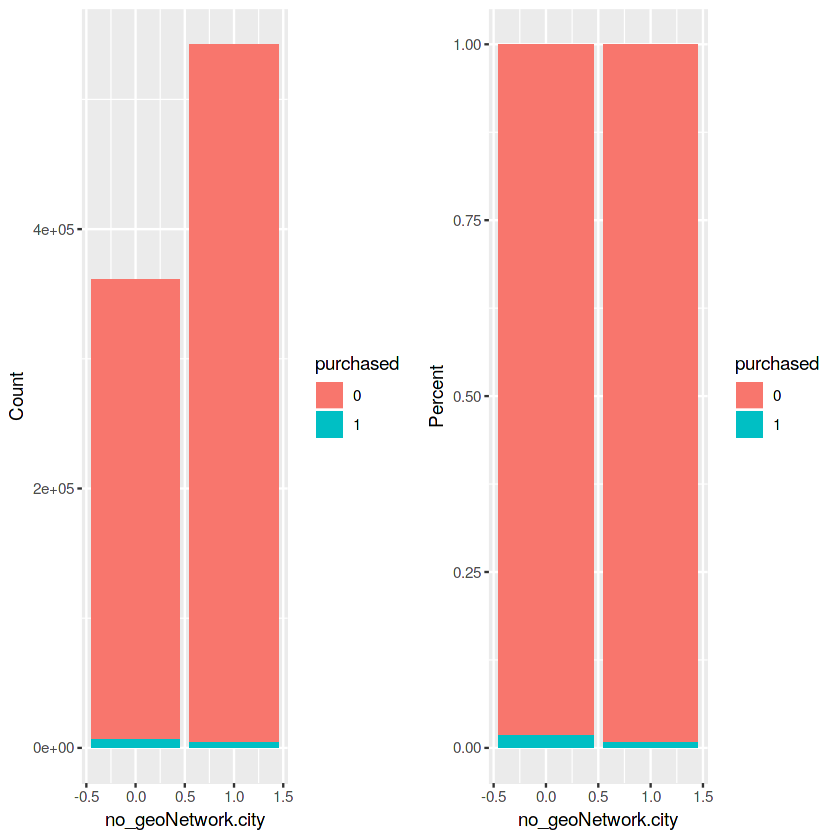

In [46]:
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=no_geoNetwork.city, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'no_geoNetwork.city', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=no_geoNetwork.city, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'no_geoNetwork.city', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

# Lots of ideas here. Population per city, sq feet of city, sq feet of water area/land area of city, median income, avg household size. So much I can do here.

# I can also do racist stuff. % white, median age, avg family size

# Boolean: Does there exist a google HQ in that city?
# % of computer scientists in the city?
# I can get latitude and longitude for each city too, so there was no reason for them to remove that information

# You are more likely to buy if your city has been mapped

In [47]:
#geoNetwork.continent
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=geoNetwork.continent][order(-mean)]

geoNetwork.continent count  mean        
1 Americas             450377 0.0250523450
2 (not set)              1468 0.0040871935
3 Oceania               15054 0.0009299854
4 Asia                 223698 0.0005587891
5 Africa                14745 0.0005425568
6 Europe               198311 0.0003983642

# America buys more than the others

In [48]:
#geoNetwork.country
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=geoNetwork.country][order(-mean)]

geoNetwork.country       count  mean       
1   Anguilla                      1 1.000000000
2   St. Lucia                    24 0.083333333
3   Guadeloupe                   29 0.034482759
4   Curaçao                      30 0.033333333
5   United States            364744 0.030029281
6   Venezuela                  2132 0.029549719
7   Puerto Rico                 732 0.015027322
8   Canada                    25869 0.007344698
9   Nicaragua                   139 0.007194245
10  Panama                      476 0.004201681
11  (not set)                  1468 0.004087193
12  Kenya                       771 0.003891051
13  Kuwait                      521 0.003838772
14  Armenia                     280 0.003571429
15  Guatemala                   581 0.003442341
16  Ecuador                    1251 0.003197442
17  Chile                      1950 0.002564103
18  El Salvador                 393 0.002544529
19  Lebanon                     398 0.002512563
20  Georgia                     888 0.002252252
21  Cyprus                      463 0.002159827
22  Finland                     959 0.002085506
23  Kazakhstan                  968 0.002066116
24  Switzerland                4427 0.002032979
25  Hong Kong                  4718 0.001907588
⋮   ⋮                        ⋮      ⋮          
198 Gabon                    25     0          
199 Seychelles                3     0          
200 Central African Republic  4     0          
201 British Virgin Islands    5     0          
202 St. Vincent & Grenadines 10     0          
203 Cook Islands              3     0          
204 Åland Islands             1     0          
205 San Marino                4     0          
206 Isle of Man               3     0          
207 Liechtenstein             7     0          
208 Greenland                 5     0          
209 São Tomé & Príncipe       1     0          
210 Mayotte                  14     0          
211 Norfolk Island            1     0          
212 Samoa                     1     0          
213 Gibraltar                10     0          
214 Congo - Brazzaville       3     0          
215 Guinea-Bissau             4     0          
216 Lesotho                   6     0          
217 American Samoa            1     0          
218 Marshall Islands          2     0          
219 Dominica                  3     0          
220 St. Pierre & Miquelon     1     0          
221 Eritrea                   1     0          
222 St. Martin                1     0

# Venezuela, USA, Puerto Rico, Canada are big buyers
# Idea: Is country at war? Is country coastal? GDP of country? Land area? Life expectancy? number of nobel prizes, or like rating of science? How about ranking on national math test or logic test etc.
# Popularity of language spoken there? Is language spoken == English? Or, does Google have a translation of the Google Merchandise website into their native language?

In [49]:
#geoNetwork.metro
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=geoNetwork.metro][order(-mean)]

geoNetwork.metro                   count mean      
1  Providence-New Bedford,MA              6 0.16666667
2  Syracuse NY                            7 0.14285714
3  Detroit MI                          2403 0.08073242
4  Omaha NE                             129 0.06201550
5  Charleston SC                         52 0.05769231
6  Nashville TN                         191 0.05759162
7  New York NY                        26917 0.05639559
8  Chicago IL                          7585 0.05576796
9  Austin TX                           3790 0.05540897
10 Boston MA-Manchester NH             2628 0.05175038
11 Denver CO                            877 0.04561003
12 Fresno-Visalia CA                     67 0.04477612
13 Seattle-Tacoma WA                   7642 0.04396755
14 Kansas City MO                       117 0.04273504
15 Atlanta GA                          2463 0.04019488
16 Jacksonville FL                       27 0.03703704
17 Pittsburgh PA                       1076 0.03624535
18 Los Angeles CA                      9995 0.03431716
19 Salt Lake City UT                     62 0.03225806
20 Baltimore MD                          32 0.03125000
21 Minneapolis-St. Paul MN              197 0.03045685
22 San Francisco-Oakland-San Jose CA  95913 0.03043383
23 El Paso TX                            33 0.03030303
24 Washington DC (Hagerstown MD)       3380 0.02899408
25 San Diego CA                        1364 0.02859238
⋮  ⋮                                  ⋮     ⋮         
70 Cleveland-Akron (Canton) OH        66    0         
71 HTV West                           13    0         
72 Albany-Schenectady-Troy NY         19    0         
73 Charlottesville VA                 13    0         
74 JP_KINKI                           26    0         
75 Chattanooga TN                      6    0         
76 Norfolk-Portsmouth-Newport News VA 26    0         
77 Wheeling WV-Steubenville OH        14    0         
78 Tucson (Sierra Vista) AZ            7    0         
79 St. Louis MO                       27    0         
80 Springfield MO                      8    0         
81 Lexington KY                        8    0         
82 Abilene-Sweetwater TX              10    0         
83 Colorado Springs-Pueblo CO         16    0         
84 Springfield-Holyoke MA              6    0         
85 Honolulu HI                        21    0         
86 Tallahassee FL-Thomasville GA       6    0         
87 Memphis TN                         10    0         
88 HTV Wales                          20    0         
89 Boise ID                            3    0         
90 Tri-Cities TN-VA                    8    0         
91 Butte-Bozeman MT                    3    0         
92 Panama City FL                      8    0         
93 New Orleans LA                      7    0         
94 Rochester-Mason City-Austin,IA      6    0

# Are these mostly American cities? Let's check by comparing to geoNetwork.city

In [50]:
tr_te[totals.transactionRevenue!=-1,mean(purchased),by=c('geoNetwork.city','geoNetwork.metro')][order(-V1)]

geoNetwork.city    geoNetwork.metro                  V1        
1   Atwater            Fresno-Visalia CA                 0.25000000
2   Sandy Springs      Atlanta GA                        0.16666667
3   Fort Worth         Dallas-Ft. Worth TX               0.16666667
4   North Attleborough Providence-New Bedford,MA         0.16666667
5   Maracaibo          (not set)                         0.15517241
6   Fort Collins       Denver CO                         0.14285714
7   Syracuse           Syracuse NY                       0.14285714
8   Milwaukee          Milwaukee WI                      0.14285714
9   Walnut Creek       San Francisco-Oakland-San Jose CA 0.12500000
10  Omaha              Omaha NE                          0.11764706
11  Dundalk            Baltimore MD                      0.11111111
12  Pleasanton         San Francisco-Oakland-San Jose CA 0.10000000
13  Saratoga           San Francisco-Oakland-San Jose CA 0.10000000
14  Ann Arbor          Detroit MI                        0.08612227
15  Cambridge          Boston MA-Manchester NH           0.07507886
16  Barrie             (not set)                         0.07142857
17  Riverside          Los Angeles CA                    0.06666667
18  Lenoir             Charlotte NC                      0.06666667
19  San Bruno          San Francisco-Oakland-San Jose CA 0.06109134
20  Bothell            Seattle-Tacoma WA                 0.06060606
21  Nashville          Nashville TN                      0.05945946
22  Quito              (not set)                         0.05882353
23  Goose Creek        Charleston SC                     0.05769231
24  Salt Lake City     Salt Lake City UT                 0.05714286
25  New York           New York NY                       0.05710819
⋮   ⋮                  ⋮                                 ⋮         
637 Guwahati           (not set)                         0         
638 Hukou Township     (not set)                         0         
639 Lausanne           (not set)                         0         
640 Nea Erythraia      (not set)                         0         
641 Coimbatore         (not set)                         0         
642 Campbell           San Francisco-Oakland-San Jose CA 0         
643 St. John's         (not set)                         0         
644 Depok              (not set)                         0         
645 Pinamar            (not set)                         0         
646 's Hertogenbosch   (not set)                         0         
647 Eindhoven          (not set)                         0         
648 Cabimas            (not set)                         0         
649 Annecy-le-Vieux    (not set)                         0         
650 Winnipeg           (not set)                         0         
651 New Orleans        New Orleans LA                    0         
652 Talence            (not set)                         0         
653 Arnhem             (not set)                         0         
654 Sheffield          Yorkshire                         0         
655 Byron              Rochester-Mason City-Austin,IA    0         
656 Dublin             San Francisco-Oakland-San Jose CA 0         
657 Orem               Salt Lake City UT                 0         
658 Oxford             Cincinnati OH                     0         
659 Daly City          San Francisco-Oakland-San Jose CA 0         
660 Valparaiso         (not set)                         0         
661 Birmingham         Detroit MI                        0

# Seems that geoNetwork.metro groups certain cities into larger areas where there exists a "metro". What is a "metro" though. Does it have to do with Google Fiber? Many metros have google fiber (not all). I am not sure if geoNetwork.metro will be a good column. Maybe I should just make a column that says if it's mapped to a metro or not.

In [51]:
tr_te$no_geoNetwork.metro <- ifelse(tr_te$geoNetwork.metro=='(not set)' | tr_te$geoNetwork.metro=='not available in demo dataset', 1, 0)

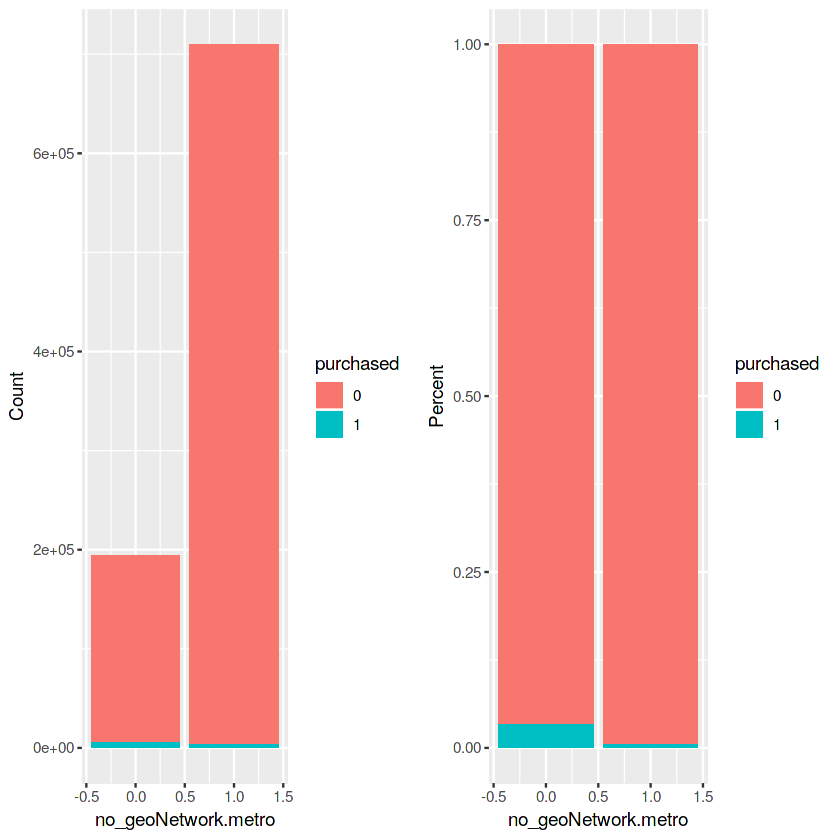

In [52]:
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=no_geoNetwork.metro, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'no_geoNetwork.metro', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=no_geoNetwork.metro, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'no_geoNetwork.metro', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

# Wow, so if you have been mapped to a geoNetwork.metro then you are a lot more likely to make a purchase. Maybe I will use this boolean instead of geoNetwork.metro; or if that sees bad performance include both?

In [53]:
#geoNetwork.networkDomain
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=geoNetwork.networkDomain][order(-mean)]

geoNetwork.networkDomain count mean
1     emeter.com               1     1   
2     zarahotels.com           1     1   
3     gastront.com             1     1   
4     facterdirect.com         1     1   
5     broadweavenetworks.net   1     1   
6     davie.ca                 1     1   
7     ln.net                   1     1   
8     atgi.net                 1     1   
9     javelinsemi.com          1     1   
10    allis-roller.com         1     1   
11    boardreader.com          1     1   
12    dynamex.com              1     1   
13    crymc.com                1     1   
14    grist.org                1     1   
15    oreilly.com              1     1   
16    health-partners.org      1     1   
17    ofmlive.net              1     1   
18    durst.com                1     1   
19    allcareipa.com           1     1   
20    greaterfindlayinc.com    1     1   
21    mysmtps.com              1     1   
22    groupe-ab.fr             1     1   
23    netlinks.cw              1     1   
24    thebiltmore.net          1     1   
25    njch.org                 1     1   
⋮     ⋮                        ⋮     ⋮   
28040 surffi.net               1     0   
28041 czest.pl                 1     0   
28042 lear.com                 1     0   
28043 galeriethoman.com        1     0   
28044 fla.org.uk               1     0   
28045 ilata.net                1     0   
28046 gasoilcenter.ru          1     0   
28047 amanatoyota.in           1     0   
28048 retailafrica.co.za       1     0   
28049 nckcn.com                2     0   
28050 confirmit.com            1     0   
28051 sysuk.co.uk              1     0   
28052 eolas-services.com       1     0   
28053 yarsuvat.com             1     0   
28054 onninen.pl               1     0   
28055 oase-livingwater.com.sg  1     0   
28056 taiyu.co.jp              1     0   
28057 edu.pe                   1     0   
28058 laredonet.net            1     0   
28059 fairinvestment.co.uk     1     0   
28060 tsisi.com.cn             1     0   
28061 omd.cl                   1     0   
28062 bars-open.ru             1     0   
28063 city-net.ro              1     0   
28064 probank.gr               1     0

# Ideas: Alexa rating of website, number of letters of website (shorter letters -> More professional website?) the domain ending (.edu vs .com, etc.) If it's .edu, then I can look up the cost per year of the university? Is it a technical university or not?

# Is the website technical in nature? Is it a website for old people or young people? Is it a forum? Etc.

# Some sites redirect when you access them (e.g. gouv.com)

# Can website be reached (e.g. cant access refertelecom.pt)

# Does website have HTTPS or is it "Not secured" ?

# I will have to write a script for this kind of stuff. It's too complicated to immediately do in this EDA.

In [54]:
#geoNetwork.region
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=geoNetwork.region][order(-mean)]

geoNetwork.region            count  mean      
1   Zulia                           239 0.15062762
2   Nebraska                         34 0.11764706
3   Michigan                       2578 0.07525213
4   Pichincha                        17 0.05882353
5   New York                      26433 0.05701207
6   Illinois                       7585 0.05576796
7   Tennessee                       209 0.05263158
8   Massachusetts                  2640 0.05189394
9   Colorado                        893 0.04479283
10  South Carolina                   68 0.04411765
11  Washington                     7642 0.04396755
12  Iowa                             95 0.04210526
13  Georgia                        2476 0.03998384
14  Missouri                        129 0.03875969
15  District of Columbia           2532 0.03870458
16  Texas                          8749 0.03463253
17  Utah                             62 0.03225806
18  California                   107495 0.03074562
19  Minnesota                       212 0.02830189
20  Pennsylvania                   1846 0.02708559
21  Arizona                         544 0.02573529
22  North Carolina                  616 0.02272727
23  Maryland                         45 0.02222222
24  New Jersey                      563 0.02131439
25  Virginia                       3101 0.01838117
⋮   ⋮                            ⋮      ⋮         
352 Magdalena                    11     0         
353 Quang Ngai                   12     0         
354 Hradec Kralove Region         6     0         
355 Groningen                     7     0         
356 Montana                       3     0         
357 Central Java                  6     0         
358 Hunedoara County             14     0         
359 Kumamoto Prefecture           5     0         
360 Guatemala Department         16     0         
361 Pingtung County              20     0         
362 La Libertad                  12     0         
363 Moravian-Silesian Region      7     0         
364 Lviv Oblast                   6     0         
365 Eskisehir Province            6     0         
366 Binh Phuoc                    6     0         
367 Atlantico                     8     0         
368 Assam                         6     0         
369 Vaud                         17     0         
370 Newfoundland and Labrador    10     0         
371 Special Region of Yogyakarta  7     0         
372 Rhone-Alpes                   6     0         
373 Manitoba                      6     0         
374 Louisiana                     7     0         
375 Gelderland                    6     0         
376 Valparaiso Region             7     0

# These seem to be more aggregations of cities. They are based on state/province/region level. Again, there is a lot I can do with this. Is it coastal? Average wage there? Life expectancy? So much I can do with this. Land area? Is it the capital of a country? Population? Is the country at war? Does Google Fiber exist? Number of google stores? Number of computer scientists in region? Etc

In [55]:
tr_te$no_geoNetwork.region <- ifelse(tr_te$geoNetwork.region=='(not set)' | tr_te$geoNetwork.region=='not available in demo dataset', 1, 0)

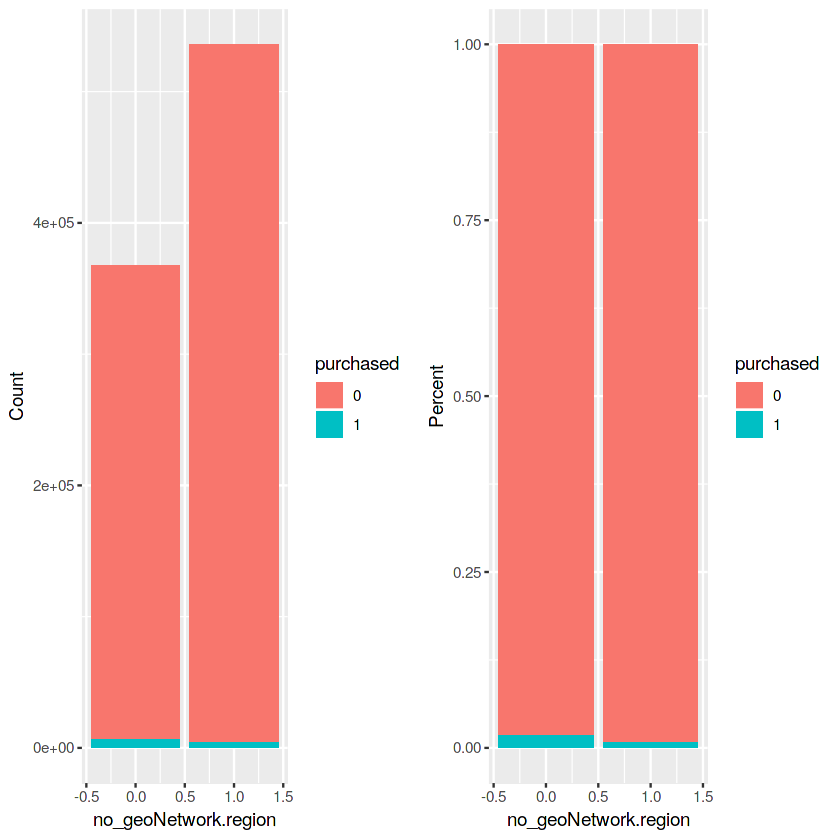

In [56]:
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=no_geoNetwork.region, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'no_geoNetwork.region', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=no_geoNetwork.region, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'no_geoNetwork.region', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

# More likely to purchase if you have been mapped into a geoNetwork.region

In [57]:
#geoNetwork.subContinent
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=geoNetwork.subContinent][order(-mean)]

geoNetwork.subContinent count  mean        
1  Northern America        390657 0.0285237433
2  Caribbean                 2406 0.0066500416
3  (not set)                 1468 0.0040871935
4  South America            41731 0.0023483741
5  Central America          15583 0.0016684849
6  Central Asia              1215 0.0016460905
7  Eastern Africa            1927 0.0015568241
8  Eastern Asia             46919 0.0012574863
9  Australasia              14893 0.0009400389
10 Southern Africa           2169 0.0009220839
11 Western Africa            2573 0.0007773028
12 Western Asia             38443 0.0005462633
13 Western Europe           59114 0.0005074940
14 Northern Europe          58168 0.0004641727
15 Southeast Asia           77800 0.0004113111
16 Eastern Europe           45249 0.0003093991
17 Southern Europe          35780 0.0002235886
18 Southern Asia            59321 0.0001854318
19 Northern Africa           7683 0.0001301575
20 Middle Africa              393 0.0000000000
21 Micronesian Region          55 0.0000000000
22 Melanesia                   81 0.0000000000
23 Polynesia                   25 0.0000000000

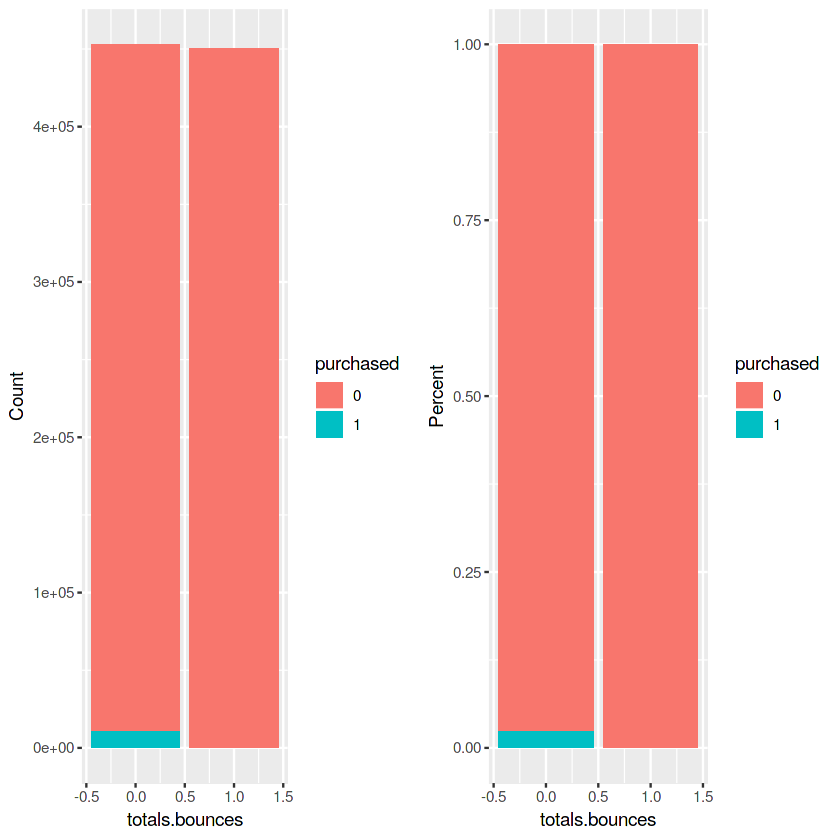

In [58]:
#totals.bounces
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=totals.bounces, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'totals.bounces', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=totals.bounces, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'totals.bounces', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

# Way more likely to purchase if totals.bounces==0.

# Also from https://www.kaggle.com/c/google-analytics-customer-revenue-prediction/discussion/65989 if totals.bounces==1, then you will always buy 0. This is good to know; but maybe because of this, I should remove these people from training set? What about removing this column during training, because of this correlation?

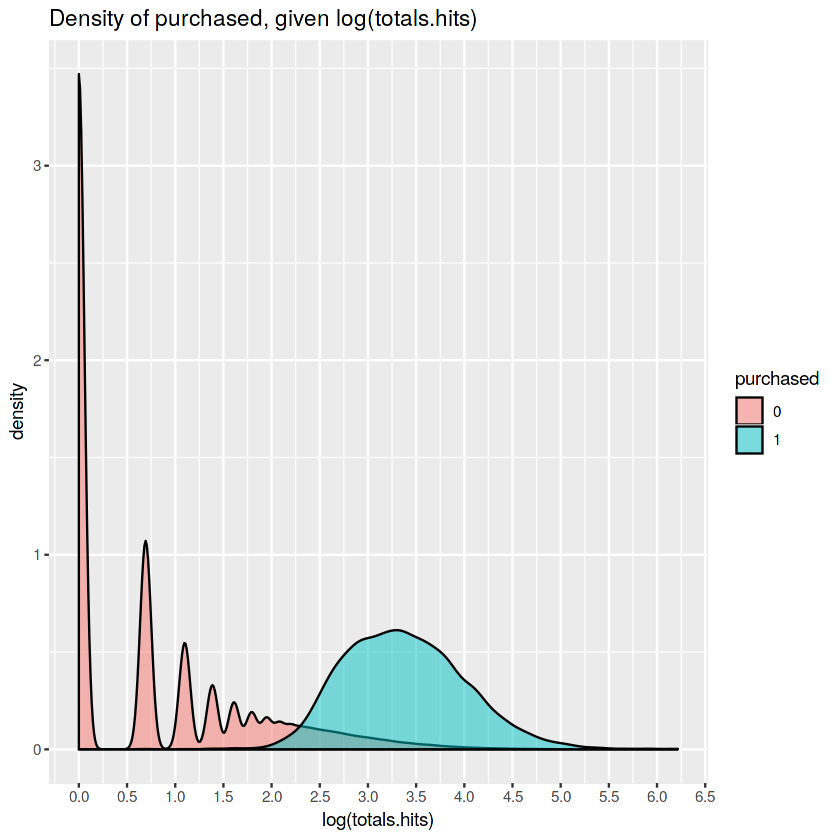

In [59]:
#totals.hits
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log(totals.hits), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given log(totals.hits)") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

# Large totals.hits implies very likely to make a purchase. This was the most important feature reported on the LightGBM public kernels people have publishes, and you can clearly see why.

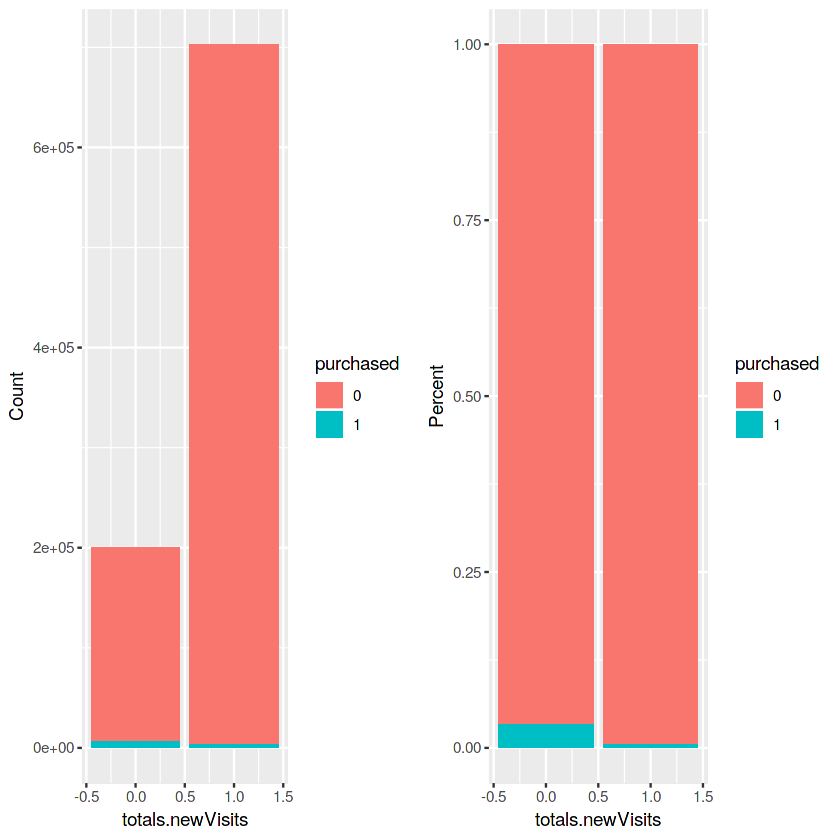

In [60]:
#totals.newVisits
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=totals.newVisits, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'totals.newVisits', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=totals.newVisits, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'totals.newVisits', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

# totals.newVisits==0 means you are more likely to make a purchase

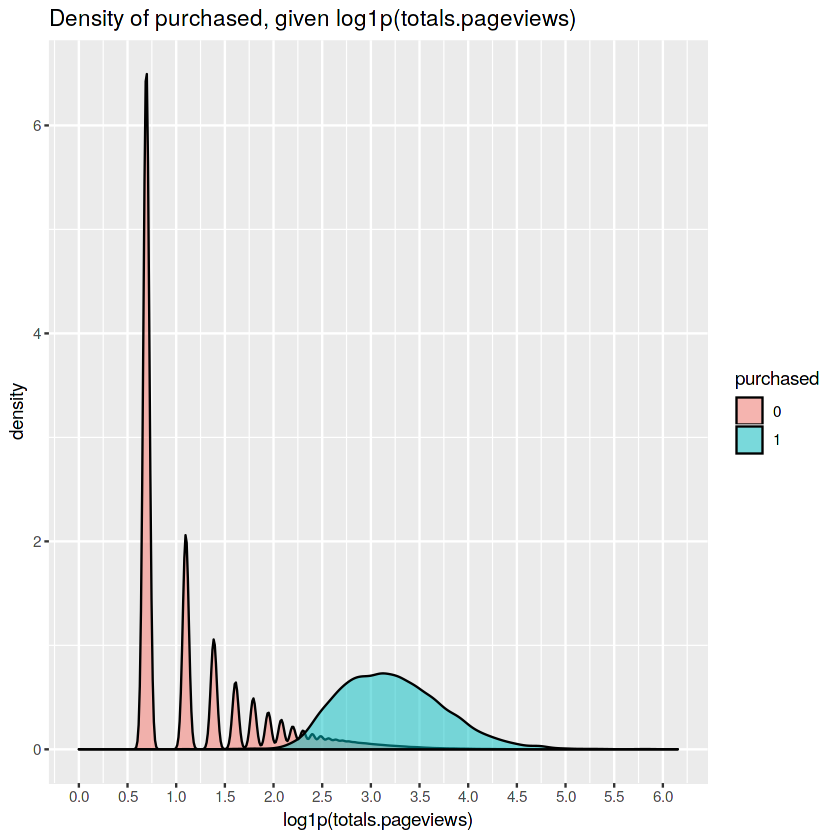

In [61]:
#totals.pageviews
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log1p(totals.pageviews), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given log1p(totals.pageviews)") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

# The more pageviews you have, the more likely you are to make a purchase.

In [62]:
#trafficSource.adContent
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=trafficSource.adContent][order(-mean)]

trafficSource.adContent                     count  mean       
1  {KeyWord:Want Google Stickers?}                 42 0.047619048
2  Swag with Google Logos                          64 0.046875000
3  {KeyWord:Google Branded Gear}                   67 0.044776119
4  {KeyWord:Google Men's T-Shirts}                 30 0.033333333
5  {KeyWord:Google Drinkware}                      32 0.031250000
6  20% discount                                    75 0.026666667
7  Google Merchandise Collection                 5122 0.022842640
8  Display Ad created 11/17/14                     50 0.020000000
9                                              892707 0.012738782
10 Full auto ad IMAGE ONLY                        822 0.006082725
11 Google Online Store                           1245 0.003212851
12 Display Ad created 3/11/14                     967 0.003102378
13 Display Ad created 3/11/15                     392 0.002551020
14 {KeyWord:Google Merchandise}                   155 0.000000000
15 Ad from 11/3/16                                489 0.000000000
16 {KeyWord:Google Brand Items}                   251 0.000000000
17 Ad from 12/13/16                               610 0.000000000
18 Google Merchandise                              87 0.000000000
19 {KeyWord:Looking for Google Bags?}              65 0.000000000
20 Ad from 11/7/16                                123 0.000000000
21 {KeyWord:Google Branded Kit}                    16 0.000000000
22 Full auto ad TEXT/NATIVE                         7 0.000000000
23 Free Shipping!                                   2 0.000000000
24 Google Paraphernalia                             7 0.000000000
25 LeEco_1a                                        25 0.000000000
26 Ad from 2/17/17                                  3 0.000000000
27 {KeyWord:Want Google Pet Toys?}                  4 0.000000000
28 Google Store                                     4 0.000000000
29 Full auto ad TEXT ONLY                          16 0.000000000
30 First Full Auto Template Test Ad                87 0.000000000
31 {KeyWord:Google Branded Outerwear}               5 0.000000000
32 Want Google Sunglasses                           8 0.000000000
33 JD_5a_v1                                        41 0.000000000
34 {KeyWord:Google Branded Apparel}                10 0.000000000
35 visit us again                                   1 0.000000000
36 url_builder                                      3 0.000000000
37 Official Google Merchandise - Fast Shipping      4 0.000000000
38 Full auto ad NATIVE ONLY                         3 0.000000000
39 free shipping                                    3 0.000000000
40 Full auto ad with Primary Color                  3 0.000000000
41 Men's-Outerwear Google Apparel                   1 0.000000000
42 google store                                     1 0.000000000
43 GA Help Center                                   1 0.000000000
44 Swag w/ Google Logos                             1 0.000000000
45 Google store                                     2 0.000000000

# Maybe you are more likely to make a purchase if you have the word "Google" in your search?
# Can split this into categories. Things that have the word "KeyWord" in it, things that have "Placement" in it, things that have "Ad" in it, things that have a dimension after it (e.g. 336 x 280)
# I can attach how many ads does the person see? Are the ads that are delivered to the person common to create a purchase?
# Maybe it doesnt matter much/overfit, since majority of rows are just ""

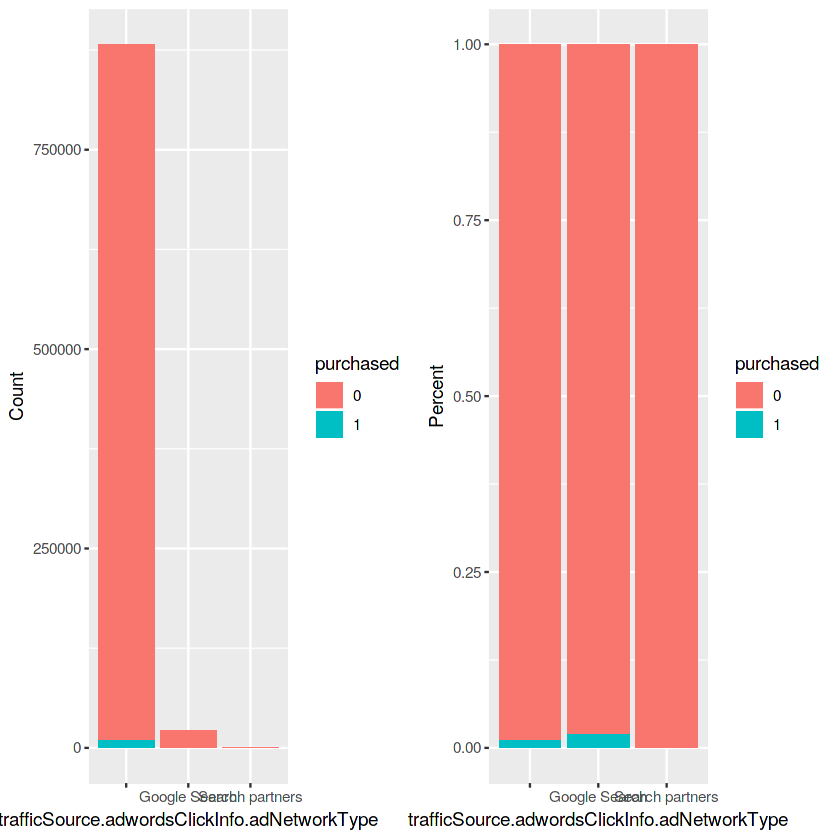

In [63]:
#trafficSource.adwordsClickInfo.adNetworkType
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=trafficSource.adwordsClickInfo.adNetworkType, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'trafficSource.adwordsClickInfo.adNetworkType', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=trafficSource.adwordsClickInfo.adNetworkType, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'trafficSource.adwordsClickInfo.adNetworkType', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

# Mostly ""

In [64]:
#trafficSource.adwordsClickInfo.gclId
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=trafficSource.adwordsClickInfo.gclId][order(-mean)]

trafficSource.adwordsClickInfo.gclId                                                        
1     CjwKCAjwmcTJBRAYEiwA9hQPbuNgYpMoPGULPox7VDdz9P1AfAvVFcD_HuMP0Y_ANGW9_F_ZH9oSVhoCiFIQAvD_BwE 
2     CJvv8JKnlc8CFcVcfgodjFwPQQ                                                                  
3     CjwKEAiA7ejCBRDlp8uF6ezPnjoSJAAPED7MZbZEbKJ1slhiQb0zdz8dRPPJnMAwf7e7f3Z1BW_YoBoCqV3w_wcB    
4     Cj0KEQiA56_FBRDYpqGa2p_e1MgBEiQAVEZ6-58XLFNfcHySe0DoEbnvSeQghZyRq-kT5XJCAAxPIOkaAlQs8P8HAQ  
5     Cj0KEQjwyZjKBRDu--WG9ayT_ZEBEiQApZBFuCmNq08SqFDLE-_-dL9Xe-H4-3EpwDOyAYLn9SlVkgUaAqje8P8HAQ  
6     CjwKCAjwjPXIBRBhEiwAz-kF6fEZgr4zI8kZmd2UiGq0_lO04qhVutcSDIp986pXhmfexbnWZDF7BBoC9yIQAvD_BwE 
7     CNXc7dGFu84CFUJufgod8XME_A                                                                  
8     CIrMhr2wodACFVclgQod3D4PyQ                                                                  
9     Cj0KCQjw3pTJBRChARIsABIb1Wt70rXbberj8JHZtQBaATj_GgOStigBKRbBh2JfPaYKF6aaZOrAkL8aAlXfEALw_wcB
10    CjwKEAjwydK_BRDK34GenvLB61YSJACZ8da3PSF5gZHs1kwn1Dgip1kmr2KCBK-SC0GCvTY4rI1KkhoCq-Dw_wcB    
11    Cj0KEQjw1K2_BRC0s6jtgJzB-aMBEiQA-WzDMXr3IgJwb_1QOu3D6l2FdQttWfsV4WleiM4xGQN-OzMaAgRY8P8HAQ  
12    Cj0KEQiA-MPCBRCZ0q23tPGm6_8BEiQAgw_bAoge4VmN-sCrNKz0c4OM2O691ey80rT450AoFvPDQckaAt1h8P8HAQ  
13    Cj0KEQjw_qW9BRCcv-Xc5Jn-26gBEiQAM-iJhQ0tUP0y7P5dcxG85slykVbxyGlzGfLO5FZD5HSs1UAaAqP08P8HAQ  
14    CjwKEAiAr4vBBRCG36e415-_l1wSJAAatjJZtDyNoLV1GioBSFZG5iUugT4KkIw8ZH8BZAdjPFA1DBoCxXbw_wcB    
15    CjwKEAiAmdXBBRD0hZCVkYHTl20SJACWsZj9qesxC48Kod9pBOKDIj1vCG34CzrH4aRUSbW0eF8IjxoCXyPw_wcB    
16    CjwKEAiAvZTCBRDvnoOaoa2j3xISJABxPjN9O8mkUSDhxNRA8Z9wXWPxKFuad4NrfSyesp5nFd9woxoCrqPw_wcB    
17    CjwKEAjw3KDIBRCz0KvZlJ7k4TgSJABDqOK7ZhUABepJ2iDXpcxa2IjDL10ZFlEmm6ZJwVx0MNE6hxoCYqLw_wcB    
18    Cj0KEQiAvNrBBRDe3IOwzLn6_O4BEiQAmbK-DtZa7mrgeYrxWdM_1mMet13qDpI0WSU0Qy_6ugnx_uUaArV28P8HAQ  
19    CjwKCAjwsqjKBRBtEiwAkWyN3_ncNS1D6TBxEBb7KSoCE2UvX_Mo6X5687Qf-aipNKfW-f4fNx5EMRoCTmsQAvD_BwE 
20    Cj0KEQjwi_W9BRD_3uio_Jz-p8UBEiQANU80vhYkhy6rdqPyBU0cfnqUkluEBgH2vHNyeBRK4EBtgLgaAjRJ8P8HAQ  
21    CNCUxuKe1NACFZZMDQodrMoKEQ                                                                  
22    Cj0KEQjw9IS-BRC4qZXagbLs6uMBEiQAYHBh-5h3R3ZbYgfFXDVFiswkuti_PlaPP0gsB6lMwhtWZaAaAvzJ8P8HAQ  
23    CjwKEAiA2OzDBRCdqIyIqYaaqQoSJABeJZditnDlwRQKGvYpP5N3A5yO1cKcCWKR8UOaLdb0yqSY0xoC-ozw_wcB    
24    CjwKCAjwu4_JBRBpEiwATmPGpy4EGMrI6cGLCy6l6DiCPEOMd5Qe4TiKMcItGOUMa_Mdf5RgSexEABoCsG4QAvD_BwE 
25    Cj0KCQjwja_JBRD8ARIsAHitdbmnS6ZvtVFtvhr5pHBLc2Y8E_a4qeYFPP6lksFGVdmDVQXMgtx5CxcaAhBxEALw_wcB
⋮     ⋮                                                                                           
17751 Cj0KEQjwofHHBRDS0Pnhpef89ucBEiQASEp6LExoohgmERDg4xis5lOYTCHQcx6LuWbeFeLP4sw3HewaAkzh8P8HAQ  
17752 CKzE9ZeFms8CFYY2gQodrS4F8A                                                                  
17753 CLDjn6mJms8CFYg8gQod-AkH2A                                                                  
17754 CjwKEAjwsqjKBRDtwOSjs6GTgmASJACRbI3fRJfKRhY0vSwyIOOclai06CZSDWDU8EPO2Q6yeIR2ORoCkO_w_wcB    
17755 Cj0KEQjw4_DABRC1tuPSpqXjxZwBEiQAhMIp6z0DgTci90lOzrl0hT2xWBvZvm3-yQE5ZWy8G-pF8okaAopZ8P8HAQ  
17756 Cj0KEQjwk-jGBRCbxoPLld_bp-IBEiQAgJaftf2NDEDqZEE5O5q3D8Hzpan_ZfcExKvzDfkSvsMvWSkaAsAn8P8HAQ  
17757 CKKPrMmwiNECFYmRfgodZ-oKig                                                                  
17758 CPL-gr3Fi9ECFQmIfgod_5YOXA                                                                  
17759 CJOJwYK6qc4CFYY0aQodoggFeA                                                                  
17760 CMvCgc-Ixc8CFUJrfgodwXkNNQ                                                                  
17761 Cj0KEQjwk-jGBRCbxoPLld_bp-IBEiQAgJaftQLf7UevgCUNZ71OZhH63fW0qNvCCyBYjk5QXndgKTUaAlKq8P8HAQ  
17762 Cj0KEQjw6am-BRCTk4WZhLfd4-oBEiQA3ydA3rFlAg7w-1KXqSMrxtayBcFRR6bHhUM57sViqozo35waAsw-8P8HAQ  
17763 Cj0KEQiAkO7CBRDeqJ_ahuiPrtEBEiQAbYupJUqmPSWfglnePxxAS-bPuQ4qnjnBemBwMhADLCvYyucaAsRA8P8HAQ  
17764 Cj0KCQjw7J3KBRCxARIsAPMXNVKF5m1E08WdS6Lk

# There's definitely 2 encodings for the gclId. One is short and one is long. Let's check lengths?

In [65]:
table(nchar(tr_te[totals.transactionRevenue!=-1]$trafficSource.adwordsClickInfo.gclId))


     0     26     55     87     88     90     91     92 
882092   6299   1062     57   5686   5806   1152   1499 

# Probably the buckets are 0, 26, 55, and 87-92

In [66]:
tr_te$len_gclId <- nchar(tr_te$trafficSource.adwordsClickInfo.gclId)

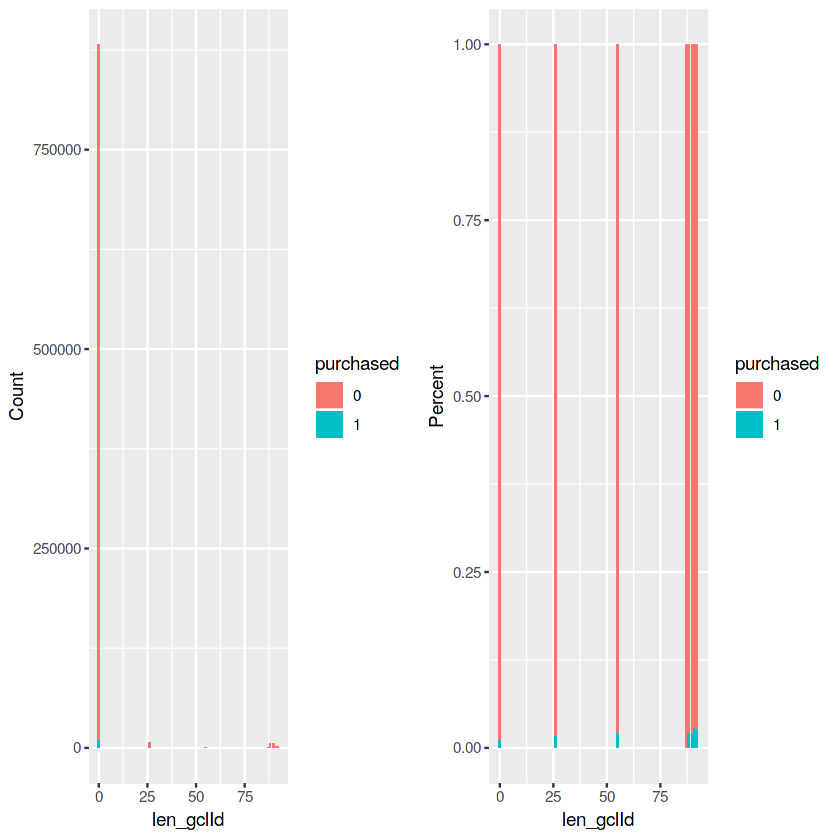

In [67]:
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=len_gclId, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'len_gclId', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=len_gclId, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'len_gclId', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

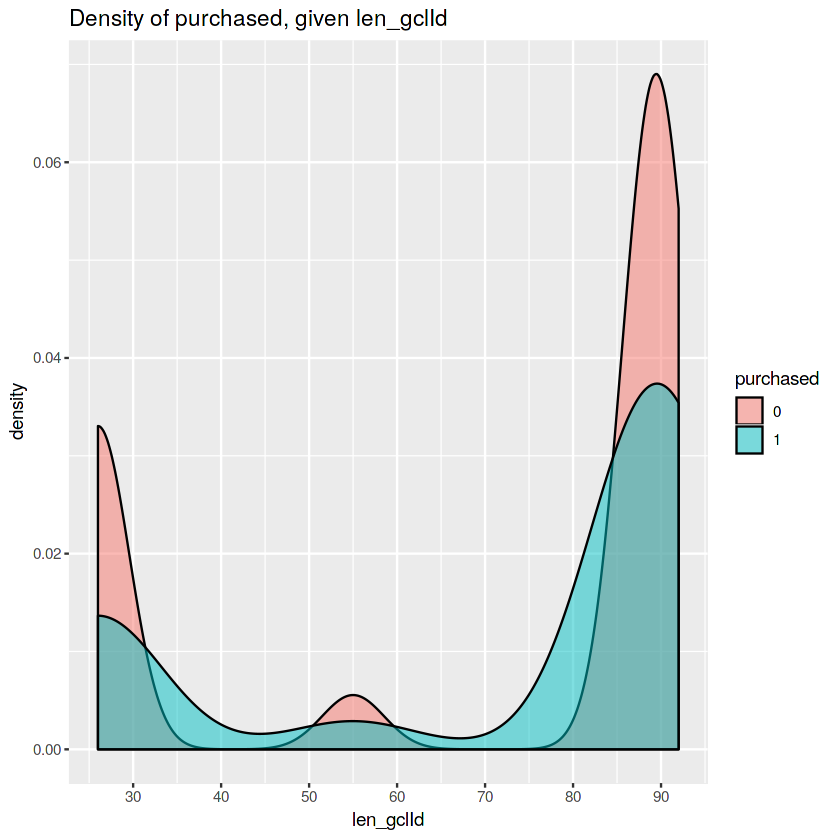

In [68]:
ggplot(tr_te[totals.transactionRevenue!=-1 & len_gclId!=0], aes(x = len_gclId, fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given len_gclId") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

# Hmmm.. Maybe there is something here?

In [69]:
#Length 26 people
head(tr_te[len_gclId==26]$trafficSource.adwordsClickInfo.gclId)

[1] "CKPbv6343NYCFdyFswodtWsOfg" "CLauxbKryNYCFRAJkQody1YPPA"
[3] "CJns87SyqNcCFQ0o0wodG0oMpA" "CKGIvpjIqtYCFYVcfgodwj8JLA"
[5] "CMTH2uGYs9YCFUqUfgodNJsPKQ" "CNvap-yHq9YCFcKPswodNd0O9g"

In [70]:
#Length 55 people
head(tr_te[len_gclId==55]$trafficSource.adwordsClickInfo.gclId)

[1] "EAIaIQobChMI7LnY5KLJ2AIVRHliCh1nVQYVEAEYASAAEgLEf_D_BwE"
[2] "EAIaIQobChMI0dC-n-me2AIVhMnjBx02OwM5EAEYASAAEgKMg_D_BwE"
[3] "EAIaIQobChMI6svtmdLH2AIVibcbCh03aQZeEAEYASAAEgKxK_D_BwE"
[4] "EAIaIQobChMI1JXE8eXz1gIVE7nACh0G7AC5EAAYAiAAEgIvXvD_BwE"
[5] "EAIaIQobChMIsqKBwJq30wIV0IKzCh2MiQ8eEAAYASAAEgJjSfD_BwE"
[6] "EAIaIQobChMI4avUwKfH1gIVpLyzCh27QA1AEAEYASAAEgLg5PD_BwE"

In [71]:
#Length 87 people
head(tr_te[len_gclId==87]$trafficSource.adwordsClickInfo.gclId)

[1] "CjsKDwjw95vPBRDVgarcl8PDcRIkAKvPd3KzYPrndKHmqwgfVEDLpONGAQQ51K66s13BdoNLoFKFGgKhDvD_BwE"
[2] "CjsKDwjw6qnJBRDpoonDwLSeZhIkAIpTR8ICdJDJ4L9temIF8S0j8IJSez4caUMZo92dbqCOgp_kGgLFMPD_BwE"
[3] "CjsKDwjw6qnJBRDpoonDwLSeZhIkAIpTR8Lv9102pg3MOc9xH0_SscL4BJAaxeFMOwFDx-clyUY6GgIoqPD_BwE"
[4] "CjsKDwjw6qnJBRDpoonDwLSeZhIkAIpTR8LJf1WHQcU4YPlFEyqhHylWUpQCzm24wDzdK8aEC2UuGgLNu_D_BwE"
[5] "CjsKDwjw6qnJBRDpoonDwLSeZhIkAIpTR8JCcWdUx9wF69nhySPa38X7OvjsCko4Gl_yBjPbsIpoGgIJOfD_BwE"
[6] "CjsKDwjw95vPBRDVgarcl8PDcRIkAKvPd3J7g3-YoRj47mCKe4f33YIFNgmaMeglRBOvWJubigySGgI7-fD_BwE"

In [72]:
#Length 88 people
head(tr_te[len_gclId==88]$trafficSource.adwordsClickInfo.gclId)

[1] "CjwKEAiAqJjDBRCG5KK6hq_juDwSJABRm03htva2k9KE8MXGSzyExGApqcik7T7-DaBwEzroHKw0yRoC053w_wcB"
[2] "CjwKEAiAs_PCBRD5nIun9cyu01kSJAA-WD-r3qwCD96zm3QTQKo02ZpgMS_MFAnsW0N528gT7p6LXhoCD8_w_wcB"
[3] "CjwKEAjw85DIBRCy2aT0hPmS1jkSJAC1m9Uvg87ZcEa2uKrW2wY2IP4jg8PN7XM5--SQQTrST_S6jxoCOPzw_wcB"
[4] "CjwKEAiA94nCBRDxismumrL83icSJAAeeETQpR6V_n8t6_ytm8g5lEIeN6fBC81XHeFb_UhaJ-TA-xoCbD3w_wcB"
[5] "CjwKEAjw5M3GBRCTvpK4osqj4X4SJAABRJNCL5RO2xWO1_0IQ1h21PmVxEXNpCsJahy8vNyJiyLysRoCvfTw_wcB"
[6] "CjwKEAiAm8nCBRD7xLj-2aWFyz8SJAAQNalasyCPQKpBs3nPagNYV8bb2mhM04wQLaWY0G_4XdC59RoCF97w_wcB"

In [73]:
#Length 90 people
head(tr_te[len_gclId==90]$trafficSource.adwordsClickInfo.gclId)

[1] "Cj0KEQiAifvEBRCVx5up6Ojgr5oBEiQALHw1TrnWAHiMtZwdkdUQlxn-0mLK5kep2y1GiD0M7zYwdzcaAoLt8P8HAQ"
[2] "Cj0KEQiAifvEBRCVx5up6Ojgr5oBEiQALHw1TrnWAHiMtZwdkdUQlxn-0mLK5kep2y1GiD0M7zYwdzcaAoLt8P8HAQ"
[3] "Cj0KEQjwkN3KBRCu2fWmy9LLqN4BEiQANP9-Wjv7JDOfF9u6QypFDCBZI6XAPwkAR-ph-M-XzTFtwtcaAkiK8P8HAQ"
[4] "Cj0KEQjwkN3KBRCu2fWmy9LLqN4BEiQANP9-WjM84uTgMZpST_7QC6eSe-qYjfaaSJb3L0wV_RBJLG0aAgWD8P8HAQ"
[5] "Cj0KEQjw0qLOBRDUvPzj2-X5jJ0BEiQAMG5xMDmuounB5O9W2YJ3rKw2AtN2ZR1InCdOOKaGOV1Xv38aAuor8P8HAQ"
[6] "Cj0KEQjw6uO-BRDbzujwtuzAzfkBEiQAAnhJ0KOOo3U-4JDHMhXEIZi5gCJz3foseN4Gp-0jyLLHozMaApcY8P8HAQ"

In [74]:
#Length 91 people
head(tr_te[len_gclId==91]$trafficSource.adwordsClickInfo.gclId)

[1] "CjwKCAjwoNrMBRB4EiwA_ODYvxp9BjjWBhPbYqghO9BHvgu2w-TU_yujuwI31XkKrOi12escGJPPghoCWq4QAvD_BwE"
[2] "CjwKCAjw9O3NBRB3EiwAK6wPTwQbzi561-6eYLxaa922PxhCCjZ3wshGjTO_VLfj2nPYticxuiR8IhoCreoQAvD_BwE"
[3] "CjwKCAjwhYLLBRBIEiwAtFeED9DeXpSjqdzZn8mz-OOL2gt-WYLpdRdJ351BeIfYurVt4jhBTeJ1CBoCTf0QAvD_BwE"
[4] "CjwKCAjwssvPBRBBEiwASFoVdzQEjI2MiZJl7opXbKz4-qAlXwMu2MCDGLkz2fDdADkA1jPBrahj6BoCN1IQAvD_BwE"
[5] "CjwKCAjwlrnNBRBMEiwApKU4PAezR_ERikTQcnjnYZM3HhaCxj0JvZYI-XFZ1cxD79-QnuZL0zZFXhoC_xMQAvD_BwE"
[6] "CjwKCAiAoNTUBRBUEiwAWje2lmAXv4UA2_ICibisJcRhT-OE_jB9RBF3_j4mj8ZXu2nSpAECOzQyLxoCMikQAvD_BwE"

In [75]:
#Length 92 people
head(tr_te[len_gclId==92]$trafficSource.adwordsClickInfo.gclId)

[1] "Cj0KCQjwwqXMBRCDARIsAD-AQ2hmCSzyXQbDmYco41B12r5gXaQM606-yM1rZjWufMzChPwIbnQXl30aAo7tEALw_wcB"
[2] "Cj0KCQiAkNfSBRCSARIsAL-u3X9lgISm70E4CCnc3WG4JlEx6LjU39xhBTW11FOOM-5V8zV325QQZ1UaAkvpEALw_wcB"
[3] "Cj0KCQiAkNfSBRCSARIsAL-u3X-H_aZ95MDzhxxST6cUstgm_LwJqjmanSBw5WC_voiSovnEwRF0m7kaAubKEALw_wcB"
[4] "Cj0KCQjw24nNBRChARIsALldLD2uVnEtMdz01wp-x5Qw-UUXqHyzLTXdEur7j1I5FkP_O7CDUnwF2bsaAtl3EALw_wcB"
[5] "Cj0KCQjwpMLOBRC9ARIsAPiGeZCwnzy1wYCH0leVRYx5YDSaDvZ3ytzl2VG-cgOTQYiYB642jteKnK8aAuwXEALw_wcB"
[6] "Cj0KCQjwpMLOBRC9ARIsAPiGeZBVvYWJK6Aj_putW2eyMxxvY9SfggXYljE5p0_UrqGhB4z4L6fPyIcaAqS_EALw_wcB"

# Some more things to notice:
# 1) Many people of the same length start with the same prefix of letters
# 2) Many people of the same length end with the same suffix of letters
# Some suffixes are common across lengths: what's the difference between BwE, wcB, HAQ?

In [76]:
tr_te$gclId_suffix <- substr(tr_te$trafficSource.adwordsClickInfo.gclId,
                                           start=tr_te$len_gclId+1-3,
                                           stop=tr_te$len_gclId)

In [77]:
sort(table(tr_te$gclId_suffix))


    11w     A8A     ABA     AcQ     AjA     AJw     AkQ     AmA     ANA     ApA 
      1       1       1       1       1       1       1       1       1       1 
    ARQ     ARw     B0g     B9g     Blg     Bqw     Brw     Bvg     BVQ     ByA 
      1       1       1       1       1       1       1       1       1       1 
    C3w     CCA     CCQ     D0Q     D3A     Deg     DmQ     DOQ     DSg     DTw 
      1       1       1       1       1       1       1       1       1       1 
    DYg     E_Q     EIQ     ErA     EuQ     F0g     FgA     FMg     FOQ     FWg 
      1       1       1       1       1       1       1       1       1       1 
    FXQ     H2Q     H8Q     HdQ     HHQ     HIw     Hmg     I4Q     ICw     IFQ 
      1       1       1       1       1       1       1       1       1       1 
    IqA     IrA     ITQ     Iyg     J1Q     J8w     JAQ     JjQ     Jnw     JzQ 
      1       1       1       1       1       1       1       1       1       1 
    K3g     Kag     KBA    

# So it's true. HAQ, wcB, BwE are very common. Maybe they mean something

In [78]:
tr_te[gclId_suffix!='BwE' & gclId_suffix!='wcB' & gclId_suffix!='HAQ' & gclId_suffix!='']$gclId_suffix <- 'rare_suffix'

In [79]:
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=gclId_suffix][order(-mean)]

gclId_suffix count  mean      
1 BwE            2271 0.02509908
2 wcB            7185 0.02352122
3 HAQ            5806 0.01997933
4 rare_suffix    6299 0.01809811
5              882092 0.01253724

# Well, there's something there. Certain suffixes make you more likely to buy.
# It's also very obvious this is base64 encoding I think, so we can convert this back to a number possibly and look at if ordering means something? Maybe lower numbers mean something
# In any case, this might not even help since majority of users have ""

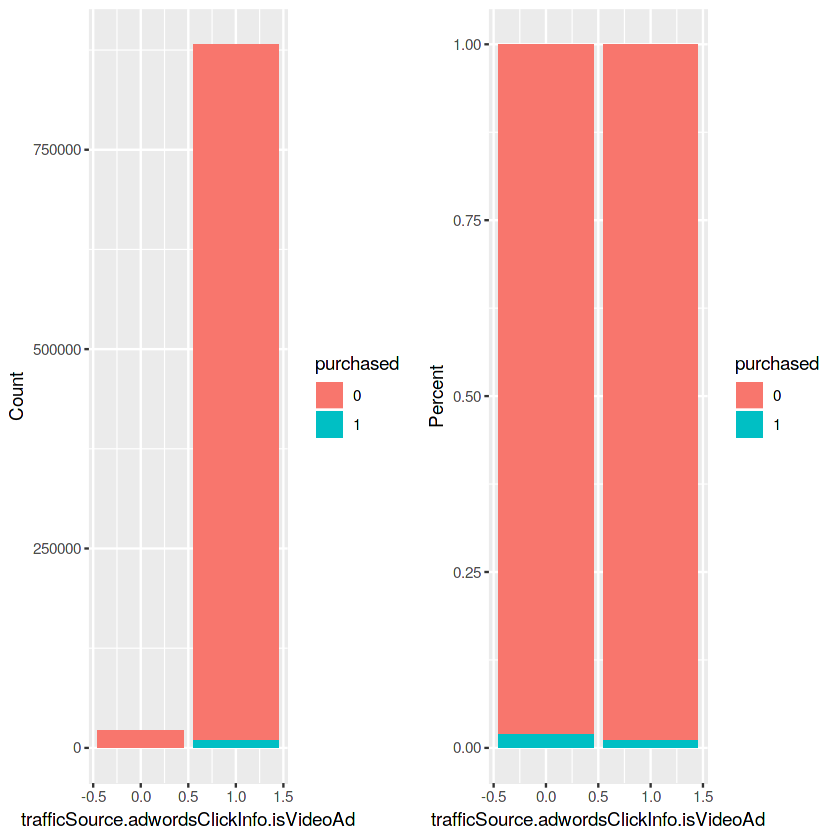

In [80]:
#trafficSource.adwordsClickInfo.isVideoAd
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=trafficSource.adwordsClickInfo.isVideoAd, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'trafficSource.adwordsClickInfo.isVideoAd', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=trafficSource.adwordsClickInfo.isVideoAd, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'trafficSource.adwordsClickInfo.isVideoAd', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

# Not much to talk about here, except most people *do* receive a video ad. And if you were able to come to the website without a video ad, you might be more likely for a purchase

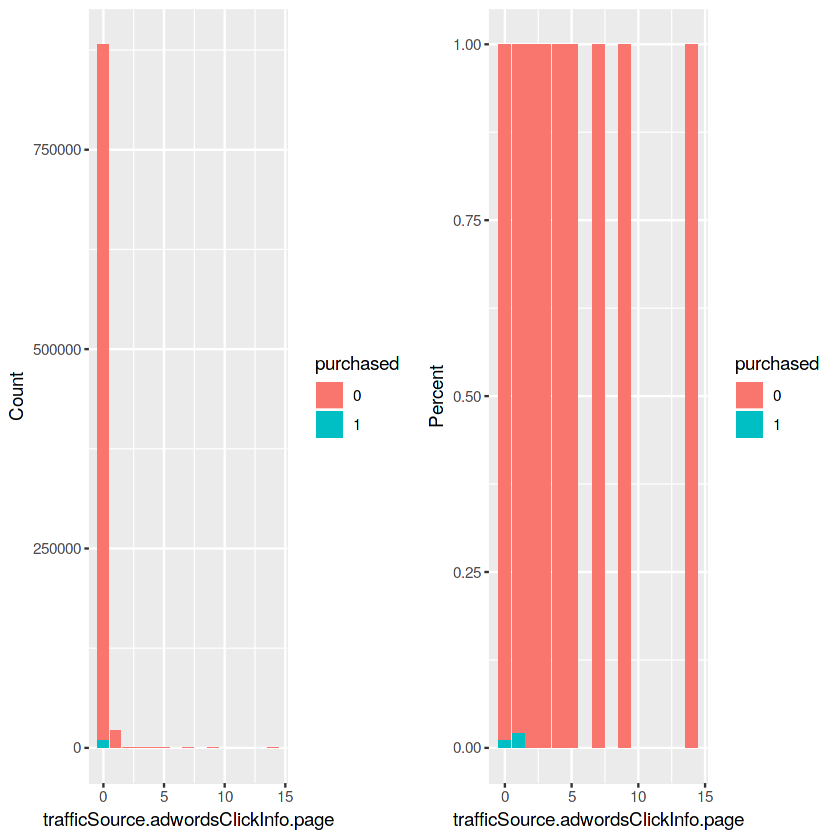

In [81]:
#trafficSource.adwordsClickInfo.page
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=trafficSource.adwordsClickInfo.page, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'trafficSource.adwordsClickInfo.page', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=trafficSource.adwordsClickInfo.page, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'trafficSource.adwordsClickInfo.page', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

In [82]:
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=trafficSource.adwordsClickInfo.page][order(-mean)]

trafficSource.adwordsClickInfo.page count  mean      
1  1                                   21362 0.02125269
2  0                                  882193 0.01253807
3  2                                      73 0.00000000
4  3                                      10 0.00000000
5  5                                       7 0.00000000
6  4                                       2 0.00000000
7 14                                       1 0.00000000
8  9                                       2 0.00000000
9  7                                       3 0.00000000

# Most people are either 0 or 1. Anything greater than 1 should probably be treated the same.

In [83]:
tr_te[trafficSource.adwordsClickInfo.page>1]$trafficSource.adwordsClickInfo.page <- 2

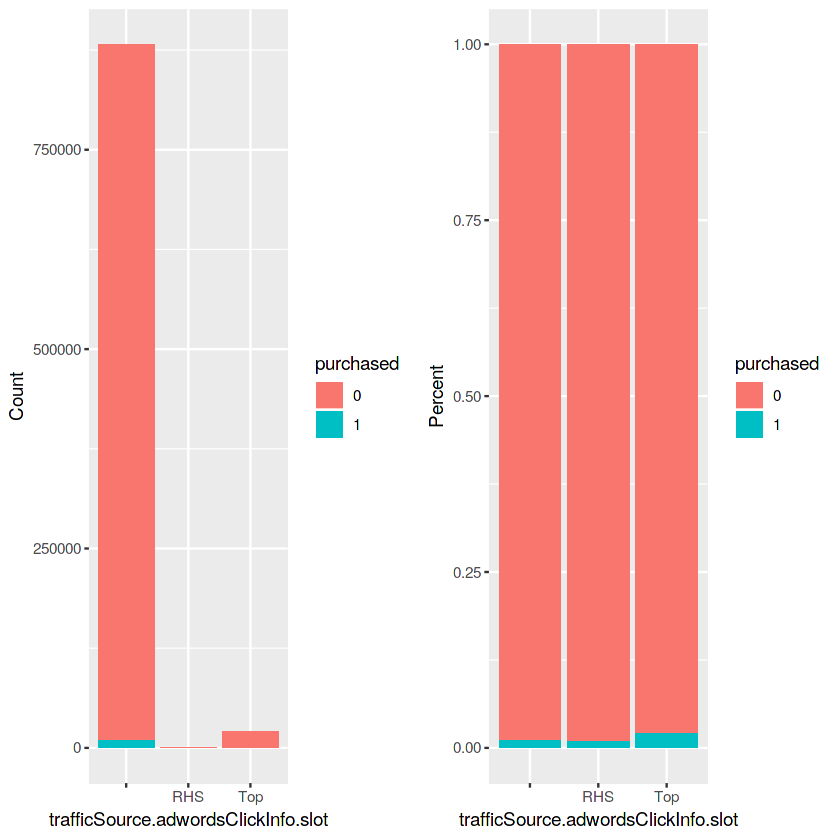

In [84]:
#trafficSource.adwordsClickInfo.slot
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=trafficSource.adwordsClickInfo.slot, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'trafficSource.adwordsClickInfo.slot', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=trafficSource.adwordsClickInfo.slot, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'trafficSource.adwordsClickInfo.slot', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

In [85]:
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=trafficSource.adwordsClickInfo.slot][order(-mean)]

trafficSource.adwordsClickInfo.slot count  mean       
1 Top                                  20956 0.021425845
2                                     882193 0.012538073
3 RHS                                    504 0.009920635

# More likely to purchase if your slot is "Top"

# It's just come to my attention that all the guys that have blank values or stuff means that they weren't issued an adwordsClickInfo (or, at least it's close). If people ever have a NULL value in one of these columns, maybe they can be 0 for a new column called "served_ad" ? Will create it later, I guess.

In [86]:
#trafficSource.campaign
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=trafficSource.campaign][order(-mean)]

trafficSource.campaign                          count  mean        
1  AW - Dynamic Search Ads Whole Site               14244 0.0226762145
2  AW - Apparel                                        46 0.0217391304
3  Retail (DO NOT EDIT owners nophakun and tianyu)     50 0.0200000000
4  AW - Accessories                                  7070 0.0183875530
5  (not set)                                       865347 0.0127694439
6  test-liyuhz                                        392 0.0025510204
7  Data Share Promo                                 16403 0.0005486801
8  AW - Electronics                                    96 0.0000000000
9  Data Share                                           1 0.0000000000
10 All Products                                         4 0.0000000000

# Certain campaigns are more likely to generate a purchase. Also, who are nophakun and tianyu?

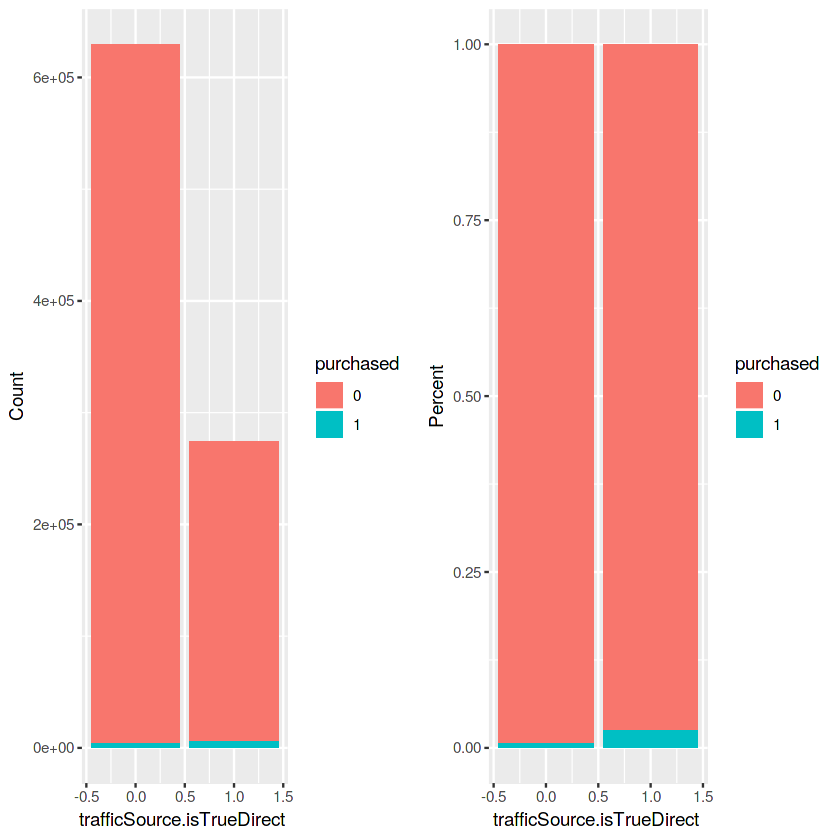

In [87]:
#trafficSource.isTrueDirect 
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=trafficSource.isTrueDirect , fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'trafficSource.isTrueDirect ', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=trafficSource.isTrueDirect , fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'trafficSource.isTrueDirect ', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

# If trafficSource.isTrueDirect==1, you are much more likely to make a purchase.

In [88]:
#trafficSource.keyword 
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=trafficSource.keyword][order(-mean)]

trafficSource.keyword                   count  mean      
1    +google +coffee +mug                         1 1.00000000
2    google men's hoodie pullover                 1 1.00000000
3    you tube trucker cap google merchandise      1 1.00000000
4    Youtube merchandise store                    2 0.50000000
5    GOOGLE MERCHANDISE                           5 0.40000000
6    google apparel store                         7 0.28571429
7    google items for sale                        5 0.20000000
8    googlesupport                                6 0.16666667
9    +Google +Gear                               27 0.11111111
10   googlemerchandisestore                      12 0.08333333
11   category_l1==166                            36 0.05555556
12   youtube merchandise store                   21 0.04761905
13   +Google +Swag                               65 0.04615385
14   +google+tshirts                             24 0.04166667
15   google stickers                             49 0.04081633
16   google store merchandise                    62 0.03225806
17   google shirt                                31 0.03225806
18   Google Merchandise                        1648 0.02730583
19   google merchandise store                  2209 0.02670892
20   1hZbAqLCbjwfgOH7                          2264 0.02473498
21   6qEhsCssdK0z36ri                         11503 0.02268973
22   +Google +Merchandise                       352 0.01988636
23   +google +merch                              60 0.01666667
24                                           502929 0.01519896
25   1X4Me6ZKNV0zg-jV                           467 0.01284797
⋮    ⋮                                       ⋮      ⋮         
3636 lather lamps for sale                   2      0         
3637 googl indonesia                         1      0         
3638 oakland raiders bean bag chair          1      0         
3639 Ti shirt store                          1      0         
3640 yatube                                  1      0         
3641 gòogle store                            1      0         
3642 gogle store                             1      0         
3643 google store t-sthrts                   1      0         
3644 Google hat sekca                        1      0         
3645 genuine merchandise shirt               1      0         
3646 how to create shop merchandise          1      0         
3647 youtube Merchandising                   1      0         
3648 www.......google goods                  1      0         
3649 youtube cap men buy                     1      0         
3650 pink you tube                           1      0         
3651 Google for men's                        1      0         
3652 Youtube Women                           1      0         
3653 Yutobe                                  1      0         
3654 www.Goolge plaky stroe.COM              1      0         
3655 campus merchandise indonesia            1      0         
3656 google merchandise buy online india     2      0         
3657 Headwear itam price                     1      0         
3658 merchandize store                       1      0         
3659 yotrube                                 1      0         
3660 android t shirt buy                     1      0

# Some of these obviously won't result in a purchase. For example "Mug pic", "amazon uk lava lamp", "baby on board window decal", etc. I could go through and identify ones that are unrelated to Google merchandise store
# I wonder if '(not provided)' is the same as ""
# Also based on the types of searches you can infer a little bit about the person (How many misspelled words do they have (this can indicate education/familiarity with english language) Certain things like including "www." in the keyword can reveal that you are old, or typing in "show me youtube" reveals you are old
# Binaries for including certain words. Does keyword contain an apparel item (shirt, cap, hoodie, backpack, etc.)? Does keyword contain "Google"? Does keyword contain "merchandise"? Does keyword contain "store" ?
# Majority of people do not have a keyword, though.

In [89]:
#trafficSource.medium
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=trafficSource.medium][order(-mean)]

trafficSource.medium count  mean        
1 cpm                    6262 0.0226764612
2 cpc                   25326 0.0184790334
3 referral             330955 0.0163617410
4 (none)               143026 0.0142771244
5 organic              381561 0.0090103548
6 (not set)               120 0.0083333333
7 affiliate             16403 0.0005486801

# Lots of identifying information can be found here: https://support.google.com/analytics/answer/1033173?hl=en

# https://www.optimizesmart.com/understanding-channels-in-google-analytics/

### Medium: Every referral to a website also has a medium. Possible medium include: “organic” (unpaid search), “cpc” (cost per click, i.e. paid search), “referral” (referral), “email” (the name of a custom medium you have created), “none” (direct traffic has a medium of “none”).

In [90]:
#trafficSource.referralPath
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=trafficSource.referralPath][order(-mean)]

trafficSource.referralPath                                                                                                                                                                                      
1    /2610273/projects/12161610/todos/250267685                                                                                                                                                                      
2    /webmail/en-us/tablet                                                                                                                                                                                           
3    /KtfjgWJtWs                                                                                                                                                                                                     
4    /calendar/r/week/2017/7/8                                                                                                                                                                                       
5    /_/scs/mail-static/_/js/k=gmail.main.en.sXDiEpUnPe0.O/m=m_i,t,it/am=nhGvDGD-3_uDcQ3DgK701brz33u-Xyo_e7nH_ycDROlVoP_N_h_A_4H-tI0C/rt=h/d=1/rs=AHGWq9Bm-1qj1hhkb8cG9EpeilyYgWjoxA                                 
6    /photos/google-dog-toy-21237.html                                                                                                                                                                               
7    /_/scs/mail-static/_/js/k=gmail.main.en.yASPeSEQ5YQ.O/m=m_i,t/am=OotXDrD_7_3BuIZhQFf6at3573--_VR26Oce_58IiCKvAv3___8A_w_ko20U/rt=h/d=1/rs=AHGWq9DZAa74rKvcihAYhdWoJ70MBwYmVA                                    
8    /a/google.com/another-attempt-google-merchandise-store/mountain-view-on-site-merchandise-store                                                                                                                  
9    /neo/b/message                                                                                                                                                                                                  
10   /IUI6ugD07C                                                                                                                                                                                                     
11   /document/d/1uELQ97D_yoYkVD_C7Jqc2i1R2gQfn9H0KjfVbu3m-kU/edit                                                                                                                                                   
12   /site/northcountycomputer/                                                                                                                                                                                      
13   /a/google.com/nestlabs/nestling/nestling                                                                                                                                                                        
14   /neo/rd                                                                                                                                                                                                         
15   /deal/-ds-sign-up-for-google-merchandise-store-emails-for-special-coup-c179                                                                                                                                     
16   /mail/u/1/                                                                                                                                                                                                      
17   /neo/launch                                                                                                                                                                                                     
18   /HBtw4R2RL5                                                                                                                                         

# Can group these based on their subdirectories? What if they have the word 'google' in it? Might have to change to a binary 1 or 0 because cardinality is very high and might not carry a lot of information

In [91]:
#trafficSource.source 
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=trafficSource.source][order(-mean)]

trafficSource.source                              count mean      
1   basecamp.com                                          2 0.50000000
2   mail.aol.com                                          3 0.33333333
3   us-mg5.mail.yahoo.com                                 4 0.25000000
4   calendar.google.com                                   5 0.20000000
5   chat.google.com                                       7 0.14285714
6   search.myway.com                                      8 0.12500000
7   mg.mail.yahoo.com                                    34 0.11764706
8   gatewaycdi.com                                       10 0.10000000
9   trainup.withgoogle.com                               26 0.07692308
10  mall.googleplex.com                               66416 0.07683390
11  dealspotr.com                                       528 0.07575758
12  pinterest.com                                        29 0.06896552
13  mail.google.com                                    1457 0.04255319
14  keep.google.com                                      47 0.04255319
15  groups.google.com                                  1025 0.03707317
16  connect.googleforwork.com                            97 0.03092784
17  phandroid.com                                       222 0.02702703
18  search.xfinity.com                                   37 0.02702703
19  dfa                                                5686 0.02163208
20  googleux.perksplus.com                              185 0.02162162
21  l.messenger.com                                      50 0.02000000
22  gdeals.googleplex.com                              1063 0.01693321
23  l.facebook.com                                      795 0.01635220
24  yahoo                                              1480 0.01486486
25  ask                                                 270 0.01481481
⋮   ⋮                                                 ⋮     ⋮         
356 watchword.googleplex.com                           3    0         
357 wunderbin.corp.google.com                          2    0         
358 0.shared.bow.cat2.ads-bow.lf.borg.google.com:9817  1    0         
359 0.shared.bow.cat2.ads-bow.lf.borg.google.com:9879  1    0         
360 0.shared.bow.cat2.ads-bow.qk.borg.google.com:9899  1    0         
361 mobile.facebook.com                                1    0         
362 0.shared.bow.cat2.ads-bow.yw.borg.google.com:9862  1    0         
363 0.shared.bow.cat2.ads-bow.yw.borg.google.com:9859  1    0         
364 0.shared.bow.cat2.ads-bow.yw.borg.google.com:9847  1    0         
365 images.google.ie                                   2    0         
366 adwords-prod-west.qa.adz.google.com                1    0         
367 lmgtfy.com                                         1    0         
368 0.shared.bow.cat2.ads-bow.vw.borg.google.com:9891  1    0         
369 toronto.mtv.corp.google.com:8080                   2    0         
370 0.shared.bow.cat2.ads-bow.vu.borg.google.com:9883  1    0         
371 0.shared.bow.cat2.ads-bow.yw.borg.google.com:9801  1    0         
372 cc.csusm.edu                                       1    0         
373 0.shared.bow.cat2.ads-bow.lf.borg.google.com:9824  1    0         
374 hosted.verticalresponse.com                        1    0         
375 0.shared.bow.cat2.ads-bow.qk.borg.google.com:9819  1    0         
376 ixquick.com                                        1    0         
377 google.ro                                          1    0         
378 web.whatsapp.com                                   1    0         
379 staging.talkgadget.google.com                      2    0         
380 desktop.google.com.ua                             11    0

# Again, can look at Alexa rating of these websites, average age of people who go on these websites, language of websites. Can look at if website is "techy" or shares a lot of clothes or not. Can cardinality reduce--for example I see a lot of X.yahoo.com, or google.com.X
# Does the website name contain the word "google" in it? For example mail.googleplex.com seems very popular

# -------------------------------------------------------------
# Okay, now let's separate back into train and test and look at column differences between train and test. If there are a lot of not-shared values, this implies to me a cardinality reduction will be necessary.

In [92]:
train <- tr_te[totals.transactionRevenue!=-1]
test <- tr_te[totals.transactionRevenue==-1]
tr_te$i_am_train <- ifelse(tr_te$totals.transactionRevenue!=-1, 1, 0)

In [93]:
colnames(train)

[1] "channelGrouping"                             
 [2] "date"                                        
 [3] "fullVisitorId"                               
 [4] "sessionId"                                   
 [5] "visitId"                                     
 [6] "visitNumber"                                 
 [7] "visitStartTime"                              
 [8] "device.browser"                              
 [9] "device.deviceCategory"                       
[10] "device.isMobile"                             
[11] "device.operatingSystem"                      
[12] "geoNetwork.city"                             
[13] "geoNetwork.continent"                        
[14] "geoNetwork.country"                          
[15] "geoNetwork.metro"                            
[16] "geoNetwork.networkDomain"                    
[17] "geoNetwork.region"                           
[18] "geoNetwork.subContinent"                     
[19] "totals.bounces"                              
[20] "totals.hits"                                 
[21] "totals.newVisits"                            
[22] "totals.pageviews"                            
[23] "totals.transactionRevenue"                   
[24] "trafficSource.adContent"                     
[25] "trafficSource.adwordsClickInfo.adNetworkType"
[26] "trafficSource.adwordsClickInfo.gclId"        
[27] "trafficSource.adwordsClickInfo.isVideoAd"    
[28] "trafficSource.adwordsClickInfo.page"         
[29] "trafficSource.adwordsClickInfo.slot"         
[30] "trafficSource.campaign"                      
[31] "trafficSource.isTrueDirect"                  
[32] "trafficSource.keyword"                       
[33] "trafficSource.medium"                        
[34] "trafficSource.referralPath"                  
[35] "trafficSource.source"                        
[36] "purchased"                                   
[37] "shift_visitStartTime"                        
[38] "max_visitStartTime"                          
[39] "min_visitStartTime"                          
[40] "cur_minus_max_visitStartTime"                
[41] "cur_minus_min_visitStartTime"                
[42] "max_minus_min_visitStartTime"                
[43] "ratio_visitStartTime"                        
[44] "no_geoNetwork.city"                          
[45] "no_geoNetwork.metro"                         
[46] "no_geoNetwork.region"                        
[47] "len_gclId"                                   
[48] "gclId_suffix"

In [94]:
#channelGrouping has same values

In [95]:
#date
#as.Date('1970-01-01') + sort(setdiff(test$date, train$date))
#Train has dates from 2016-08-01 to 2017-08-01
#Train has dates from 2017-08-02 to 2018-04-30

#Therefore I need to extract Date values from this, as opposed to using seconds since epoch
#Day of year? Weekend/weekday? Holiday (in that country)?

In [96]:
tr_te <- tr_te[order(fullVisitorId, visitStartTime)] #order it

In [97]:
#visitNumber
#train goes from 1 to 395
#test goes from 1 to 457
#Therefore we should have a bucketing clip for large values
#head(tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=visitNumber][order(visitNumber)], 50)

#Before I clip this, let's make a few features, namely:
#max(visitNumber)
#shift(visitNumber) #Recall I was suspicious when this shift was not equal to one!
tmp <- tr_te[, .('shift_visitNumber'=visitNumber - shift(visitNumber), 'max_visitNumber'=max(visitNumber), 'min_visitNumber'=min(visitNumber)), by=fullVisitorId]
tr_te$shift_visitNumber <- tmp$shift_visitNumber
#tr_te[is.na(shift_visitNumber)]$shift_visitNumber <- 1 #Impute NA with 1
tr_te$max_visitNumber <- tmp$max_visitNumber
tr_te$min_visitNumber <- tmp$min_visitNumber
tr_te$cur_minus_max_visitNumber <- tr_te$visitNumber - tr_te$max_visitNumber
tr_te$cur_minus_min_visitNumber <- tr_te$visitNumber - tr_te$min_visitNumber

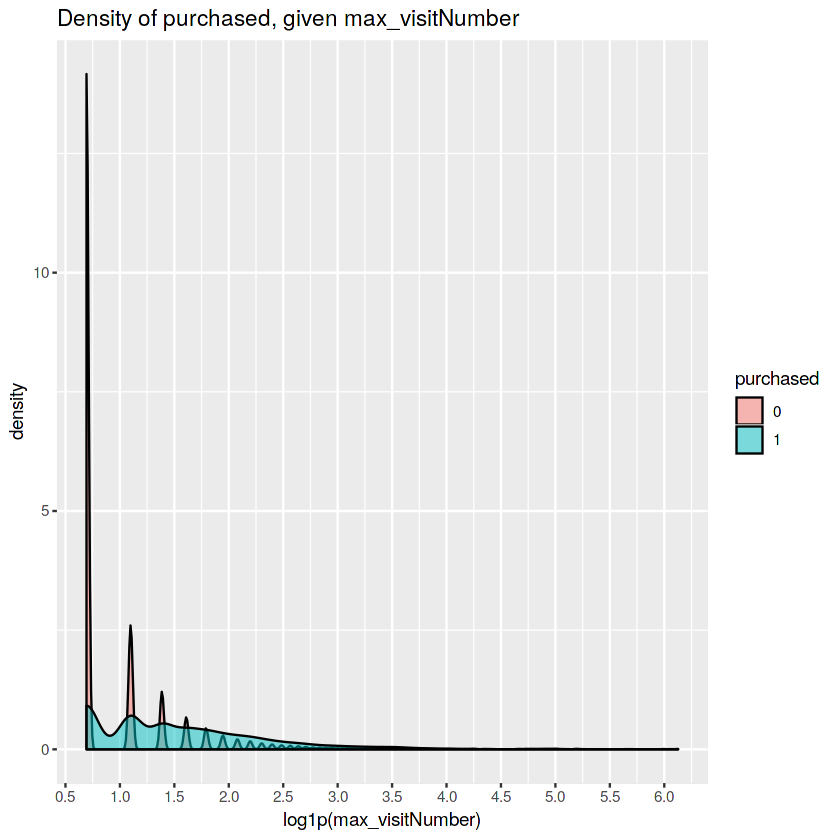

In [98]:
#max_visitNumber
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log1p(max_visitNumber), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given max_visitNumber") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

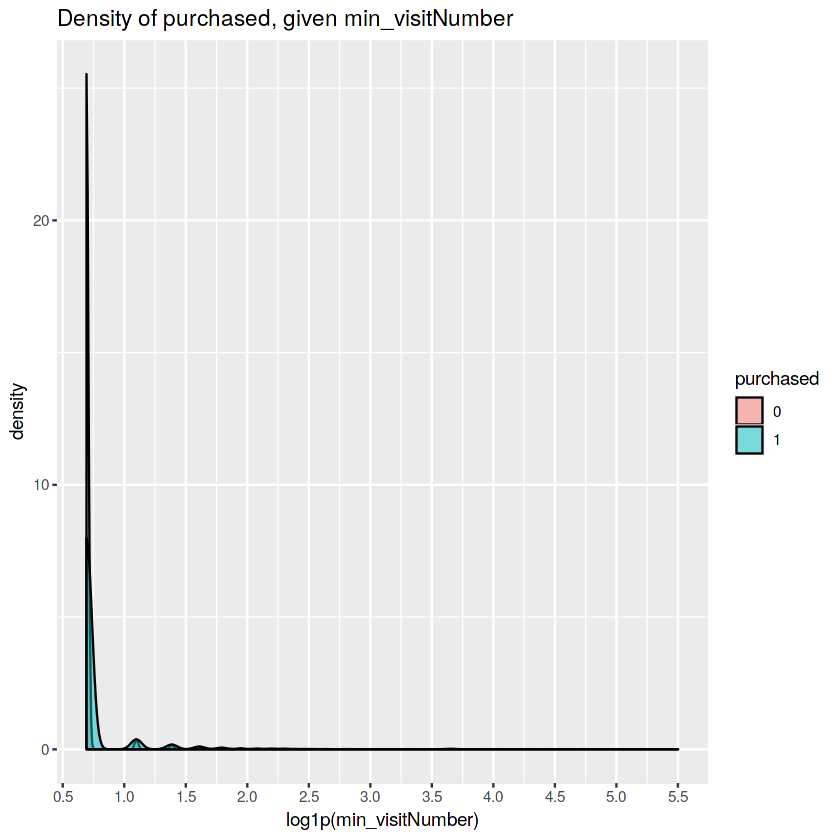

In [99]:
#min_visitNumber
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log1p(min_visitNumber), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given min_visitNumber") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

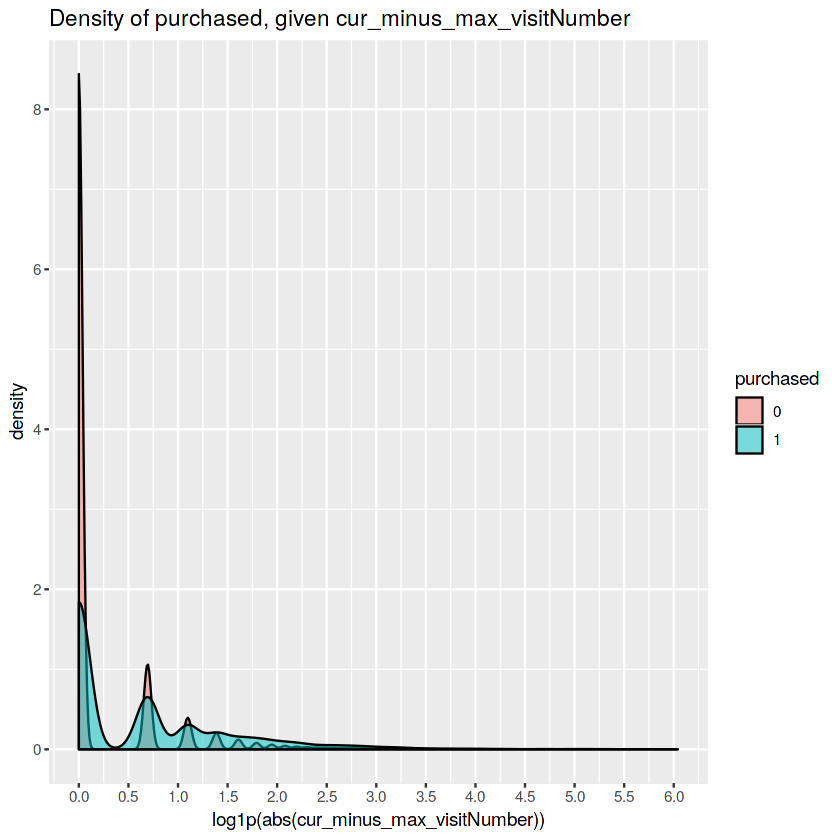

In [100]:
#max_visitNumber
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log1p(abs(cur_minus_max_visitNumber)), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given cur_minus_max_visitNumber") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

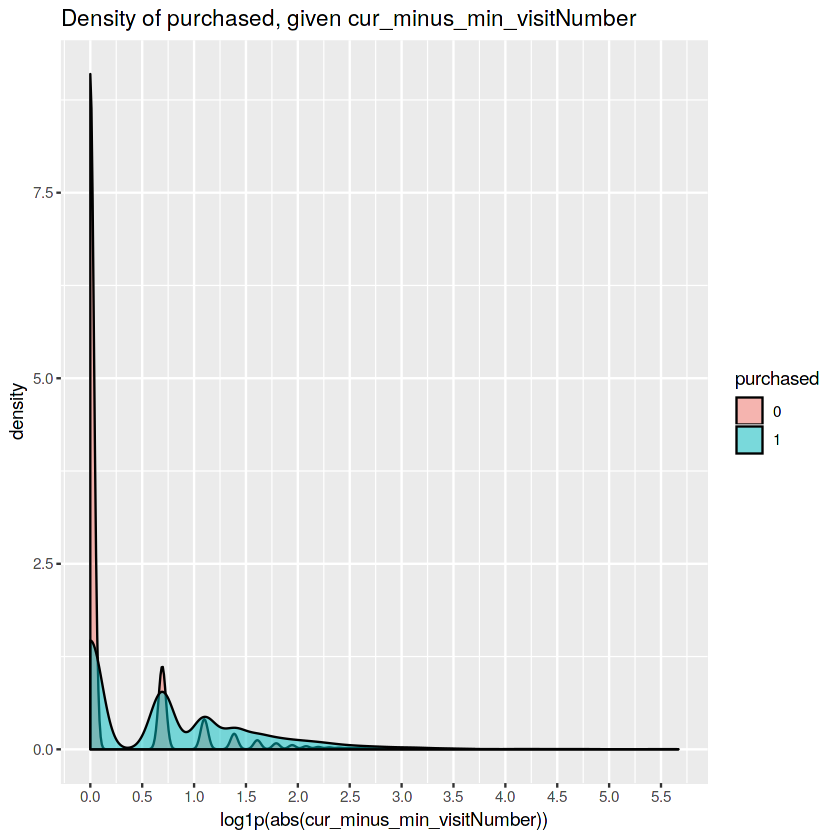

In [101]:
#max_visitNumber
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log1p(abs(cur_minus_min_visitNumber)), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given cur_minus_min_visitNumber") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

# Meh. Honestly, I don't even want to use visitNumber at this point. I think at the moment it's just too noisy/unreliable.

In [102]:
tr_te[totals.transactionRevenue!=-1,.('count'=length(purchased),'mean'=mean(purchased)),by=shift_visitNumber][order(shift_visitNumber)]

shift_visitNumber count  mean       
1  -127               1     0.00000000 
2  -112               1     0.00000000 
3   -82               1     0.00000000 
4   -78               1     0.00000000 
5   -57               1     0.00000000 
6   -42               1     0.00000000 
7   -39               1     0.00000000 
8   -31               1     0.00000000 
9   -27               1     0.00000000 
10  -23               2     0.00000000 
11  -22               1     0.00000000 
12  -21               2     0.50000000 
13  -20               1     0.00000000 
14  -19               1     0.00000000 
15  -16               4     0.00000000 
16  -15               2     0.50000000 
17  -13               6     0.00000000 
18  -12               5     0.00000000 
19  -11               3     0.00000000 
20  -10               2     0.00000000 
21   -9              11     0.09090909 
22   -8               6     0.00000000 
23   -7               9     0.00000000 
24   -6              15     0.00000000 
25   -5              16     0.06250000 
⋮  ⋮                 ⋮      ⋮          
30  0                  1396 0.032951289
31  1                183473 0.035285846
32  2                  2200 0.044090909
33  3                   988 0.058704453
34  4                   464 0.032327586
35  5                   230 0.047826087
36  6                   107 0.028037383
37  7                    60 0.050000000
38  8                    34 0.058823529
39  9                    26 0.000000000
40 10                    18 0.055555556
41 11                     9 0.000000000
42 12                     6 0.000000000
43 13                     3 0.000000000
44 14                     1 0.000000000
45 15                     2 0.000000000
46 16                     1 0.000000000
47 17                     2 0.000000000
48 18                     2 0.000000000
49 20                     3 0.000000000
50 22                     3 0.000000000
51 23                     1 0.000000000
52 33                     1 0.000000000
53 84                     1 0.000000000
54 NA                714167 0.006701514

# It seems that if you have a shift_visitNumber != 1, then you are more likely to make a purchase. But why are there shift_visitNumber < 1? Does this mean the ordering is wrong?

In [103]:
head(tr_te[fullVisitorId %in% unique(tr_te[shift_visitNumber==0]$fullVisitorId)],50)

channelGrouping date       fullVisitorId      
1  Direct          2016-11-28 0000677695778949032
2  Direct          2016-12-01 0000677695778949032
3  Referral        2017-02-01 0000677695778949032
4  Referral        2018-01-10 0000677695778949032
5  Referral        2018-02-06 0000677695778949032
6  Referral        2018-02-08 0000677695778949032
7  Direct          2017-07-04 0009646097795253665
8  Direct          2018-03-02 0009646097795253665
9  Direct          2018-03-05 0009646097795253665
10 Direct          2018-03-08 0009646097795253665
11 Direct          2016-08-13 0010861457198600835
12 Direct          2017-11-17 0010861457198600835
13 Organic Search  2016-08-21 0011338928267756760
14 Organic Search  2016-08-22 0011338928267756760
15 Organic Search  2017-07-06 0011906319625260366
16 Organic Search  2018-01-13 0011906319625260366
17 Referral        2016-12-31 0014884852016449602
18 Referral        2016-12-31 0014884852016449602
19 Referral        2017-01-01 0014884852016449602
20 Social          2016-10-29 0019502223724800226
21 Social          2017-07-26 0019502223724800226
22 Referral        2016-09-11 0019612470994343873
23 Organic Search  2017-02-06 0019612470994343873
24 Organic Search  2017-02-07 0019612470994343873
25 Organic Search  2017-02-07 0019612470994343873
26 Organic Search  2017-06-05 0019612470994343873
27 Organic Search  2017-06-06 0019612470994343873
28 Organic Search  2017-06-15 0019612470994343873
29 Affiliates      2018-01-07 0024548526285681218
30 Affiliates      2018-01-08 0024548526285681218
31 Affiliates      2018-01-09 0024548526285681218
32 Affiliates      2018-01-09 0024548526285681218
33 Organic Search  2017-03-16 002495070057943924 
34 Organic Search  2017-10-04 002495070057943924 
35 Organic Search  2017-12-28 0028094302211785880
36 Organic Search  2018-01-11 0028094302211785880
37 Organic Search  2018-01-11 0028094302211785880
38 Organic Search  2018-01-11 0028094302211785880
39 Organic Search  2018-01-12 0028094302211785880
40 Organic Search  2018-01-12 0028094302211785880
41 Paid Search     2017-05-19 0031542961723593073
42 Paid Search     2017-05-20 0031542961723593073
43 Referral        2016-11-04 0039798900163330977
44 Referral        2016-12-22 0039798900163330977
45 Referral        2017-01-24 0039798900163330977
46 Referral        2017-01-25 0039798900163330977
47 Referral        2017-02-02 0039798900163330977
48 Referral        2017-02-07 0039798900163330977
49 Referral        2017-02-07 0039798900163330977
50 Affiliates      2018-02-27 0044595854962267172
   sessionId                      visitId    visitNumber visitStartTime
1  0000677695778949032_1480346820 1480346820  2          1480346820    
2  0000677695778949032_1480643866 1480643866  3          1480643866    
3  0000677695778949032_1486011107 1486011107  4          1486011107    
4  0000677695778949032_1515646628 1515646628  4          1515646628    
5  0000677695778949032_1517969484 1517969484  5          1517969484    
6  0000677695778949032_1518145989 1518145989  6          1518145989    
7  0009646097795253665_1499166334 1499166334  1          1499166334    
8  0009646097795253665_1520048109 1520048109  1          1520048109    
9  0009646097795253665_1520305784 1520305784  2          1520305784    
10 0009646097795253665_1520566272 1520566272  3          1520566272    
11 0010861457198600835_1471092717 1471092717  1          1471092717    
12 0010861457198600835_1510908766 1510908766  1          1510908766    
13 0011338928267756760_1471848731 1471848731  1          1471848731    
14 0011338928267756760_1471848731 1471848731  1          1471849330    
15 0011906319625260366_1499347503 1499347503  1          1499347503    
16 0011906319625260366_1515852481 1515852481  1          1515852481    
17 0014884852016449602_1483249239 1483249239  1          1483249239    
18 0014884852016449602_1483257533 1483257533  2          1483257533    
19 0014884852016449602_1483257533 1483257533  2          1483257729    
20 0019502223

In [104]:
tr_te[fullVisitorId=='1325914909641958196'][,shift(totals.hits)]

[1]  NA 109   7

In [105]:
head(tr_te[shift_visitNumber==0 & date==shift(date)+1 & totals.transactionRevenue>0,.SD,by=fullVisitorId])

fullVisitorId       channelGrouping date       sessionId                     
1 0405996727678488611 Organic Search  2017-07-16 0405996727678488611_1500187709
2 0658019277799848735 Referral        2017-07-08 0658019277799848735_1499497039
3 0909158646354924303 Referral        2017-03-07 0909158646354924303_1488873448
4 1063109698143249629 Organic Search  2017-07-24 1063109698143249629_1500878442
5 1325914909641958196 Referral        2017-01-07 1325914909641958196_1483772850
6 1945823643105525576 Organic Search  2017-06-16 1945823643105525576_1497595973
  visitId    visitNumber visitStartTime device.browser device.deviceCategory
1 1500187709  1          1500188828     Chrome         desktop              
2 1499497039  2          1499497225     Chrome         desktop              
3 1488873448 13          1488873611     Chrome         desktop              
4 1500878442  2          1500879636     Firefox        desktop              
5 1483772850  1          1483776004     Chrome         desktop              
6 1497595973  2          1497596477     Safari         mobile               
  device.isMobile device.operatingSystem geoNetwork.city              
1 0               Macintosh              Los Angeles                  
2 0               Chrome OS              San Francisco                
3 0               Macintosh              Mountain View                
4 0               Macintosh              San Francisco                
5 0               Macintosh              not available in demo dataset
6 1               iOS                    Mountain View                
  geoNetwork.continent geoNetwork.country geoNetwork.metro                 
1 Americas             United States      Los Angeles CA                   
2 Americas             United States      San Francisco-Oakland-San Jose CA
3 Americas             United States      San Francisco-Oakland-San Jose CA
4 Americas             United States      San Francisco-Oakland-San Jose CA
5 Americas             United States      not available in demo dataset    
6 Americas             United States      San Francisco-Oakland-San Jose CA
  geoNetwork.networkDomain geoNetwork.region            
1 (not set)                California                   
2 comcast.net              California                   
3 comcast.net              California                   
4 com                      California                   
5 hawaiiantel.net          not available in demo dataset
6 (not set)                California                   
  geoNetwork.subContinent totals.bounces totals.hits totals.newVisits
1 Northern America        0              43          1               
2 Northern America        0               4          0               
3 Northern America        0               8          0               
4 Northern America        0              16          0               
5 Northern America        0               7          1               
6 Northern America        0              73          0               
  totals.pageviews totals.transactionRevenue trafficSource.adContent
1 37               21590000                                         
2  4               42620000                                         
3  8               61590000                                         
4 15               27490000                                         
5  7               48220000                                         
6 62               56640000                                         
  trafficSource.adwordsClickInfo.adNetworkType ⋯ trafficSource.campaign
1                                              ⋯ (not set)             
2                                              ⋯ (not set)             
3                                              ⋯ (not set)             
4                                              ⋯ (not set)             
5                                              ⋯ (not set)             
6                                              ⋯ (not set)            

In [106]:
tr_te[fullVisitorId=='0039798900163330977']

channelGrouping date       fullVisitorId       sessionId                     
1 Referral        2016-11-04 0039798900163330977 0039798900163330977_1478325779
2 Referral        2016-12-22 0039798900163330977 0039798900163330977_1482410730
3 Referral        2017-01-24 0039798900163330977 0039798900163330977_1485331011
4 Referral        2017-01-25 0039798900163330977 0039798900163330977_1485331011
5 Referral        2017-02-02 0039798900163330977 0039798900163330977_1486106289
6 Referral        2017-02-07 0039798900163330977 0039798900163330977_1486524909
7 Referral        2017-02-07 0039798900163330977 0039798900163330977_1486538000
  visitId    visitNumber visitStartTime device.browser device.deviceCategory
1 1478325779 1           1478325779     Chrome         desktop              
2 1482410730 3           1482410730     Chrome         desktop              
3 1485331011 4           1485331011     Chrome         desktop              
4 1485331011 4           1485331307     Chrome         desktop              
5 1486106289 5           1486106289     Chrome         desktop              
6 1486524909 6           1486524909     Chrome         desktop              
7 1486538000 7           1486538000     Chrome         desktop              
  device.isMobile device.operatingSystem geoNetwork.city geoNetwork.continent
1 0               Macintosh              (not set)       Asia                
2 0               Macintosh              (not set)       Asia                
3 0               Macintosh              (not set)       Asia                
4 0               Macintosh              (not set)       Asia                
5 0               Macintosh              (not set)       Asia                
6 0               Macintosh              (not set)       Asia                
7 0               Macintosh              (not set)       Asia                
  geoNetwork.country geoNetwork.metro geoNetwork.networkDomain
1 Singapore          (not set)        unknown.unknown         
2 Singapore          (not set)        unknown.unknown         
3 Singapore          (not set)        (not set)               
4 Singapore          (not set)        (not set)               
5 Singapore          (not set)        (not set)               
6 Singapore          (not set)        (not set)               
7 Singapore          (not set)        (not set)               
  geoNetwork.region geoNetwork.subContinent totals.bounces totals.hits
1 (not set)         Southeast Asia          0              12         
2 (not set)         Southeast Asia          0               8         
3 (not set)         Southeast Asia          0               5         
4 (not set)         Southeast Asia          0               5         
5 (not set)         Southeast Asia          0              80         
6 (not set)         Southeast Asia          0              76         
7 (not set)         Southeast Asia          0              82         
  totals.newVisits totals.pageviews totals.transactionRevenue
1 1                12               0                        
2 0                 8               0                        
3 0                 5               0                        
4 0                 3               0                        
5 0                54               0                        
6 0                54               0                        
7 0                57               0                        
  trafficSource.adContent trafficSource.adwordsClickInfo.adNetworkType ⋯
1                                                                      ⋯
2                                                                      ⋯
3                                                                      ⋯
4                                                                      ⋯
5                                                                      ⋯
6                                                                      ⋯
7                                          

In [107]:
head(tr_te[visitId==shift(visitId) & visitNumber==shift(visitNumber)], 10)

channelGrouping date       fullVisitorId      
1  Organic Search  2016-08-22 0011338928267756760
2  Referral        2017-01-01 0014884852016449602
3  Organic Search  2017-06-06 0019612470994343873
4  Affiliates      2018-01-08 0024548526285681218
5  Organic Search  2018-01-12 0028094302211785880
6  Paid Search     2017-05-20 0031542961723593073
7  Referral        2017-01-25 0039798900163330977
8  Affiliates      2018-02-28 0044595854962267172
9  Direct          2016-12-05 0047064119019485310
10 Affiliates      2016-08-31 0049220146968431383
   sessionId                      visitId    visitNumber visitStartTime
1  0011338928267756760_1471848731 1471848731  1          1471849330    
2  0014884852016449602_1483257533 1483257533  2          1483257729    
3  0019612470994343873_1496731675 1496731675 24          1496732439    
4  0024548526285681218_1515396552 1515396552  1          1515398536    
5  0028094302211785880_1515743688 1515743688  4          1515744508    
6  0031542961723593073_1495261490 1495261490  1          1495264358    
7  0039798900163330977_1485331011 1485331011  4          1485331307    
8  0044595854962267172_1519804267 1519804267  1          1519805991    
9  0047064119019485310_1480924286 1480924286  1          1480925333    
10 0049220146968431383_1472626229 1472626229  1          1472626810    
   device.browser device.deviceCategory device.isMobile device.operatingSystem
1  Chrome         desktop               0               Windows               
2  Chrome         desktop               0               Macintosh             
3  Chrome         desktop               0               Macintosh             
4  Safari         desktop               0               Macintosh             
5  Chrome         desktop               0               Macintosh             
6  Chrome         tablet                1               iOS                   
7  Chrome         desktop               0               Macintosh             
8  Chrome         desktop               0               Windows               
9  Chrome         desktop               0               Windows               
10 Firefox        desktop               0               Windows               
   geoNetwork.city               geoNetwork.continent geoNetwork.country
1  not available in demo dataset Asia                 China             
2  Los Angeles                   Americas             United States     
3  Mountain View                 Americas             United States     
4  not available in demo dataset Europe               Spain             
5  not available in demo dataset Oceania              Australia         
6  not available in demo dataset Americas             United States     
7  (not set)                     Asia                 Singapore         
8  (not set)                     Asia                 Taiwan            
9  not available in demo dataset Asia                 South Korea       
10 not available in demo dataset Europe               Lithuania         
   geoNetwork.metro                  geoNetwork.networkDomain
1  not available in demo dataset     unknown.unknown         
2  Los Angeles CA                    (not set)               
3  San Francisco-Oakland-San Jose CA comcast.net             
4  not available in demo dataset     rima-tde.net            
5  not available in demo dataset     telstra.net             
6  not available in demo dataset     comcast.net             
7  (not set)                         (not set)               
8  (not set)                         fetnet.net              
9  not available in demo dataset     postech.ac.kr           
10 not available in demo dataset     zebra.lt                
   geoNetwork.region             geoNetwork.subContinent totals.bounces
1  not available in demo dataset Eastern Asia            0             
2  California                    Northern America        0             
3  California                    Northern America        0             
4  not available in

### So many ideas I have. For example, condense each row into "sessions". A session is a collection of rows such that each subsequent row is at most 2 days apart. I have this idea because a lot of people will visit the website multiple days in a row. We can sum the stuff over the session.

# Not sure what's going on here. Usually the visitNumber is repeated if either it's been a long time since their last visit (like a little less than a year), or if they visit the website on tomorrow.

# Ok, I know now why at least the people who have repeated VisitNumbers on tomorrow. It's because they are visiting near, I guess, the time that Google updates their query, which is at 8 AM UTC. So if they visit at 7:59 AM UTC and roll over to 8 AM UTC, the date column is updated to be tomorrow, but since they're still on the same visit, their visitNumber is not updated. Strangely, it's not always 8 AM UTC. Sometimes it's at 7 AM UTC. It could be other times too, I haven't checked. Maybe it's based on midnight of their local time.
### I don't think it is. Seems it's usually 7 AM UTC or 8 AM UTC. My hypothesis? This is either 24:00 or 01:00 in PST (California where Google is headquartered). I think it resets at either 7 or 8 AM UTC depending on if they are in daylight savings or not.

# Ok, And I also know why it skips like a little less than a year. It's because the visitNumber in the test set resets if you are found in the train set. Therefore I need to update the visit Numbers in the test set to be visitNumber + max(visitNumber_in_trainset), and should also update max(visitNumber) too.

# Can also have a boolean like IS_LAST_VISIT or something, maybe the difference between current visit and LAST_VISIT

### Question: Is it true that in your test set, you will always reset back to visitNumber=1?

### ANswer; No. Not always

In [108]:
tmp <- tr_te[,.('total_num_visits'=length(visitNumber)),by=fullVisitorId]
tr_te <- merge(tr_te,tmp,on='fullVisitorId',all.x=TRUE)

In [109]:
tr_te$is_last_visit <- ifelse(tr_te$visitStartTime==tr_te$max_visitStartTime,1,0)
tr_te$only_visited_once <- ifelse(tr_te$total_num_visits==1,1,0)
tr_te$last_visit_multiple_times <- ifelse(tr_te$is_last_visit==1 & tr_te$only_visited_once==0,1,0)

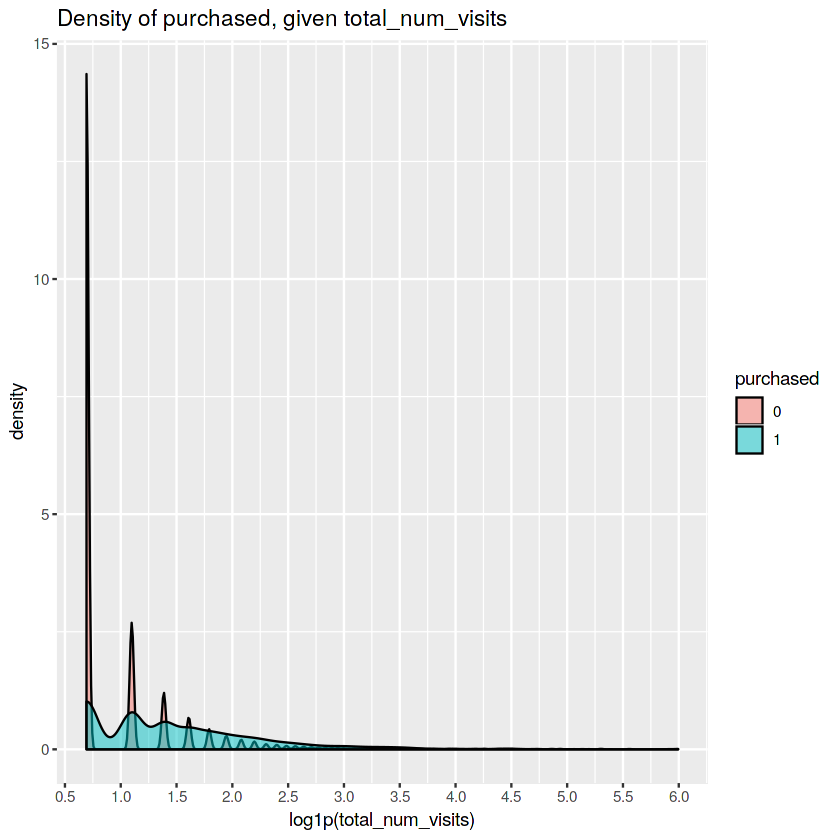

In [110]:
#total_num_visits
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = log1p(total_num_visits), fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given total_num_visits") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

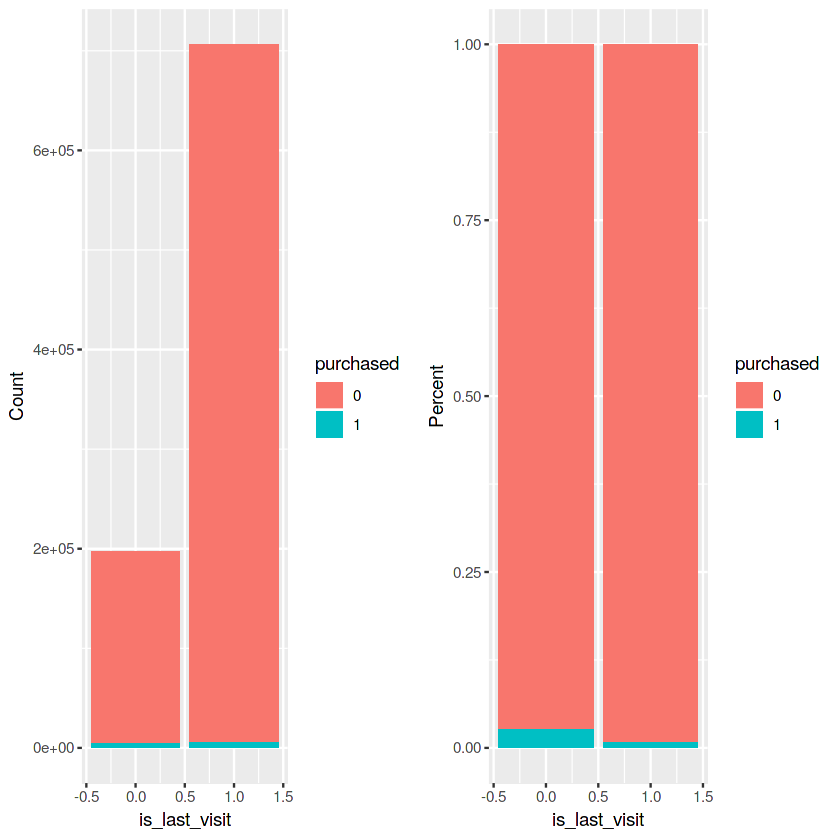

In [111]:
#is_last_visit
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=is_last_visit , fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'is_last_visit', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=is_last_visit , fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'is_last_visit', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

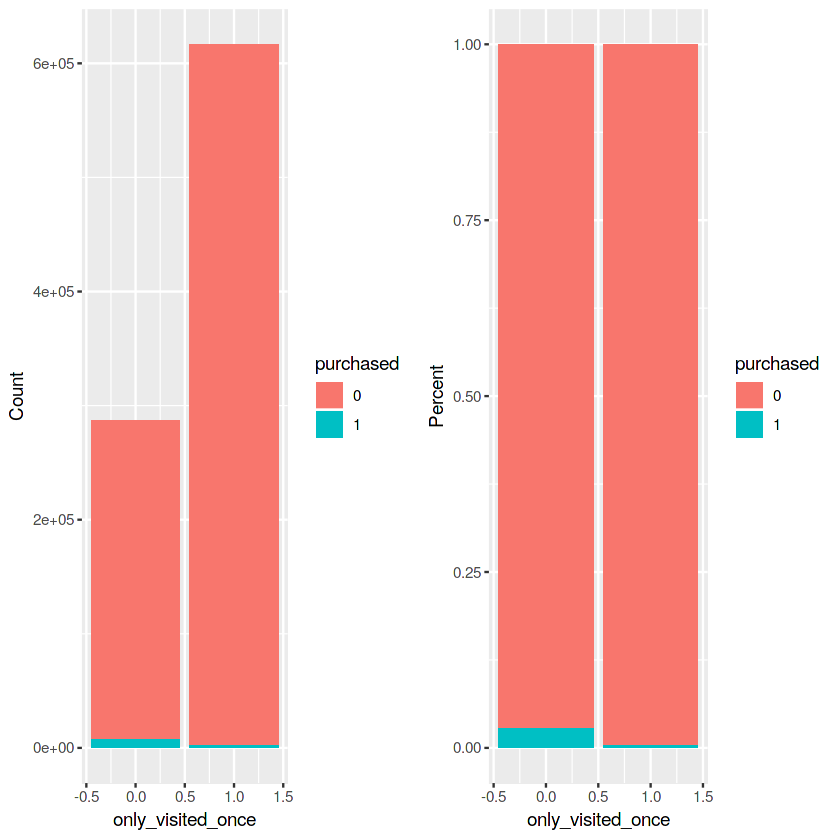

In [112]:
#only_visited_once
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=only_visited_once, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'only_visited_once', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=only_visited_once, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'only_visited_once', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

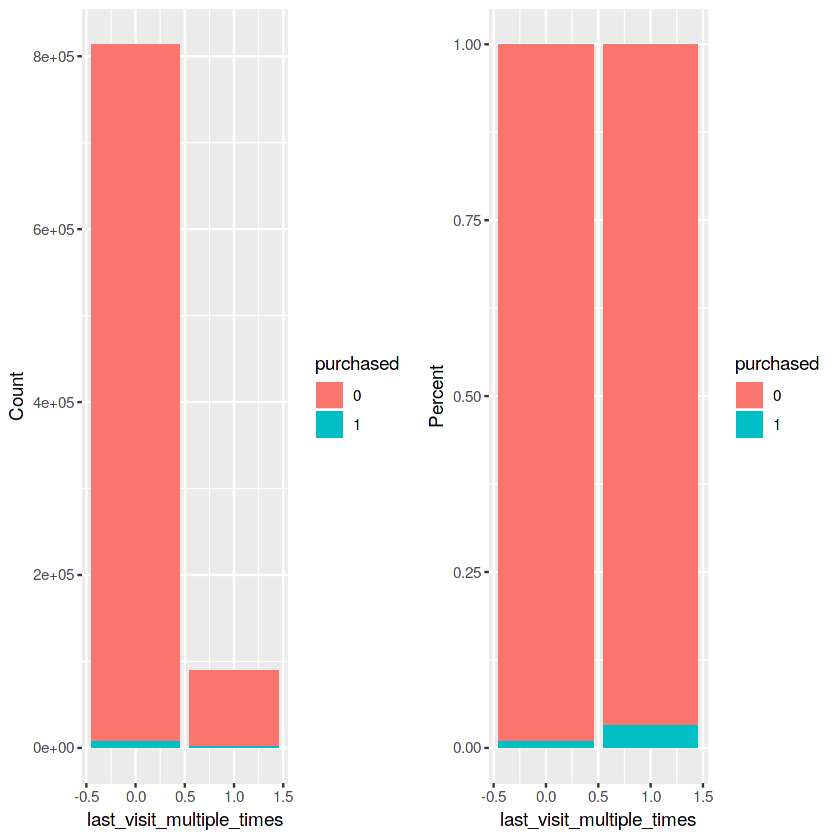

In [113]:
#last_visit_multiple_times
countplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=last_visit_multiple_times, fill=purchased)) + geom_bar(stat='count',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'last_visit_multiple_times', y= 'Count')
percentplot <- ggplot(tr_te[totals.transactionRevenue!=-1], aes(x=last_visit_multiple_times, fill=purchased)) + geom_bar(stat='count',position='fill',aes(fill=factor(purchased))) + theme_grey() + labs(x = 'last_visit_multiple_times', y= 'Percent')
grid.arrange(countplot, percentplot, nrow=1)

In [114]:
head(tr_te[(fullVisitorId %in% unique(tr_te[i_am_train==0]$fullVisitorId)) & (fullVisitorId %in% unique(tr_te[i_am_train==1]$fullVisitorId))],50)

fullVisitorId       channelGrouping date      
1  0000436683523507380 Referral        2017-07-19
2  0000436683523507380 Referral        2017-07-25
3  0000436683523507380 Referral        2017-08-26
4  0000677695778949032 Direct          2016-11-28
5  0000677695778949032 Direct          2016-12-01
6  0000677695778949032 Referral        2017-02-01
7  0000677695778949032 Referral        2018-01-10
8  0000677695778949032 Referral        2018-02-06
9  0000677695778949032 Referral        2018-02-08
10 0001059349366430257 Organic Search  2017-04-10
11 0001059349366430257 Organic Search  2017-04-10
12 0001059349366430257 Organic Search  2017-04-10
13 0001059349366430257 Organic Search  2017-06-20
14 0001059349366430257 Organic Search  2018-02-03
15 0001399220722808057 Organic Search  2017-07-14
16 0001399220722808057 Paid Search     2017-09-15
17 0001527863526384268 Referral        2017-04-18
18 0001527863526384268 Referral        2017-06-08
19 0001527863526384268 Referral        2017-06-30
20 0001527863526384268 Referral        2017-08-09
21 0002457163364254438 Referral        2017-07-31
22 0002457163364254438 Referral        2017-08-02
23 0002457163364254438 Referral        2017-08-04
24 0005094333993051683 Direct          2017-07-27
25 0005094333993051683 Direct          2017-07-30
26 0005094333993051683 Direct          2017-08-07
27 0005161507453446864 Direct          2017-07-05
28 0005161507453446864 Direct          2017-08-11
29 0005161507453446864 Direct          2017-08-20
30 0005218289010224492 Organic Search  2017-07-23
31 0005218289010224492 Organic Search  2017-07-26
32 0005218289010224492 Organic Search  2017-08-04
33 0006382859119186989 Organic Search  2017-07-08
34 0006382859119186989 Organic Search  2017-08-07
35 0007064334010477831 Direct          2017-05-18
36 0007064334010477831 Direct          2017-05-18
37 0007064334010477831 Direct          2018-04-25
38 0009646097795253665 Direct          2017-07-04
39 0009646097795253665 Direct          2018-03-02
40 0009646097795253665 Direct          2018-03-05
41 0009646097795253665 Direct          2018-03-08
42 0010861457198600835 Direct          2016-08-13
43 0010861457198600835 Direct          2017-11-17
44 0011289353990111432 Direct          2017-06-16
45 0011289353990111432 Direct          2017-06-17
46 0011289353990111432 Direct          2017-08-04
47 0011906319625260366 Organic Search  2017-07-06
48 0011906319625260366 Organic Search  2018-01-13
49 0011908897593458460 Paid Search     2017-06-05
50 0011908897593458460 Paid Search     2017-06-13
   sessionId                      visitId    visitNumber visitStartTime
1  0000436683523507380_1500504900 1500504900 1           1500504900    
2  0000436683523507380_1500989127 1500989127 2           1500989127    
3  0000436683523507380_1503768992 1503768992 3           1503768992    
4  0000677695778949032_1480346820 1480346820 2           1480346820    
5  0000677695778949032_1480643866 1480643866 3           1480643866    
6  0000677695778949032_1486011107 1486011107 4           1486011107    
7  0000677695778949032_1515646628 1515646628 4           1515646628    
8  0000677695778949032_1517969484 1517969484 5           1517969484    
9  0000677695778949032_1518145989 1518145989 6           1518145989    
10 0001059349366430257_1491830391 1491830391 1           1491830391    
11 0001059349366430257_1491834931 1491834931 2           1491834931    
12 0001059349366430257_1491841588 1491841588 3           1491841588    
13 0001059349366430257_1497962281 1497962281 4           1497962281    
14 0001059349366430257_1517723377 1517723377 1           1517723377    
15 0001399220722808057_1500076255 1500076255 1           1500076255    
16 0001399220722808057_1505529319 1505529319 2           1505529319    
17 0001527863526384268_1492526719 1492526719 2           1492526719    
18 0001527863526384268_1496947277 1496947277 3           1496947277    
19 0001527863526384268_1498836434 1498836434 4           1498836434    
20 0001527863

# Answer: No, it is not always true. Sometimes it's true, other times it's not. I don't know what causes a reset on the visit number, but making a boolean for this will probably help. Boolean(min(test_visitNumber) <= max(train_visitNumber))

In [115]:
options(repr.matrix.max.rows=250) #Show 250 rows
tail(tr_te[fullVisitorId %in% unique(tr_te[shift_visitNumber< -80]$fullVisitorId)],250)

fullVisitorId       channelGrouping date      
1   6254908847172458133 Organic Search  2016-08-30
2   6254908847172458133 Organic Search  2016-08-31
3   6254908847172458133 Organic Search  2016-08-31
4   6254908847172458133 Organic Search  2016-08-31
5   6254908847172458133 Organic Search  2016-09-01
6   6254908847172458133 Organic Search  2016-09-01
7   6254908847172458133 Organic Search  2016-09-02
8   6254908847172458133 Organic Search  2016-09-02
9   6254908847172458133 Organic Search  2016-09-06
10  6254908847172458133 Organic Search  2016-09-06
11  6254908847172458133 Organic Search  2016-09-07
12  6254908847172458133 Organic Search  2016-09-07
13  6254908847172458133 Organic Search  2016-09-07
14  6254908847172458133 Organic Search  2016-09-09
15  6254908847172458133 Organic Search  2016-09-12
16  6254908847172458133 Organic Search  2016-09-12
17  6254908847172458133 Organic Search  2016-09-12
18  6254908847172458133 Organic Search  2016-09-12
19  6254908847172458133 Organic Search  2016-09-12
20  6254908847172458133 Organic Search  2016-09-13
21  6254908847172458133 Organic Search  2016-09-13
22  6254908847172458133 Organic Search  2016-09-13
23  6254908847172458133 Organic Search  2016-09-13
24  6254908847172458133 Organic Search  2016-09-13
25  6254908847172458133 Organic Search  2016-09-14
26  6254908847172458133 Organic Search  2016-09-16
27  6254908847172458133 Organic Search  2016-09-16
28  6254908847172458133 Organic Search  2016-09-19
29  6254908847172458133 Organic Search  2016-09-21
30  6254908847172458133 Organic Search  2016-09-21
31  6254908847172458133 Organic Search  2016-09-22
32  6254908847172458133 Organic Search  2016-09-23
33  6254908847172458133 Organic Search  2016-09-26
34  6254908847172458133 Organic Search  2016-09-26
35  6254908847172458133 Organic Search  2016-09-27
36  6254908847172458133 Organic Search  2016-09-27
37  6254908847172458133 Organic Search  2016-09-28
38  6254908847172458133 Organic Search  2016-09-28
39  6254908847172458133 Organic Search  2016-09-28
40  6254908847172458133 Organic Search  2016-10-03
41  6254908847172458133 Organic Search  2016-10-04
42  6254908847172458133 Organic Search  2016-10-10
43  6254908847172458133 Organic Search  2016-10-11
44  6254908847172458133 Organic Search  2016-10-11
45  6254908847172458133 Organic Search  2016-10-12
46  6254908847172458133 Organic Search  2016-10-12
47  6254908847172458133 Organic Search  2016-10-12
48  6254908847172458133 Organic Search  2016-10-13
49  6254908847172458133 Organic Search  2016-10-13
50  6254908847172458133 Organic Search  2016-10-13
51  6254908847172458133 Organic Search  2016-10-14
52  6254908847172458133 Organic Search  2016-10-14
53  6254908847172458133 Organic Search  2016-10-14
54  6254908847172458133 Organic Search  2016-10-14
55  6254908847172458133 Organic Search  2016-10-17
56  6254908847172458133 Organic Search  2016-10-17
57  6254908847172458133 Organic Search  2016-10-17
58  6254908847172458133 Organic Search  2016-10-18
59  6254908847172458133 Organic Search  2016-10-18
60  6254908847172458133 Organic Search  2016-10-19
61  6254908847172458133 Organic Search  2016-10-19
62  6254908847172458133 Organic Search  2016-10-20
63  6254908847172458133 Organic Search  2016-10-20
64  6254908847172458133 Organic Search  2016-10-21
65  6254908847172458133 Organic Search  2016-10-21
66  6254908847172458133 Organic Search  2016-10-21
67  6254908847172458133 Organic Search  2016-10-26
68  6254908847172458133 Organic Search  2016-10-27
69  6254908847172458133 Organic Search  2016-11-01
70  6254908847172458133 Organic Search  2016-11-01
71  6254908847172458133 Organic Search  2016-11-01
72  6254908847172458133 Organic Search  2016-11-02
73  6254908847172458133 Organic Search  2016-11-02
74  6254908847172458133 Organic Search  2016-11-03
75  6254908847172458133 Organic Search  2016-11-03
76  6254908847172458133 Organic Search  2016-11-03
77  6254908847172458133 Organic Search  2016-11-07
78  6254908847172458133 Or

# visitNumber is really screwed up. Like, big time. Just look at some of the history of these guys.

In [116]:
maxtrainvisitNumber <- tr_te[i_am_train==1, .('maxtrainvisitNumber'=max(visitNumber)),by=fullVisitorId]
mintestvisitNumber <- tr_te[i_am_train==0, .('mintestvisitNumber'=min(visitNumber)), by=fullVisitorId]

In [117]:
tr_te <- merge(tr_te, maxtrainvisitNumber, by='fullVisitorId',all.x=TRUE)
tr_te <- merge(tr_te, mintestvisitNumber, by='fullVisitorId', all.x=TRUE)

In [118]:
head(tr_te[mintestvisitNumber <= maxtrainvisitNumber], 250)

fullVisitorId       channelGrouping date      
1   0000677695778949032 Direct          2016-11-28
2   0000677695778949032 Direct          2016-12-01
3   0000677695778949032 Referral        2017-02-01
4   0000677695778949032 Referral        2018-01-10
5   0000677695778949032 Referral        2018-02-06
6   0000677695778949032 Referral        2018-02-08
7   0001059349366430257 Organic Search  2017-04-10
8   0001059349366430257 Organic Search  2017-04-10
9   0001059349366430257 Organic Search  2017-04-10
10  0001059349366430257 Organic Search  2017-06-20
11  0001059349366430257 Organic Search  2018-02-03
12  0007064334010477831 Direct          2017-05-18
13  0007064334010477831 Direct          2017-05-18
14  0007064334010477831 Direct          2018-04-25
15  0009646097795253665 Direct          2017-07-04
16  0009646097795253665 Direct          2018-03-02
17  0009646097795253665 Direct          2018-03-05
18  0009646097795253665 Direct          2018-03-08
19  0010861457198600835 Direct          2016-08-13
20  0010861457198600835 Direct          2017-11-17
21  0011906319625260366 Organic Search  2017-07-06
22  0011906319625260366 Organic Search  2018-01-13
23  0014924852167142664 Referral        2016-10-05
24  0014924852167142664 Referral        2016-10-08
25  0014924852167142664 Referral        2018-04-19
26  0018822472571637380 Referral        2016-12-09
27  0018822472571637380 Organic Search  2017-09-26
28  0018822472571637380 Organic Search  2017-09-27
29  0018822472571637380 Organic Search  2017-09-28
30  0018822472571637380 Organic Search  2017-09-28
31  0020154188200921440 Organic Search  2017-01-17
32  0020154188200921440 Organic Search  2017-02-28
33  0020154188200921440 Direct          2017-10-06
34  002266727249400309  Organic Search  2017-04-04
35  002266727249400309  Organic Search  2017-04-06
36  002266727249400309  Organic Search  2017-10-31
37  002266727249400309  Organic Search  2017-11-13
38  002495070057943924  Organic Search  2017-03-16
39  002495070057943924  Organic Search  2017-10-04
40  0025693546458698359 Organic Search  2017-01-30
41  0025693546458698359 Organic Search  2017-02-08
42  0025693546458698359 Organic Search  2017-05-10
43  0025693546458698359 Organic Search  2017-05-14
44  0025693546458698359 Organic Search  2017-07-02
45  0025693546458698359 Organic Search  2018-02-27
46  0025693546458698359 Organic Search  2018-04-26
47  0026329820781202527 Referral        2017-06-14
48  0026329820781202527 Referral        2017-06-29
49  0026329820781202527 Direct          2018-02-13
50  0038365018399786990 Organic Search  2017-06-10
51  0038365018399786990 Organic Search  2018-01-29
52  0039896139559220528 Organic Search  2016-09-11
53  0039896139559220528 Organic Search  2016-09-11
54  0039896139559220528 Organic Search  2018-01-16
55  0042244433222040221 Organic Search  2017-02-26
56  0042244433222040221 Organic Search  2017-02-28
57  0042244433222040221 Direct          2017-10-17
58  0049507659430304750 Direct          2016-12-12
59  0049507659430304750 Social          2017-08-14
60  0049869939943285880 Organic Search  2017-04-07
61  0049869939943285880 Direct          2017-12-06
62  0055471998278433199 Direct          2016-11-24
63  0055471998278433199 Referral        2017-11-07
64  0061362139355340995 Organic Search  2017-02-08
65  0061362139355340995 Organic Search  2017-05-11
66  0061362139355340995 Organic Search  2018-04-13
67  0065685017282287514 Referral        2016-08-05
68  0065685017282287514 Referral        2016-08-07
69  0065685017282287514 Referral        2016-08-10
70  0065685017282287514 Referral        2016-08-10
71  0065685017282287514 Referral        2016-08-11
72  0065685017282287514 Referral        2016-11-25
73  0065685017282287514 Referral        2017-04-08
74  0065685017282287514 Referral        2017-11-12
75  0070655829283304964 Organic Search  2016-11-14
76  0070655829283304964 Organic Search  2018-04-24
77  0078928024052338968 Direct          2017-01-06
78  0078928024052338968 Di

In [119]:
#tr_te[i_am_train==0]$visitNumber <- tr_te[i_am_train==0]$maxtrainvisitNumber - tr_te[i_am_train==0]$mintrainvisitNumber + 1

# This is so noisy anyway. Might need to do some denoisnig technique. Or just remap visitNumber based on visitStartTime.

In [120]:
#device.browser, device.deviceCategory, device.operatingSystem, device.isMobile
print(sort(setdiff(tr_te[i_am_train==1]$device.browser,tr_te[i_am_train==0]$device.browser)))
print(sort(setdiff(tr_te[i_am_train==0]$device.browser,tr_te[i_am_train==1]$device.browser)))

 [1] "[Use default User-agent string] LIVRENPOCHE"
 [2] "0"                                          
 [3] "ADM"                                        
 [4] "Android Runtime"                            
 [5] "Changa 99695759"                            
 [6] "DASH_JR_3G"                                 
 [7] "DoCoMo"                                     
 [8] "Hisense M20-M_LTE"                          
 [9] "HTC802t_TD"                                 
[10] "IE with Chrome Frame"                       
[11] "LYF_LS_4002_11"                             
[12] "LYF_LS_4002_12"                             
[13] "M5"                                         
[14] "Nichrome"                                   
[15] "NokiaE52-1"                                 
[16] "Reddit"                                     
[17] "subjectAgent: NoticiasBoom"                 
[18] "TCL P500M"                                  
[19] "ThumbSniper"                                
[20] "User Agent"              

In [121]:
options(repr.matrix.max.rows=250) #Show 250 rows
tr_te[,.('count'=length(sessionId),'mean_purchased'=mean(purchased),'mean_i_am_train'=mean(i_am_train)),by=c('device.browser','device.deviceCategory','device.operatingSystem', 'device.isMobile')][order(device.browser)]

device.browser                                       device.deviceCategory
1   (not set)                                            mobile               
2   (not set)                                            desktop              
3   +Simple Browser                                      desktop              
4   0                                                    desktop              
5   ;__CT_JOB_ID__:0a075729-93a5-43d0-9638-4cbd41d5f5a5; desktop              
6   ;__CT_JOB_ID__:0b39e7ca-1431-42e3-ba1f-9d8951a65840; desktop              
7   ;__CT_JOB_ID__:2547db0b-ec43-452a-a0d4-ff42b7dc7907; desktop              
8   ;__CT_JOB_ID__:2e0eca60-83ab-482d-bb81-343d113254fb; desktop              
9   ;__CT_JOB_ID__:4333777f-bb0c-4a18-935e-df5658dbce2d; desktop              
10  ;__CT_JOB_ID__:58e2ecba-7666-4a10-b498-8216457ce472; desktop              
11  ;__CT_JOB_ID__:65da7e5f-0f05-4b5d-8d31-1f4d470a2b82; desktop              
12  ;__CT_JOB_ID__:6e9dcf2f-f58f-4938-91e3-77e00868177b; desktop              
13  ;__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59; desktop              
14  ;__CT_JOB_ID__:7e575295-571e-4e82-9254-7f2c8bbb9183; desktop              
15  ;__CT_JOB_ID__:85da5736-a78e-45a9-837e-f5a53e5cd725; desktop              
16  ;__CT_JOB_ID__:89e59554-ad41-4e94-957b-f12bd012530c; desktop              
17  ;__CT_JOB_ID__:97909e28-4228-4b55-8ad5-cc791f2b583c; desktop              
18  ;__CT_JOB_ID__:a24a8978-e5e8-4dc9-af66-c4ed89ea25d7; desktop              
19  ;__CT_JOB_ID__:a4f837b8-8d78-4c42-ba9a-d870cf1a4a7e; desktop              
20  ;__CT_JOB_ID__:a7ed0808-e70c-4b19-b1a3-1018bbb7dc7f; desktop              
21  ;__CT_JOB_ID__:a80e8e16-6e98-455b-885a-a4dd40f3d344; desktop              
22  ;__CT_JOB_ID__:d14534ff-e2fc-4692-92aa-e34508f1c418; desktop              
23  ;__CT_JOB_ID__:dd6177aa-1baa-4007-9b38-b7cab4f7611c; desktop              
24  ;__CT_JOB_ID__:fe02e46f-b6ae-41f1-8563-3b40bbb623a9; desktop              
25  ADM                                                  desktop              
26  Amazon Silk                                          tablet               
27  Amazon Silk                                          mobile               
28  Amazon.com                                           mobile               
29  Android Browser                                      mobile               
30  Android Browser                                      tablet               
31  Android Browser                                      desktop              
32  Android Runtime                                      mobile               
33  Android Webview                                      mobile               
34  Android Webview                                      tablet               
35  Android Webview                                      desktop              
36  Android Webview                                      desktop              
37  Apple-iPhone7C2                                      desktop              
38  Autn-WKOOP                                           desktop              
39  BlackBerry                                           mobile               
40  BlackBerry                                           tablet               
41  Browser                                              desktop              
42  CSM Click                                            desktop              
43  Changa 99695759                                      desktop              
44  Chrome                                               desktop              
45  Chrome                                               desktop              
46  Chrome                                               desktop              
47  Chrome                                               mobile               
48  Chrome                                               desktop              
49  Chrome                                               mobile               
50  Chrome                                            

In [122]:
#More information found here https://developers.whatismybrowser.com/useragents/parse/#parse-useragent

tr_te[substring(device.browser,1,14)==';__CT_JOB_ID__']$device.browser <- 'CT_JOB_ID' #Are these all the same person? They have similar visitStartTime's
tr_te[nchar(device.browser)==26 & device.browser!='subjectAgent: NoticiasBoom']$device.browser <- 'shuffled_alphabet' #Are these all the same person? This might be Tor browser

#Android Download Manager
tr_te[device.browser=='ADM']$device.deviceCategory <- "mobile"
tr_te[device.browser=='ADM']$device.operatingSystem <- 'Android'
tr_te[device.browser=='ADM']$device.isMobile <- 1
tr_te[device.browser=='ADM']$device.browser <- 'Android Browser'

#Amazon Kindles
tr_te[device.browser=='Amazon.com']$device.browser <- 'Amazon Silk'
#tr_te[device.browser=='Amazon Silk']$device.operatingSystem <- 'Amazon Kindle OS'

#Android Runtime is some error-bytecode mystery.
tr_te[device.browser=='Android Runtime']$device.browser <- 'Android Browser'

#Autn-WKOOP is an internet web crawler, aka spider, that just crawls information. It is called IDOL Web Connector
#Definitely will not make a purchase
#More information here https://www.microfocus.com/documentation/idol/IDOL/Connectors/Web/11.0/Guides/pdf/English/WebConnector_11.0_admin_en.pdf
tr_te[device.browser=='Autn-WKOOP']$device.browser <- 'nonhuman'

#CSM Click is a software that can push out updates to videogames
#Definitely will not make a purchase
tr_te[device.browser=='CSM Click']$device.browser <- 'nonhuman'

#DASH_JR_3G is an offbrand phone browser
tr_te[device.browser=='DASH_JR_3G']$device.browser <- 'phone_browser'

#DDG-Android-3.1.1 is DuckDuckGo
tr_te[device.browser=='DDG-Android-3.1.1']$device.browser <- 'DuckDuckGo Browser'

#HTC802t_TD is a webkit android browser on HTC phone
#For more detail see http://thadafinser.github.io/UserAgentParserComparison/v4/user-agent-detail/8c/12/8c12a8a4-361b-4b0b-bcac-ae93763e71af.html
tr_te[device.browser=='HTC802t_TD']$device.browser <- 'phone_browser'

#Hisense M20-M_LTE is an offbrand phone browser
tr_te[device.browser=='Hisense M20-M_LTE']$device.browser <- 'phone_browser'

#IE with Chrome Frame is internet explorer with an addon
tr_te[device.browser=='IE with Chrome Frame']$device.browser <- 'Internet Explorer'

#KINGSUN-F4 is an offbrand phone browser
tr_te[device.browser=='KINGSUN-F4']$device.browser <- 'phone_browser'

#LYF_LS_4002 is the LYF Flame 5 Indian phone browser
tr_te[device.browser=='LYF_LS_4002_11']$device.browser <- 'phone_browser'
tr_te[device.browser=='LYF_LS_4002_12']$device.browser <- 'phone_browser'

#M5 is possibly Huawei M5, or it could be Maxathon browser.
tr_te[device.browser=='M5']$device.browser <- 'phone_browser'

#MQQBrowser is a browser they use inside of WeChat, a Chinese texting app
tr_te[device.browser=='MQQBrowser']$device.operatingSystem <- 'Android'

#MRCHROME is some sort of bot.
tr_te[device.browser=='MRCHROME']$device.browser <- 'nonhuman'

#Nokia browsers
tr_te[device.browser=='NokiaC7-00']$device.browser <- 'phone_browser'
tr_te[device.browser=='NokiaE52-1']$device.browser <- 'phone_browser'

#Samsung browser
tr_te[device.browser=='SAMSUNG-SM-B355E Opera']$device.browser <- 'phone_browser'

#TCL phone browser
tr_te[device.browser=='TCL P500M']$device.browser <- 'phone_browser'

#Thumbsniper is a web crawler bot
tr_te[device.browser=='ThumbSniper']$device.browser <- 'nonhuman'

#Rare browsers
#Changa 99695759 is an absolute mystery.
tr_te[device.browser=='Changa 99695759']$device.browser <- 'rare_browser'
tr_te[device.browser=="[Use default User-agent string] LIVRENPOCHE"]$device.browser <- 'rare_browser'
tr_te[device.browser=='0']$device.browser <- 'rare_browser'
tr_te[device.browser=='DoCoMo']$device.browser <- 'rare_browser'
tr_te[device.browser=='Nichrome']$device.browser <- 'rare_browser'
tr_te[device.browser=='Reddit']$device.browser <- 'rare_browser'
tr_te[device.browser=='subjectAgent: NoticiasBoom']$device.browser <- 'rare_browser'
tr_te[device.browser=='User Agent']$device.browser <- 'rare_browser'
tr_te[device.browser=='+Simple Browser']$device.browser <- 'rare_browser'
tr_te[device.browser=='Browser']$device.browser <- 'rare_browser'
tr_te[device.browser=='CT_JOB_ID']$device.browser <- 'rare_browser'
tr_te[device.browser=='DESKTOP']$device.browser <- 'rare_browser'
tr_te[device.browser=='Dillo']$device.browser <- 'rare_browser'
tr_te[device.browser=='DuckDuckGo Browser']$device.browser <- 'rare_browser'
tr_te[device.browser=='jscatcher']$device.browser <- 'rare_browser'
tr_te[device.browser=='Netscape']$device.browser <- 'rare_browser'
tr_te[device.browser=='Playstation Vita Browser']$device.operatingSystem <- 'Nintendo 3DS'
tr_te[device.browser=='Playstation Vita Browser']$device.browser <- 'Nintendo Browser'
tr_te[device.browser=='Samsung Internet']$device.browser <- 'phone_browser'
tr_te[device.browser=='shuffled_alphabet']$device.browser <- 'phone_browser'
tr_te[device.browser=='starmaker']$device.browser <- 'rare_browser'

In [123]:
#device.deviceCategory
print(sort(setdiff(tr_te[i_am_train==1]$device.deviceCategory,tr_te[i_am_train==0]$device.deviceCategory)))
print(sort(setdiff(tr_te[i_am_train==0]$device.deviceCategory,tr_te[i_am_train==1]$device.deviceCategory)))

character(0)
character(0)


In [124]:
#device.operatingSystem
print(sort(setdiff(tr_te[i_am_train==1]$device.operatingSystem,tr_te[i_am_train==0]$device.operatingSystem)))
print(sort(setdiff(tr_te[i_am_train==0]$device.operatingSystem,tr_te[i_am_train==1]$device.operatingSystem)))

[1] "Nintendo Wii" "NTT DoCoMo"  
[1] "OS/2"      "SymbianOS" "Tizen"    


In [125]:
tr_te[device.operatingSystem=='Nintendo Wii']$device.operatingSystem <- 'Nintendo WiiU'
tr_te[device.operatingSystem=='NTT DoCoMo']$device.operatingSystem <- 'Android'
tr_te[device.operatingSystem=='OS/2']$device.operatingSystem <- 'Linux'
tr_te[device.operatingSystem=='SymbianOS']$device.operatingSystem <- 'Android'
tr_te[device.operatingSystem=='Tizen']$device.operatingSystem <- 'Android' #Developed by Linux but whatever.

In [126]:
#geoNetwork.city
print(sort(setdiff(tr_te[i_am_train==1]$geoNetwork.city,tr_te[i_am_train==0]$geoNetwork.city)))
print(sort(setdiff(tr_te[i_am_train==0]$geoNetwork.city,tr_te[i_am_train==1]$geoNetwork.city)))

  [1] "'s Hertogenbosch"                  "Aalen"                            
  [3] "Aberdeen"                          "Alba"                             
  [5] "Alba Iulia"                        "Allendale Charter Township"       
  [7] "Almaty"                            "Altrincham"                       
  [9] "Amã"                               "Amersfoort"                       
 [11] "Amherst"                           "Appleton"                         
 [13] "Atibaia"                           "Atwater"                          
 [15] "Avon"                              "Aydin"                            
 [17] "Baku"                              "Ballinger"                        
 [19] "Barnsley"                          "Bath"                             
 [21] "Beirut"                            "Bekasi"                           
 [23] "Belagavi"                          "Bellflower"                       
 [25] "Birkenes"                          "Boardman"            

# Yikes. Look at that huge cardinality of cities. Honestly, I will probably just remove the city column. But first, maybe we can use it to obtain timezone.

In [127]:
tr_te[,length(i_am_train),by=c('geoNetwork.country','geoNetwork.city')][order(geoNetwork.country)]

geoNetwork.country geoNetwork.city               V1   
1    (not set)          (not set)                     2410 
2    (not set)          not available in demo dataset   69 
3    (not set)          Kyiv                            14 
4    (not set)          London                           4 
5    (not set)          Santa Clara                      1 
6    (not set)          Bengaluru                        1 
7    (not set)          New York                         5 
8    (not set)          Dublin                           2 
9    (not set)          San Francisco                    1 
10   (not set)          Buenos Aires                     1 
11   (not set)          Nairobi                          1 
12   (not set)          Ningbo                           1 
13   (not set)          Manila                           1 
14   (not set)          Osaka                            1 
15   (not set)          Hong Kong                        1 
16   (not set)          Tunis                            1 
17   (not set)          Minneapolis                      1 
18   (not set)          Moscow                           1 
19   (not set)          Melbourne                        1 
20   Afghanistan        (not set)                       40 
21   Afghanistan        not available in demo dataset   93 
22   Albania            not available in demo dataset  633 
23   Albania            (not set)                      104 
24   Albania            Tirana                          31 
25   Algeria            not available in demo dataset 2855 
26   Algeria            (not set)                      349 
27   American Samoa     (not set)                        2 
28   Andorra            not available in demo dataset   34 
29   Andorra            (not set)                        9 
30   Andorra            Paris                            2 
31   Angola             not available in demo dataset  115 
32   Angola             (not set)                        3 
33   Anguilla           (not set)                        1 
34   Antigua & Barbuda  not available in demo dataset   14 
35   Argentina          not available in demo dataset 6369 
36   Argentina          Buenos Aires                  3172 
37   Argentina          Cordoba                        159 
38   Argentina          Santa Fe                       292 
39   Argentina          Mar del Plata                   22 
40   Argentina          (not set)                        4 
41   Argentina          Mendoza                          6 
42   Argentina          Rosario                         49 
43   Argentina          Pinamar                         19 
44   Argentina          San Francisco                    5 
45   Argentina          Tampa                            1 
46   Argentina          New York                         5 
47   Argentina          London                           2 
48   Argentina          Toronto                          1 
49   Argentina          Mountain View                    1 
50   Argentina          Mexico City                      2 
51   Argentina          La Victoria                     16 
52   Argentina          San Bruno                        1 
53   Argentina          Austin                           2 
54   Armenia            not available in demo dataset  421 
55   Armenia            (not set)                       21 
56   Aruba              (not set)                       19 
57   Aruba              not available in demo dataset   23 
58   Australia          Melbourne                     5438 
59   Australia          not available in demo dataset 7229 
60   Australia          Perth                          319 
61   Australia          Sydney                        8870 
62   Australia          Brisbane                      1562 
63   Australia          (not set)                       45 
64   Australia          Gold Coast                      60 
65   Australia          San Francisco                   12 
66   Australia          San Jose             

In [128]:
tr_te$timezoneoffset <- -99
#tr_te$daylightsavings <- -99 #Daylight savings is too much to adjust for...I am going to hate myself if I encoded it

In [129]:
#https://en.wikipedia.org/wiki/List_of_time_zones_by_country
#https://en.wikipedia.org/wiki/Daylight_saving_time_by_country
#https://cran.r-project.org/web/packages/countytimezones/countytimezones.pdf
sort(unique(tr_te$geoNetwork.country))

[1] "(not set)"                "Afghanistan"             
  [3] "Åland Islands"            "Albania"                 
  [5] "Algeria"                  "American Samoa"          
  [7] "Andorra"                  "Angola"                  
  [9] "Anguilla"                 "Antigua & Barbuda"       
 [11] "Argentina"                "Armenia"                 
 [13] "Aruba"                    "Australia"               
 [15] "Austria"                  "Azerbaijan"              
 [17] "Bahamas"                  "Bahrain"                 
 [19] "Bangladesh"               "Barbados"                
 [21] "Belarus"                  "Belgium"                 
 [23] "Belize"                   "Benin"                   
 [25] "Bermuda"                  "Bhutan"                  
 [27] "Bolivia"                  "Bosnia & Herzegovina"    
 [29] "Botswana"                 "Brazil"                  
 [31] "British Virgin Islands"   "Brunei"                  
 [33] "Bulgaria"                 "Burkina Faso"            
 [35] "Burundi"                  "Cambodia"                
 [37] "Cameroon"                 "Canada"                  
 [39] "Cape Verde"               "Caribbean Netherlands"   
 [41] "Cayman Islands"           "Central African Republic"
 [43] "Chad"                     "Chile"                   
 [45] "China"                    "Colombia"                
 [47] "Comoros"                  "Congo - Brazzaville"     
 [49] "Congo - Kinshasa"         "Cook Islands"            
 [51] "Costa Rica"               "Côte d’Ivoire"           
 [53] "Croatia"                  "Curaçao"                 
 [55] "Cyprus"                   "Czechia"                 
 [57] "Denmark"                  "Djibouti"                
 [59] "Dominica"                 "Dominican Republic"      
 [61] "Ecuador"                  "Egypt"                   
 [63] "El Salvador"              "Equatorial Guinea"       
 [65] "Eritrea"                  "Estonia"                 
 [67] "Ethiopia"                 "Faroe Islands"           
 [69] "Fiji"                     "Finland"                 
 [71] "France"                   "French Guiana"           
 [73] "French Polynesia"         "Gabon"                   
 [75] "Gambia"                   "Georgia"                 
 [77] "Germany"                  "Ghana"                   
 [79] "Gibraltar"                "Greece"                  
 [81] "Greenland"                "Grenada"                 
 [83] "Guadeloupe"               "Guam"                    
 [85] "Guatemala"                "Guernsey"                
 [87] "Guinea"                   "Guinea-Bissau"           
 [89] "Guyana"                   "Haiti"                   
 [91] "Honduras"                 "Hong Kong"               
 [93] "Hungary"                  "Iceland"                 
 [95] "India"                    "Indonesia"               
 [97] "Iran"                     "Iraq"                    
 [99] "Ireland"                  "Isle of Man"             
[101] "Israel"                   "Italy"                   
[103] "Jamaica"                  "Japan"                   
[105] "Jersey"                   "Jordan"                  
[107] "Kazakhstan"               "Kenya"                   
[109] "Kosovo"                   "Kuwait"                  
[111] "Kyrgyzstan"               "Laos"                    
[113] "Latvia"                   "Lebanon"                 
[115] "Lesotho"                  "Liberia"                 
[117] "Libya"                    "Liechtenstein"           
[119] "Lithuania"                "Luxembourg"              
[121] "Macau"                    "Macedonia (FYROM)"       
[123] "Madagascar"               "Malawi"                  
[125] "Malaysia"                 "Maldives"                
[127] "Mali"                     "Malta"                   
[129] "Marshall Islands"         "Martinique"              
[131] "Mauritania"               "Mauritius"               
[133] "Mayotte"                  "Mexico" 

In [130]:
#(not set) might be able to be inferred from user history if they have previously shared their country.
tr_te[geoNetwork.country=='Afghanistan']$timezoneoffset <- 4.5
tr_te[geoNetwork.country=='Åland Islands']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Albania']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Algeria']$timezoneoffset <- 1
tr_te[geoNetwork.country=='American Samoa']$timezoneoffset <- -11
tr_te[geoNetwork.country=='Andorra']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Angola']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Anguilla']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Antigua & Barbuda']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Argentina']$timezoneoffset <- -3
tr_te[geoNetwork.country=='Armenia']$timezoneoffset <- 4
tr_te[geoNetwork.country=='Aruba']$timezoneoffset <- -4
#Australia has multiple timezone, needs to be handled better.
tr_te[geoNetwork.country=='Austria']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Azerbaijan']$timezoneoffset <- 4
tr_te[geoNetwork.country=='Bahamas']$timezoneoffset <- -5
tr_te[geoNetwork.country=='Bahrain']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Bangladesh']$timezoneoffset <- 6
tr_te[geoNetwork.country=='Barbados']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Belarus']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Belgium']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Belize']$timezoneoffset <- -6
tr_te[geoNetwork.country=='Benin']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Bermuda']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Bhutan']$timezoneoffset <- 6
tr_te[geoNetwork.country=='Bolivia']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Bosnia & Herzegovina']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Botswana']$timezoneoffset <- 2
#Brazil has multiple timezone, needs to be handled better.
tr_te[geoNetwork.country=='British Virgin Islands']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Brunei']$timezoneoffset <- 8
tr_te[geoNetwork.country=='Bulgaria']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Burkina Faso']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Burundi']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Cambodia']$timezoneoffset <- 7
tr_te[geoNetwork.country=='Cameroon']$timezoneoffset <- 1
#Canada has multiple
tr_te[geoNetwork.country=='Cape Verde']$timezoneoffset <- -1
tr_te[geoNetwork.country=='Caribbean Netherlands']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Cayman Islands']$timezoneoffset <- -5
tr_te[geoNetwork.country=='Central African Republic']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Chad']$timezoneoffset <- 1
#Chile has multiple timezones
#China has one timezone, but since it's so big many cities use their own local time. I should consider this.
tr_te[geoNetwork.country=='Colombia']$timezoneoffset <- -5
tr_te[geoNetwork.country=='Comoros']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Congo - Brazzaville']$timezoneoffset <- 1 #This is Congo
#Congo - Kinshasha has 2 timezones #This is Democratic Republic of the Congo
tr_te[geoNetwork.country=='Cook Islands']$timezoneoffset <- -10
tr_te[geoNetwork.country=='Costa Rica']$timezoneoffset <- -6
tr_te[geoNetwork.country=='Côte d’Ivoire']$timezoneoffset <- 0 #Ivory Coast
tr_te[geoNetwork.country=='Croatia']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Curaçao']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Cyprus']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Czechia']$timezoneoffset <- 1
#Denmark has multiple timezones
tr_te[geoNetwork.country=='Djibouti']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Dominica']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Dominican Republic']$timezoneoffset <- -4
#Ecuador has two timezones
tr_te[geoNetwork.country=='Egypt']$timezoneoffset <- 2
tr_te[geoNetwork.country=='El Salvador']$timezoneoffset <- -6
tr_te[geoNetwork.country=='Equatorial Guinea']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Eritrea']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Estonia']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Ethiopia']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Faroe Islands']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Fiji']$timezoneoffset <- 12
tr_te[geoNetwork.country=='Finland']$timezoneoffset <- 2
#France has 12 timezones..!
tr_te[geoNetwork.country=='French Guiana']$timezoneoffset <- -3
tr_te[geoNetwork.country=='French Polynesia']$timezoneoffset <- -10
tr_te[geoNetwork.country=='Gabon']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Gambia']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Georgia']$timezoneoffset <- 4
tr_te[geoNetwork.country=='Germany']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Ghana']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Gibraltar']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Greece']$timezoneoffset <- 2
#Greenland has many timezones. But it's probably a -3 shift.
tr_te[geoNetwork.country=='Grenada']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Guadeloupe']$timezoneoffset <- -6
tr_te[geoNetwork.country=='Guam']$timezoneoffset <- 10
tr_te[geoNetwork.country=='Guatemala']$timezoneoffset <- -6
tr_te[geoNetwork.country=='Guernsey']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Guinea']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Guinea-Bissau']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Guyana']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Haiti']$timezoneoffset <- -5
tr_te[geoNetwork.country=='Honduras']$timezoneoffset <- -6
tr_te[geoNetwork.country=='Hong Kong']$timezoneoffset <- 8
tr_te[geoNetwork.country=='Hungary']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Iceland']$timezoneoffset <- 0
tr_te[geoNetwork.country=='India']$timezoneoffset <- 5.5
#Indonesia has multiple timezones
tr_te[geoNetwork.country=='Iran']$timezoneoffset <- 3.5
tr_te[geoNetwork.country=='Iraq']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Ireland']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Isle of Man']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Israel']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Italy']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Jamaica']$timezoneoffset <- -5
tr_te[geoNetwork.country=='Japan']$timezoneoffset <- 9
tr_te[geoNetwork.country=='Jersey']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Jordan']$timezoneoffset <- 2
#Kazakhstan has two timezones
tr_te[geoNetwork.country=='Kenya']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Kosovo']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Kuwait']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Kyrgyzstan']$timezoneoffset <- 6
tr_te[geoNetwork.country=='Laos']$timezoneoffset <- 7
tr_te[geoNetwork.country=='Latvia']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Lebanon']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Lesotho']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Liberia']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Libya']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Liechtenstein']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Lithuania']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Luxembourg']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Macau']$timezoneoffset <- 8
tr_te[geoNetwork.country=='Macedonia (FYROM)']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Madagascar']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Malawi']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Malaysia']$timezoneoffset <- 8
tr_te[geoNetwork.country=='Maldives']$timezoneoffset <- 5
tr_te[geoNetwork.country=='Mali']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Malta']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Marshall Islands']$timezoneoffset <- 12
tr_te[geoNetwork.country=='Martinique']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Mauritania']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Mauritius']$timezoneoffset <- 4
tr_te[geoNetwork.country=='Mayotte']$timezoneoffset <- 3
#Mexico many timezones
#Micronesia many timezones
tr_te[geoNetwork.country=='Moldova']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Monaco']$timezoneoffset <- 1
#Mongolia has 2 timezones
tr_te[geoNetwork.country=='Montenegro']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Montserrat']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Morocco']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Mozambique']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Myanmar (Burma)']$timezoneoffset <- 6.5
tr_te[geoNetwork.country=='Namibia']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Nepal']$timezoneoffset <- 5.75
tr_te[geoNetwork.country=='Netherlands']$timezoneoffset <- 1
tr_te[geoNetwork.country=='New Caledonia']$timezoneoffset <- 11
tr_te[geoNetwork.country=='New Zealand']$timezoneoffset <- 12
tr_te[geoNetwork.country=='Nicaragua']$timezoneoffset <- -6
tr_te[geoNetwork.country=='Niger']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Nigeria']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Norfolk Island']$timezoneoffset <- 11
tr_te[geoNetwork.country=='Northern Mariana Islands']$timezoneoffset <- 10
tr_te[geoNetwork.country=='Norway']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Oman']$timezoneoffset <- 4
tr_te[geoNetwork.country=='Pakistan']$timezoneoffset <- 5
tr_te[geoNetwork.country=='Palestine']$timezoneoffset <- 2 #Same as Israel?
tr_te[geoNetwork.country=='Panama']$timezoneoffset <- -5
#Papua New Guinea has 2 timezones
tr_te[geoNetwork.country=='Paraguay']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Peru']$timezoneoffset <- -5
tr_te[geoNetwork.country=='Philippines']$timezoneoffset <- 8
tr_te[geoNetwork.country=='Poland']$timezoneoffset <- 1
#Portugal has 2 timezones
tr_te[geoNetwork.country=='Puerto Rico']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Qatar']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Réunion']$timezoneoffset <- 4
tr_te[geoNetwork.country=='Romania']$timezoneoffset <- 2
#Russia multiple timezones
tr_te[geoNetwork.country=='Rwanda']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Samoa']$timezoneoffset <- 13
tr_te[geoNetwork.country=='San Marino']$timezoneoffset <- 1
tr_te[geoNetwork.country=='São Tomé & Príncipe']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Saudi Arabia']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Senegal']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Serbia']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Seychelles']$timezoneoffset <- 4
tr_te[geoNetwork.country=='Sierra Leone']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Singapore']$timezoneoffset <- 8
tr_te[geoNetwork.country=='Sint Maarten']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Slovakia']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Slovenia']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Solomon Islands']$timezoneoffset <- 11
tr_te[geoNetwork.country=='Somalia']$timezoneoffset <- 3
#South Africa 2 timezones
tr_te[geoNetwork.country=='South Korea']$timezoneoffset <- 9
tr_te[geoNetwork.country=='South Sudan']$timezoneoffset <- 3
#Spain has multiple
tr_te[geoNetwork.country=='Sri Lanka']$timezoneoffset <- 5.5
tr_te[geoNetwork.country=='St. Barthélemy']$timezoneoffset <- -4
tr_te[geoNetwork.country=='St. Helena']$timezoneoffset <- 0
tr_te[geoNetwork.country=='St. Kitts & Nevis']$timezoneoffset <- -4
tr_te[geoNetwork.country=='St. Lucia']$timezoneoffset <- -4
tr_te[geoNetwork.country=='St. Martin']$timezoneoffset <- -4
tr_te[geoNetwork.country=='St. Pierre & Miquelon']$timezoneoffset <- -3
tr_te[geoNetwork.country=='St. Vincent & Grenadines']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Sudan']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Suriname']$timezoneoffset <- -3
tr_te[geoNetwork.country=='Swaziland']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Sweden']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Switzerland']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Syria']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Taiwan']$timezoneoffset <- 8
tr_te[geoNetwork.country=='Tajikistan']$timezoneoffset <- 5
tr_te[geoNetwork.country=='Tanzania']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Thailand']$timezoneoffset <- 7
tr_te[geoNetwork.country=='Timor-Leste']$timezoneoffset <- 9 #East Timor
tr_te[geoNetwork.country=='Togo']$timezoneoffset <- 0
tr_te[geoNetwork.country=='Tonga']$timezoneoffset <- 13
tr_te[geoNetwork.country=='Trinidad & Tobago']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Tunisia']$timezoneoffset <- 1
tr_te[geoNetwork.country=='Turkey']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Turkmenistan']$timezoneoffset <- 5
tr_te[geoNetwork.country=='Turks & Caicos Islands']$timezoneoffset <- -4
tr_te[geoNetwork.country=='U.S. Virgin Islands']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Uganda']$timezoneoffset <- 3
#Ukraine has 2 timezones
tr_te[geoNetwork.country=='United Arab Emirates']$timezoneoffset <- 4
#United Kingdom has many timezones
#United States has many timezones
tr_te[geoNetwork.country=='Uruguay']$timezoneoffset <- -3
tr_te[geoNetwork.country=='Uzbekistan']$timezoneoffset <- 5
tr_te[geoNetwork.country=='Vanuatu']$timezoneoffset <- 11
tr_te[geoNetwork.country=='Venezuela']$timezoneoffset <- -4
tr_te[geoNetwork.country=='Vietnam']$timezoneoffset <- 7
tr_te[geoNetwork.country=='Yemen']$timezoneoffset <- 3
tr_te[geoNetwork.country=='Zambia']$timezoneoffset <- 2
tr_te[geoNetwork.country=='Zimbabwe']$timezoneoffset <- 2

In [131]:
tr_te[geoNetwork.country=='Micronesia']$timezoneoffset <- 10.5
tr_te[geoNetwork.country=='Greenland']$timezoneoffset <- -3
tr_te[geoNetwork.country=='Papua New Guinea']$timezoneoffset <- 10
tr_te[geoNetwork.country=='Mongolia']$timezoneoffset <- 8 #Most of the country
tr_te[geoNetwork.country=='Kazakhstan']$timezoneoffset <- 6 #More people live in east Kazakhstan
tr_te[geoNetwork.country=='Portugal']$timezoneoffset <- 0 #Mainland
tr_te[geoNetwork.country=='Ecuador']$timezoneoffset <- -5 #Non Galapagos islands
tr_te[geoNetwork.country=='Congo - Kinshasa']$timezoneoffset <- 1 #Kinshasa is in +1
tr_te[geoNetwork.country=='Denmark']$timezoneoffset <- 1 #Typically +1
tr_te[geoNetwork.country=='(not set)']$timezoneoffset <- 0 #Probably should correct these all to 0, since they might all be bots.
tr_te[geoNetwork.country=='Chile']$timezoneoffset <- -4 #Mainland Chile
tr_te[geoNetwork.country=='Ukraine']$timezoneoffset <- 2 #Most of Ukraine
tr_te[geoNetwork.country=='South Africa']$timezoneoffset <- 2 #Most of territory
tr_te[geoNetwork.country=='Spain']$timezoneoffset <- 1 #Non Canary Islands
tr_te[geoNetwork.country=='China']$timezoneoffset <- 8

tr_te[geoNetwork.country=='Australia' & (geoNetwork.city=='Melbourne' |
                                         geoNetwork.city=='Sydney' |
                                         geoNetwork.city=='Brisbane' |
                                         geoNetwork.city=='Gold Coast' |
                                         geoNetwork.city=='Canberra' |
                                         geoNetwork.city=='Wollongong')]$timezoneoffset <- 10
tr_te[geoNetwork.country=='Australia' & geoNetwork.city=='Perth']$timezoneoffset <- 8
tr_te[geoNetwork.country=='Australia' & geoNetwork.city=='Adelaide']$timezoneoffset <- 9.5
tr_te[geoNetwork.country=='Australia' & geoNetwork.city=='Auckland']$timezoneoffset <- 12
tr_te[geoNetwork.country=='Australia' & timezoneoffset==-99]$timezoneoffset <- 10 #Everybody else

tr_te[geoNetwork.country=='Mexico' & (geoNetwork.city=='Mexicali' |
                                      geoNetwork.city=='Tijuana')]$timezoneoffset <- -8
tr_te[geoNetwork.country=='Mexico' & (geoNetwork.city=='Hermosillo' |
                                      geoNetwork.city=='Culiacan' |
                                      geoNetwork.city=='Ciudad Juarez')]$timezoneoffset <- -7
tr_te[geoNetwork.country=='Mexico' & geoNetwork.city=='Cancun']$timezoneoffset <- -5
tr_te[geoNetwork.country=='Mexico' & timezoneoffset==-99]$timezoneoffset <- -6 #Everybody else

tr_te[geoNetwork.country=='Indonesia' & geoNetwork.city=='Makassar']$timezoneoffset <- 8
tr_te[geoNetwork.country=='Indonesia' & timezoneoffset==-99]$timezoneoffset <- 7 #everybody else

tr_te[geoNetwork.country=='France']$timezoneoffset <- 1

tr_te[geoNetwork.country=='Canada' & (geoNetwork.city=='Burnaby' |
                                      geoNetwork.city=='Vancouver' |
                                      geoNetwork.city=='Victoria' |
                                      geoNetwork.city=='New Westminster' |
                                      geoNetwork.city=='Surrey' |
                                      geoNetwork.city=='North Vancouver')]$timezoneoffset <- -8
tr_te[geoNetwork.country=='Canada' & geoNetwork.city=='Calgary']$timezoneoffset <- -7
tr_te[geoNetwork.country=='Canada' & geoNetwork.city=='Winnipeg']$timezoneoffset <- -6
tr_te[geoNetwork.country=='Canada' & (geoNetwork.city=='Saint John' |
                                      geoNetwork.city=='Charlottetown')]$timezoneoffset <- -4
tr_te[geoNetwork.country=='Canada' & geoNetwork.city=="St. John\'s"]$timezoneoffset <- -3.5
tr_te[geoNetwork.country=='Canada' & timezoneoffset==-99]$timezoneoffset <- -5 #Everybody else

tr_te[geoNetwork.country=='Russia' & (geoNetwork.city=='Yekaterinburg' |
                                      geoNetwork.city=='Perm' |
                                      geoNetwork.city=='Ufa')]$timezoneoffset <- 5
tr_te[geoNetwork.country=='Russia' & geoNetwork.city=='Vladivostok']$timezoneoffset <- 10
tr_te[geoNetwork.country=='Russia' & timezoneoffset==-99]$timezoneoffset <- 3 #Everybody else

tr_te[geoNetwork.country=='United Kingdom']$timezoneoffset <- 0

tr_te[geoNetwork.country=='Brazil' & (geoNetwork.city=='Cuiaba' | geoNetwork.city=='Manaus')]$timezoneoffset <- -4
tr_te[geoNetwork.country=='Brazil' & timezoneoffset==-99]$timezoneoffset <- -3

tr_te[geoNetwork.country=='United States' & geoNetwork.region=='Alaska']$timezoneoffset <- -9
tr_te[geoNetwork.country=='United States' & geoNetwork.region=='Hawaii']$timezoneoffset <- -10
tr_te[geoNetwork.country=='United States' & (geoNetwork.region=='California' |
                                             geoNetwork.region=='Nevada' |
                                             geoNetwork.region=='Oregon' |
                                             geoNetwork.region=='Washington')]$timezoneoffset <- -8
tr_te[geoNetwork.country=='United States' & (geoNetwork.region=='Arizona' |
                                             geoNetwork.region=='Colorado' |
                                             geoNetwork.region=='Idaho' |
                                             geoNetwork.region=='Montana' |
                                             geoNetwork.region=='New Mexico' |
                                             geoNetwork.region=='South Dakota' |
                                             geoNetwork.region=='Utah' |
                                             geoNetwork.region=='Wyoming')]$timezoneoffset <- -7
tr_te[geoNetwork.country=='United States' & (geoNetwork.region=='Connecticut' |
                                             geoNetwork.region=='Florida' |
                                             geoNetwork.region=='Georgia' |
                                             geoNetwork.region=='Indiana' |
                                             geoNetwork.region=='Maine' |
                                             geoNetwork.region=='Maryland' |
                                             geoNetwork.region=='Massachusetts' |
                                             geoNetwork.region=='Michigan' |
                                             geoNetwork.region=='New Hampshire' |
                                             geoNetwork.region=='New Jersey' |
                                             geoNetwork.region=='New York' |
                                             geoNetwork.region=='North Carolina' |
                                             geoNetwork.region=='Ohio' |
                                             geoNetwork.region=='Pennsylvania' |
                                             geoNetwork.region=='Rhode Island' |
                                             geoNetwork.region=='South Carolina' |
                                             geoNetwork.region=='Vermont' |
                                             geoNetwork.region=='Virginia' |
                                             geoNetwork.region=='District of Columbia' |
                                             geoNetwork.region=='West Virginia')]$timezoneoffset <- -5
tr_te[geoNetwork.country=='United States' & timezoneoffset==-99]$timezoneoffset <- -6 #Everybody else

In [132]:
tr_te[timezoneoffset==-99]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

fullVisitorId channelGrouping date sessionId visitId visitNumber
     visitStartTime device.browser device.deviceCategory device.isMobile
     device.operatingSystem geoNetwork.city geoNetwork.continent
     geoNetwork.country geoNetwork.metro geoNetwork.networkDomain
     geoNetwork.region geoNetwork.subContinent totals.bounces totals.hits
     totals.newVisits totals.pageviews totals.transactionRevenue
     trafficSource.adContent trafficSource.adwordsClickInfo.adNetworkType ⋯
     shift_visitStartTime max_visitStartTime min_visitStartTime
     cur_minus_max_visitStartTime cur_minus_min_visitStartTime
     max_minus_min_visitStartTime ratio_visitStartTime no_geoNetwork.city
     no_geoNetwork.metro no_geoNetwork.region len_gclId gclId_suffix i_am_train
     shift_visitNumber max_visitNumber min_visitNumber
     cur_minus_max_visitNumber cur_minus_min_visitNumber total_num_visits
     is_last_visit only_visited_once last_visit_multiple_times
     maxtrainvisitNumber mintestvisitNumber timezoneoffset

# Wow. That was a doozy.

In [133]:
tr_te$local_visitStartTime <- tr_te$visitStartTime + 3600 * tr_te$timezoneoffset #3600 seconds in an hour multiplied by the offset from UTC

In [134]:
tr_te$local_visitStartDateTime <- as.POSIXct(tr_te$local_visitStartTime, origin="1970-01-01")

In [135]:
#second(x)
#minute(x)
#hour(x)
#yday(x)
#wday(x)
#mday(x)
#week(x)
#isoweek(x)
#month(x)
#quarter(x)
#year(x)

In [136]:
head(tr_te)

fullVisitorId       channelGrouping date       sessionId                     
1 0000000259678714014 Organic Search  2017-11-28 0000000259678714014_1511912001
2 0000000259678714014 Organic Search  2017-11-28 0000000259678714014_1511914780
3 0000010278554503158 Organic Search  2016-10-20 0000010278554503158_1477029466
4 0000020424342248747 Organic Search  2016-11-30 0000020424342248747_1480578901
5 0000027376579751715 Organic Search  2017-02-11 0000027376579751715_1486866293
6 0000039460501403861 Social          2017-03-27 0000039460501403861_1490629516
  visitId    visitNumber visitStartTime device.browser device.deviceCategory
1 1511912001 1           1511912001     Chrome         desktop              
2 1511914780 2           1511914780     Chrome         desktop              
3 1477029466 1           1477029466     Chrome         desktop              
4 1480578901 1           1480578901     Chrome         desktop              
5 1486866293 1           1486866293     Chrome         desktop              
6 1490629516 1           1490629516     Chrome         desktop              
  device.isMobile device.operatingSystem geoNetwork.city              
1 0               Macintosh              Mountain View                
2 0               Macintosh              Mountain View                
3 0               Macintosh              not available in demo dataset
4 0               Windows                La Victoria                  
5 0               Macintosh              not available in demo dataset
6 0               Windows                not available in demo dataset
  geoNetwork.continent geoNetwork.country geoNetwork.metro                 
1 Americas             United States      San Francisco-Oakland-San Jose CA
2 Americas             United States      San Francisco-Oakland-San Jose CA
3 Oceania              New Zealand        not available in demo dataset    
4 Americas             Peru               (not set)                        
5 Americas             United States      not available in demo dataset    
6 Americas             Brazil             not available in demo dataset    
  geoNetwork.networkDomain geoNetwork.region            
1 (not set)                California                   
2 unknown.unknown          California                   
3 xtra.co.nz               not available in demo dataset
4 munitrujillo.gob.pe      Lima Region                  
5 comcast.net              not available in demo dataset
6 virtua.com.br            not available in demo dataset
  geoNetwork.subContinent totals.bounces totals.hits totals.newVisits
1 Northern America        0               3          1               
2 Northern America        0              16          0               
3 Australasia             0              11          1               
4 South America           0              17          1               
5 Northern America        0               6          1               
6 South America           0               2          1               
  totals.pageviews totals.transactionRevenue trafficSource.adContent
1  3               -1                                               
2 10               -1                                               
3  8                0                                               
4 13                0                                               
5  5                0                                               
6  2                0                                               
  trafficSource.adwordsClickInfo.adNetworkType ⋯ min_visitStartTime
1                                              ⋯ 1511912001        
2                                              ⋯ 1511912001        
3                                              ⋯ 1477029466        
4                                              ⋯ 1480578901        
5                                              ⋯ 1486866293        
6                                              ⋯ 1490629516        
  cur_minus_max_visitStart

In [137]:
tr_te$hour_visit <- hour(tr_te$local_visitStartDateTime)
tr_te$dayofyear_visit <- yday(tr_te$local_visitStartDateTime)
tr_te$weekday_visit <- wday(tr_te$local_visitStartDateTime)
tr_te$week_visit <- isoweek(tr_te$local_visitStartDateTime)
tr_te$month_visit <- month(tr_te$local_visitStartDateTime)
tr_te$year_visit <- year(tr_te$local_visitStartDateTime)

In [138]:
#geoNetwork.country difference
print(sort(setdiff(tr_te[i_am_train==1]$geoNetwork.country,tr_te[i_am_train==0]$geoNetwork.country)))
print(sort(setdiff(tr_te[i_am_train==0]$geoNetwork.country,tr_te[i_am_train==1]$geoNetwork.country)))

[1] "Åland Islands"         "Anguilla"              "Cook Islands"         
[4] "Eritrea"               "Marshall Islands"      "Norfolk Island"       
[7] "Samoa"                 "São Tomé & Príncipe"   "St. Pierre & Miquelon"
[1] "Micronesia"      "Montserrat"      "Solomon Islands" "South Sudan"    
[5] "St. Helena"      "Tonga"          


In [139]:
#Replace certain unseen countries with countries seen before
#Mainly replacing with countries that are near
tr_te[geoNetwork.country=='Åland Islands']$geoNetwork.country <- 'Sweden'
tr_te[geoNetwork.country=='Anguilla']$geoNetwork.country <- 'British Virgin Islands'
tr_te[geoNetwork.country=='Cook Islands']$geoNetwork.country <- 'American Samoa'
tr_te[geoNetwork.country=='Eritrea']$geoNetwork.country <- 'Somalia'
tr_te[geoNetwork.country=='Marshall Islands']$geoNetwork.country <- 'Vanuatu'
tr_te[geoNetwork.country=='Norfolk Island']$geoNetwork.country <- 'Vanuatu'
tr_te[geoNetwork.country=='Samoa']$geoNetwork.country <- 'American Samoa'
tr_te[geoNetwork.country=='São Tomé & Príncipe']$geoNetwork.country <- 'Equatorial Guinea'
tr_te[geoNetwork.country=='St. Pierre & Miquelon']$geoNetwork.country <- 'Canada'
tr_te[geoNetwork.country=='Micronesia']$geoNetwork.country <- 'Vanuatu'
tr_te[geoNetwork.country=='Montserrat']$geoNetwork.country <- 'British Virgin Islands'
tr_te[geoNetwork.country=='Solomon Islands']$geoNetwork.country <- 'Vanuatu'
tr_te[geoNetwork.country=='South Sudan']$geoNetwork.country <- 'Sudan'
tr_te[geoNetwork.country=='St. Helena']$geoNetwork.country <- 'British Virgin Islands'
tr_te[geoNetwork.country=='Tonga']$geoNetwork.country <- 'Vanuatu'

In [140]:
colnames(tr_te)

[1] "fullVisitorId"                               
 [2] "channelGrouping"                             
 [3] "date"                                        
 [4] "sessionId"                                   
 [5] "visitId"                                     
 [6] "visitNumber"                                 
 [7] "visitStartTime"                              
 [8] "device.browser"                              
 [9] "device.deviceCategory"                       
[10] "device.isMobile"                             
[11] "device.operatingSystem"                      
[12] "geoNetwork.city"                             
[13] "geoNetwork.continent"                        
[14] "geoNetwork.country"                          
[15] "geoNetwork.metro"                            
[16] "geoNetwork.networkDomain"                    
[17] "geoNetwork.region"                           
[18] "geoNetwork.subContinent"                     
[19] "totals.bounces"                              
[20] "totals.hits"                                 
[21] "totals.newVisits"                            
[22] "totals.pageviews"                            
[23] "totals.transactionRevenue"                   
[24] "trafficSource.adContent"                     
[25] "trafficSource.adwordsClickInfo.adNetworkType"
[26] "trafficSource.adwordsClickInfo.gclId"        
[27] "trafficSource.adwordsClickInfo.isVideoAd"    
[28] "trafficSource.adwordsClickInfo.page"         
[29] "trafficSource.adwordsClickInfo.slot"         
[30] "trafficSource.campaign"                      
[31] "trafficSource.isTrueDirect"                  
[32] "trafficSource.keyword"                       
[33] "trafficSource.medium"                        
[34] "trafficSource.referralPath"                  
[35] "trafficSource.source"                        
[36] "purchased"                                   
[37] "shift_visitStartTime"                        
[38] "max_visitStartTime"                          
[39] "min_visitStartTime"                          
[40] "cur_minus_max_visitStartTime"                
[41] "cur_minus_min_visitStartTime"                
[42] "max_minus_min_visitStartTime"                
[43] "ratio_visitStartTime"                        
[44] "no_geoNetwork.city"                          
[45] "no_geoNetwork.metro"                         
[46] "no_geoNetwork.region"                        
[47] "len_gclId"                                   
[48] "gclId_suffix"                                
[49] "i_am_train"                                  
[50] "shift_visitNumber"                           
[51] "max_visitNumber"                             
[52] "min_visitNumber"                             
[53] "cur_minus_max_visitNumber"                   
[54] "cur_minus_min_visitNumber"                   
[55] "total_num_visits"                            
[56] "is_last_visit"                               
[57] "only_visited_once"                           
[58] "last_visit_multiple_times"                   
[59] "maxtrainvisitNumber"                         
[60] "mintestvisitNumber"                          
[61] "timezoneoffset"                              
[62] "local_visitStartTime"                        
[63] "local_visitStartDateTime"                    
[64] "hour_visit"                                  
[65] "dayofyear_visit"                             
[66] "weekday_visit"                               
[67] "week_visit"                                  
[68] "month_visit"                                 
[69] "year_visit"

In [141]:
#geoNetwork.metro difference
print(sort(setdiff(tr_te[i_am_train==1]$geoNetwork.metro,tr_te[i_am_train==0]$geoNetwork.metro)))
print(sort(setdiff(tr_te[i_am_train==0]$geoNetwork.metro,tr_te[i_am_train==1]$geoNetwork.metro)))

 [1] "Abilene-Sweetwater TX"          "Augusta GA"                    
 [3] "Charlottesville VA"             "Colorado Springs-Pueblo CO"    
 [5] "HTV Wales"                      "Mankato MN"                    
 [7] "North Scotland"                 "Rochester-Mason City-Austin,IA"
 [9] "Springfield-Holyoke MA"         "Syracuse NY"                   
[11] "Tallahassee FL-Thomasville GA"  "Tri-Cities TN-VA"              
[13] "Utica NY"                       "Wheeling WV-Steubenville OH"   
 [1] "Anchorage AK"                                           
 [2] "Birmingham (Ann and Tusc) AL"                           
 [3] "Buffalo NY"                                             
 [4] "Champaign & Springfield-Decatur IL"                     
 [5] "Columbus GA"                                            
 [6] "Dayton OH"                                              
 [7] "Des Moines-Ames IA"                                     
 [8] "East Of England"                                        

In [142]:
#geoNetwork.networkregion difference
print(sort(setdiff(tr_te[i_am_train==1]$trafficSource.adwordsClickInfo.slot,tr_te[i_am_train==0]$trafficSource.adwordsClickInfo.slot)))
print(sort(setdiff(tr_te[i_am_train==0]$trafficSource.adwordsClickInfo.slot,tr_te[i_am_train==1]$trafficSource.adwordsClickInfo.slot)))

character(0)
[1] "Google Display Network"


In [143]:
tr_te[trafficSource.adwordsClickInfo.slot=='Google Display Network']$trafficSource.adwordsClickInfo.slot <- 'Top'

In [144]:
#trafficSource.source difference
print(sort(setdiff(tr_te[i_am_train==1]$trafficSource.source,tr_te[i_am_train==0]$trafficSource.source)))
print(sort(setdiff(tr_te[i_am_train==0]$trafficSource.source,tr_te[i_am_train==1]$trafficSource.source)))

  [1] "0.muppet1.frontend.gws.muppet-exp.ij-q.borg.google.com:14634"
  [2] "0.shared.bow.cat2.ads-bow.lf.borg.google.com:9817"           
  [3] "0.shared.bow.cat2.ads-bow.lf.borg.google.com:9824"           
  [4] "0.shared.bow.cat2.ads-bow.lf.borg.google.com:9857"           
  [5] "0.shared.bow.cat2.ads-bow.lf.borg.google.com:9860"           
  [6] "0.shared.bow.cat2.ads-bow.lf.borg.google.com:9879"           
  [7] "0.shared.bow.cat2.ads-bow.lf.borg.google.com:9898"           
  [8] "0.shared.bow.cat2.ads-bow.qk.borg.google.com:9819"           
  [9] "0.shared.bow.cat2.ads-bow.qk.borg.google.com:9830"           
 [10] "0.shared.bow.cat2.ads-bow.qk.borg.google.com:9831"           
 [11] "0.shared.bow.cat2.ads-bow.qk.borg.google.com:9834"           
 [12] "0.shared.bow.cat2.ads-bow.qk.borg.google.com:9846"           
 [13] "0.shared.bow.cat2.ads-bow.qk.borg.google.com:9848"           
 [14] "0.shared.bow.cat2.ads-bow.qk.borg.google.com:9859"           
 [15] "0.shared.bow.cat2.ads-bow.q

In [145]:
sort(table(tr_te$trafficSource.source))


 0.muppet1.frontend.gws.muppet-exp.ij-q.borg.google.com:14634 
                                                            1 
            0.shared.bow.cat2.ads-bow.lf.borg.google.com:9817 
                                                            1 
            0.shared.bow.cat2.ads-bow.lf.borg.google.com:9824 
                                                            1 
            0.shared.bow.cat2.ads-bow.lf.borg.google.com:9857 
                                                            1 
            0.shared.bow.cat2.ads-bow.lf.borg.google.com:9860 
                                                            1 
            0.shared.bow.cat2.ads-bow.lf.borg.google.com:9879 
                                                            1 
            0.shared.bow.cat2.ads-bow.qk.borg.google.com:9814 
                                                            1 
            0.shared.bow.cat2.ads-bow.qk.borg.google.com:9819 
                                                      

In [146]:
tr_te[grepl('0.shared.bow.cat2.ads-bow',trafficSource.source)]$trafficSource.source <- '0.shared.bow.cat2.ads-bow.x.borg.google.com'
tr_te[trafficSource.source=='tweetdeck.twitter.com']$trafficSource.source <- 'twitter.com'
tr_te[trafficSource.source=='twitter.com']$trafficSource.source <- 't.co'
tr_te[trafficSource.source=='smile.amazon.com']$trafficSource.source <- 'amazon.com'
tr_te[grepl('pinterest',trafficSource.source)]$trafficSource.source <- 'pinterest.com'
tr_te[grepl('search.yahoo',trafficSource.source)]$trafficSource.source <- 'search.yahoo.com'
tr_te[trafficSource.source=='msn']$trafficSource.source <- 'msn.com'
tr_te[trafficSource.source=='mobile.facebook.com']$trafficSource.source <- 'm.facebook.com'
tr_te[trafficSource.source=="allo.google.com"]$trafficSource.source <- 'allo.corp.google.com'
tr_te[grepl('.edu',trafficSource.source)]$trafficSource.source <- '.edu website'
tr_te[trafficSource.source=="home.kik.com"]$trafficSource.source <- 'kik.com'
tr_te[grepl('wow.com',trafficSource.source)]$trafficSource.source <- 'wow.com'
tr_te[grepl('bing',trafficSource.source)]$trafficSource.source <- 'bing'
tr_te[trafficSource.source=="confidential-mail.google.com"]$trafficSource.source <- 'mail.google.com'
tr_te[trafficSource.source=="s7-eu4.ixquick.com"]$trafficSource.source <- "ixquick.com"
tr_te[trafficSource.source=="lnkd.in"]$trafficSource.source <- 'linkedin.com'
tr_te[grepl('reddit',trafficSource.source)]$trafficSource.source <- 'reddit'

In [147]:
tr_te$trafficSource_contains_google <- as.numeric(grepl('google',tr_te$trafficSource.source))

# -----------------------------------------------------------------------------------
# I kind of want to get something off the ground. Have spent a lot of time cleaning the dataset and making new features already. Let's see where a LGBM can take me.

In [148]:
colnames(tr_te)

[1] "fullVisitorId"                               
 [2] "channelGrouping"                             
 [3] "date"                                        
 [4] "sessionId"                                   
 [5] "visitId"                                     
 [6] "visitNumber"                                 
 [7] "visitStartTime"                              
 [8] "device.browser"                              
 [9] "device.deviceCategory"                       
[10] "device.isMobile"                             
[11] "device.operatingSystem"                      
[12] "geoNetwork.city"                             
[13] "geoNetwork.continent"                        
[14] "geoNetwork.country"                          
[15] "geoNetwork.metro"                            
[16] "geoNetwork.networkDomain"                    
[17] "geoNetwork.region"                           
[18] "geoNetwork.subContinent"                     
[19] "totals.bounces"                              
[20] "totals.hits"                                 
[21] "totals.newVisits"                            
[22] "totals.pageviews"                            
[23] "totals.transactionRevenue"                   
[24] "trafficSource.adContent"                     
[25] "trafficSource.adwordsClickInfo.adNetworkType"
[26] "trafficSource.adwordsClickInfo.gclId"        
[27] "trafficSource.adwordsClickInfo.isVideoAd"    
[28] "trafficSource.adwordsClickInfo.page"         
[29] "trafficSource.adwordsClickInfo.slot"         
[30] "trafficSource.campaign"                      
[31] "trafficSource.isTrueDirect"                  
[32] "trafficSource.keyword"                       
[33] "trafficSource.medium"                        
[34] "trafficSource.referralPath"                  
[35] "trafficSource.source"                        
[36] "purchased"                                   
[37] "shift_visitStartTime"                        
[38] "max_visitStartTime"                          
[39] "min_visitStartTime"                          
[40] "cur_minus_max_visitStartTime"                
[41] "cur_minus_min_visitStartTime"                
[42] "max_minus_min_visitStartTime"                
[43] "ratio_visitStartTime"                        
[44] "no_geoNetwork.city"                          
[45] "no_geoNetwork.metro"                         
[46] "no_geoNetwork.region"                        
[47] "len_gclId"                                   
[48] "gclId_suffix"                                
[49] "i_am_train"                                  
[50] "shift_visitNumber"                           
[51] "max_visitNumber"                             
[52] "min_visitNumber"                             
[53] "cur_minus_max_visitNumber"                   
[54] "cur_minus_min_visitNumber"                   
[55] "total_num_visits"                            
[56] "is_last_visit"                               
[57] "only_visited_once"                           
[58] "last_visit_multiple_times"                   
[59] "maxtrainvisitNumber"                         
[60] "mintestvisitNumber"                          
[61] "timezoneoffset"                              
[62] "local_visitStartTime"                        
[63] "local_visitStartDateTime"                    
[64] "hour_visit"                                  
[65] "dayofyear_visit"                             
[66] "weekday_visit"                               
[67] "week_visit"                                  
[68] "month_visit"                                 
[69] "year_visit"                                  
[70] "trafficSource_contains_google"

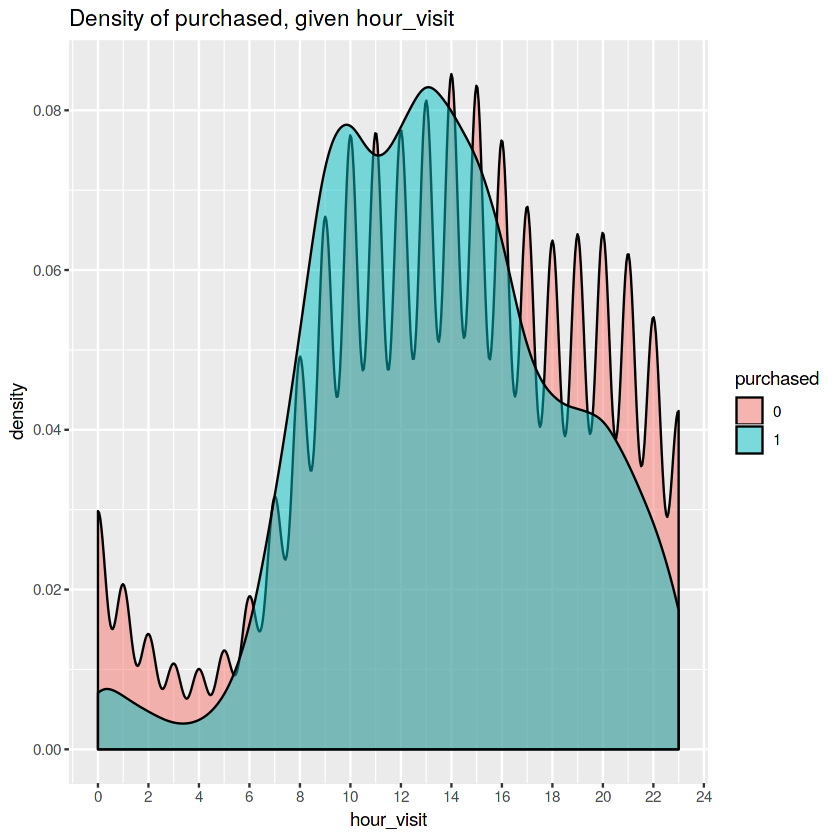

In [149]:
#hour_visit
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = hour_visit, fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given hour_visit") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

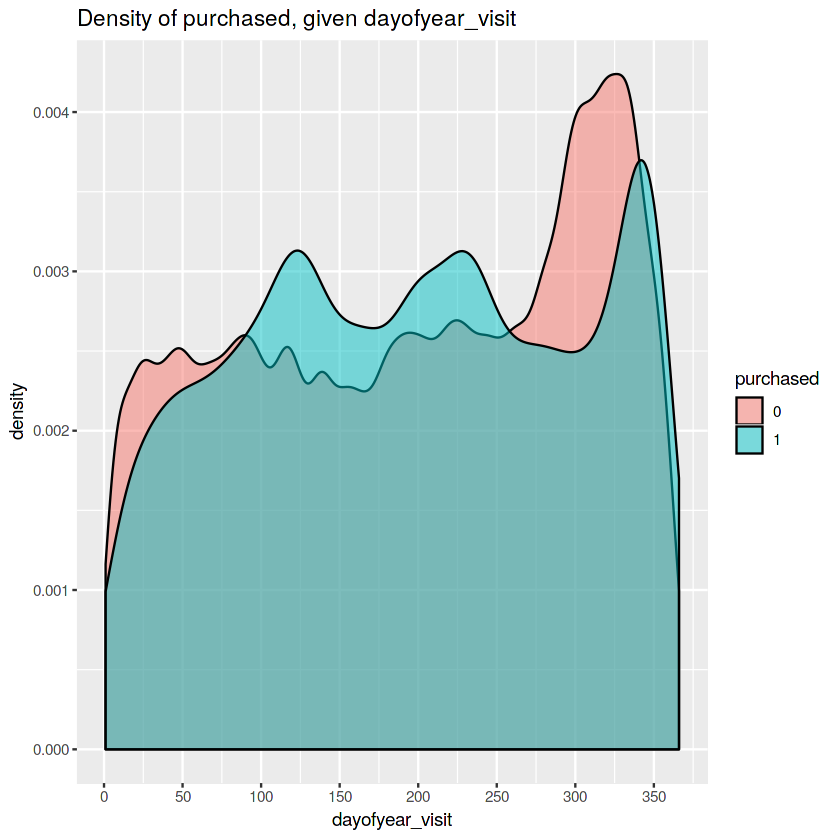

In [150]:
#dayofyear_visit
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = dayofyear_visit, fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given dayofyear_visit") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

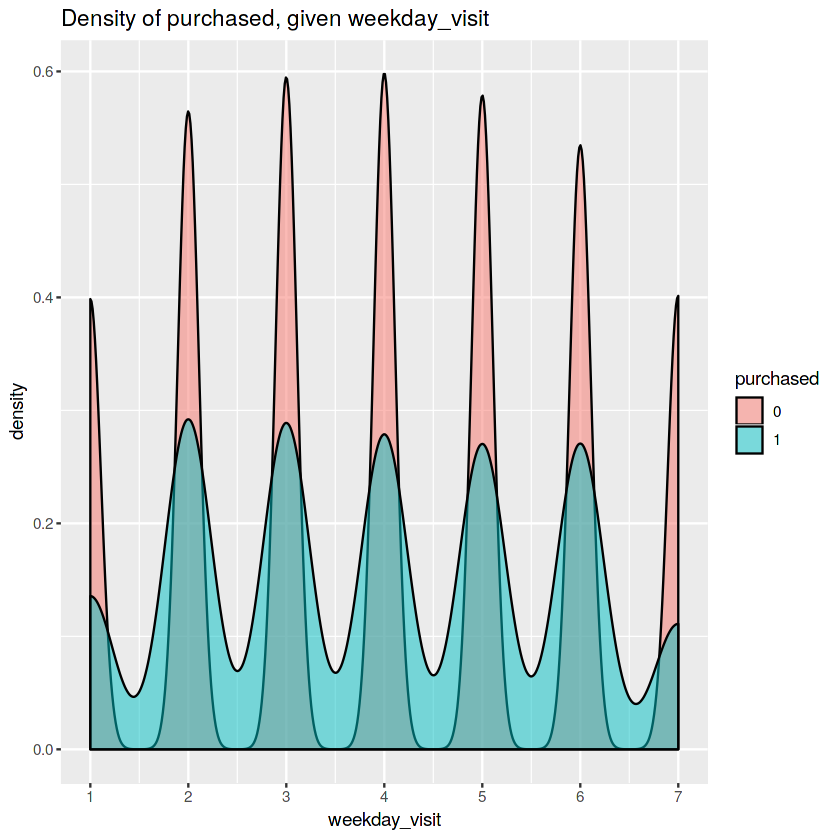

In [151]:
#weekday_visit
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = weekday_visit, fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given weekday_visit") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 7)) + theme_grey()

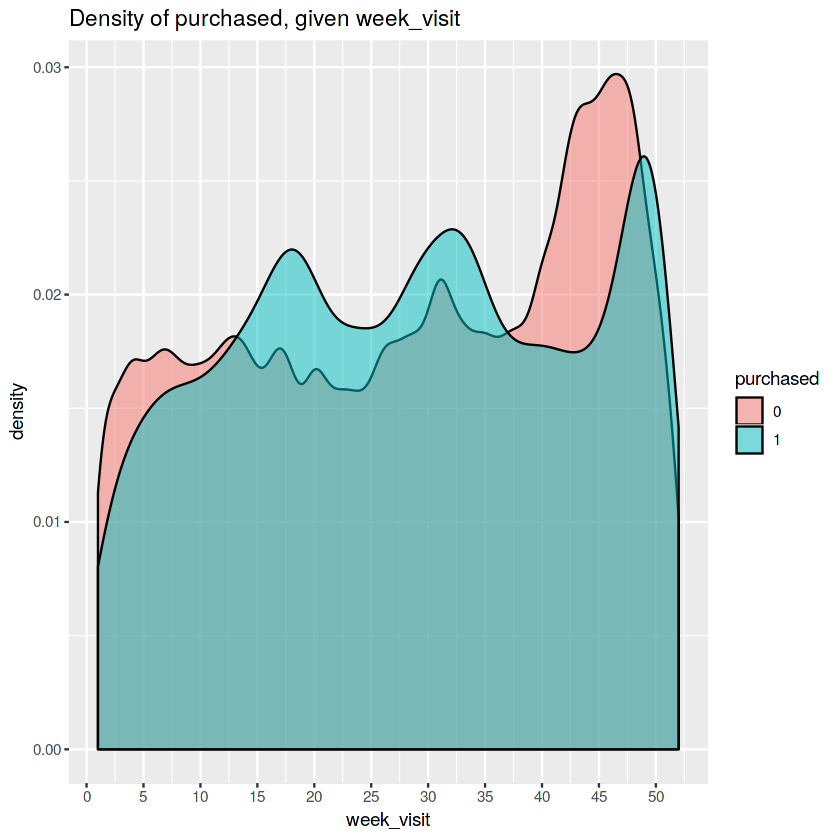

In [152]:
#week_visit
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = week_visit, fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given week_visit") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

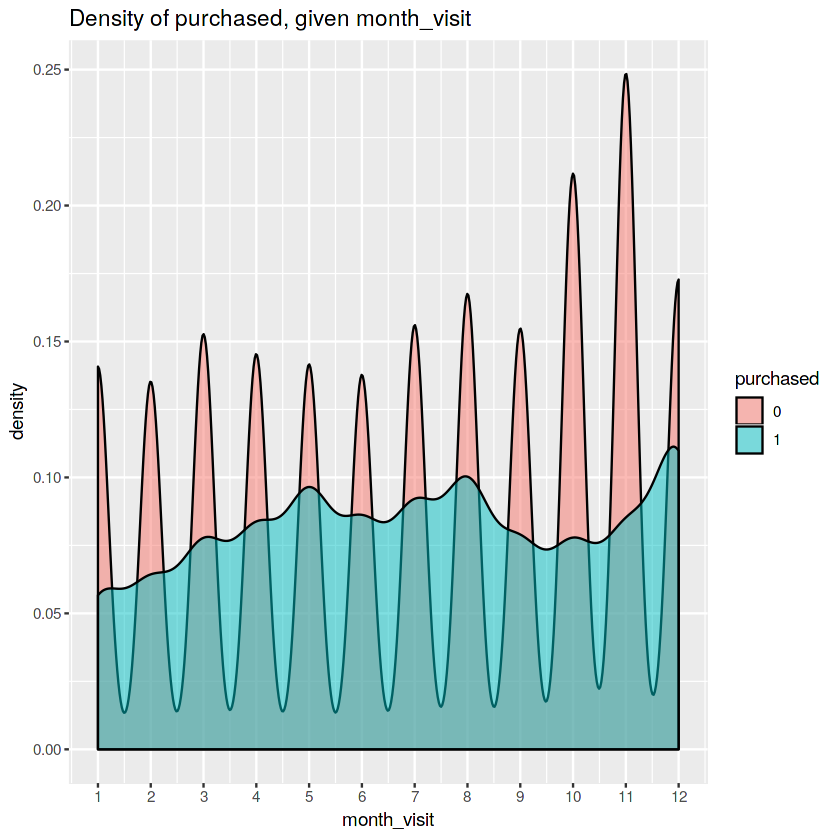

In [153]:
#month_visit
ggplot(tr_te[totals.transactionRevenue!=-1], aes(x = month_visit, fill = purchased)) +
geom_density(alpha=0.5, aes(fill=factor(purchased))) + labs(title="Density of purchased, given month_visit") +
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + theme_grey()

In [154]:
train <- tr_te[i_am_train==1]
test <- tr_te[i_am_train==0]

In [155]:
library(onehot)

In [156]:
colnames(train)

[1] "fullVisitorId"                               
 [2] "channelGrouping"                             
 [3] "date"                                        
 [4] "sessionId"                                   
 [5] "visitId"                                     
 [6] "visitNumber"                                 
 [7] "visitStartTime"                              
 [8] "device.browser"                              
 [9] "device.deviceCategory"                       
[10] "device.isMobile"                             
[11] "device.operatingSystem"                      
[12] "geoNetwork.city"                             
[13] "geoNetwork.continent"                        
[14] "geoNetwork.country"                          
[15] "geoNetwork.metro"                            
[16] "geoNetwork.networkDomain"                    
[17] "geoNetwork.region"                           
[18] "geoNetwork.subContinent"                     
[19] "totals.bounces"                              
[20] "totals.hits"                                 
[21] "totals.newVisits"                            
[22] "totals.pageviews"                            
[23] "totals.transactionRevenue"                   
[24] "trafficSource.adContent"                     
[25] "trafficSource.adwordsClickInfo.adNetworkType"
[26] "trafficSource.adwordsClickInfo.gclId"        
[27] "trafficSource.adwordsClickInfo.isVideoAd"    
[28] "trafficSource.adwordsClickInfo.page"         
[29] "trafficSource.adwordsClickInfo.slot"         
[30] "trafficSource.campaign"                      
[31] "trafficSource.isTrueDirect"                  
[32] "trafficSource.keyword"                       
[33] "trafficSource.medium"                        
[34] "trafficSource.referralPath"                  
[35] "trafficSource.source"                        
[36] "purchased"                                   
[37] "shift_visitStartTime"                        
[38] "max_visitStartTime"                          
[39] "min_visitStartTime"                          
[40] "cur_minus_max_visitStartTime"                
[41] "cur_minus_min_visitStartTime"                
[42] "max_minus_min_visitStartTime"                
[43] "ratio_visitStartTime"                        
[44] "no_geoNetwork.city"                          
[45] "no_geoNetwork.metro"                         
[46] "no_geoNetwork.region"                        
[47] "len_gclId"                                   
[48] "gclId_suffix"                                
[49] "i_am_train"                                  
[50] "shift_visitNumber"                           
[51] "max_visitNumber"                             
[52] "min_visitNumber"                             
[53] "cur_minus_max_visitNumber"                   
[54] "cur_minus_min_visitNumber"                   
[55] "total_num_visits"                            
[56] "is_last_visit"                               
[57] "only_visited_once"                           
[58] "last_visit_multiple_times"                   
[59] "maxtrainvisitNumber"                         
[60] "mintestvisitNumber"                          
[61] "timezoneoffset"                              
[62] "local_visitStartTime"                        
[63] "local_visitStartDateTime"                    
[64] "hour_visit"                                  
[65] "dayofyear_visit"                             
[66] "weekday_visit"                               
[67] "week_visit"                                  
[68] "month_visit"                                 
[69] "year_visit"                                  
[70] "trafficSource_contains_google"

In [157]:
colnames(test)

[1] "fullVisitorId"                               
 [2] "channelGrouping"                             
 [3] "date"                                        
 [4] "sessionId"                                   
 [5] "visitId"                                     
 [6] "visitNumber"                                 
 [7] "visitStartTime"                              
 [8] "device.browser"                              
 [9] "device.deviceCategory"                       
[10] "device.isMobile"                             
[11] "device.operatingSystem"                      
[12] "geoNetwork.city"                             
[13] "geoNetwork.continent"                        
[14] "geoNetwork.country"                          
[15] "geoNetwork.metro"                            
[16] "geoNetwork.networkDomain"                    
[17] "geoNetwork.region"                           
[18] "geoNetwork.subContinent"                     
[19] "totals.bounces"                              
[20] "totals.hits"                                 
[21] "totals.newVisits"                            
[22] "totals.pageviews"                            
[23] "totals.transactionRevenue"                   
[24] "trafficSource.adContent"                     
[25] "trafficSource.adwordsClickInfo.adNetworkType"
[26] "trafficSource.adwordsClickInfo.gclId"        
[27] "trafficSource.adwordsClickInfo.isVideoAd"    
[28] "trafficSource.adwordsClickInfo.page"         
[29] "trafficSource.adwordsClickInfo.slot"         
[30] "trafficSource.campaign"                      
[31] "trafficSource.isTrueDirect"                  
[32] "trafficSource.keyword"                       
[33] "trafficSource.medium"                        
[34] "trafficSource.referralPath"                  
[35] "trafficSource.source"                        
[36] "purchased"                                   
[37] "shift_visitStartTime"                        
[38] "max_visitStartTime"                          
[39] "min_visitStartTime"                          
[40] "cur_minus_max_visitStartTime"                
[41] "cur_minus_min_visitStartTime"                
[42] "max_minus_min_visitStartTime"                
[43] "ratio_visitStartTime"                        
[44] "no_geoNetwork.city"                          
[45] "no_geoNetwork.metro"                         
[46] "no_geoNetwork.region"                        
[47] "len_gclId"                                   
[48] "gclId_suffix"                                
[49] "i_am_train"                                  
[50] "shift_visitNumber"                           
[51] "max_visitNumber"                             
[52] "min_visitNumber"                             
[53] "cur_minus_max_visitNumber"                   
[54] "cur_minus_min_visitNumber"                   
[55] "total_num_visits"                            
[56] "is_last_visit"                               
[57] "only_visited_once"                           
[58] "last_visit_multiple_times"                   
[59] "maxtrainvisitNumber"                         
[60] "mintestvisitNumber"                          
[61] "timezoneoffset"                              
[62] "local_visitStartTime"                        
[63] "local_visitStartDateTime"                    
[64] "hour_visit"                                  
[65] "dayofyear_visit"                             
[66] "weekday_visit"                               
[67] "week_visit"                                  
[68] "month_visit"                                 
[69] "year_visit"                                  
[70] "trafficSource_contains_google"

In [158]:
chr <- train[,sapply(train, is.character)]
categorical_columns <- names(chr[chr])

In [159]:
categorical_columns

[1] "fullVisitorId"                               
 [2] "channelGrouping"                             
 [3] "sessionId"                                   
 [4] "device.browser"                              
 [5] "device.deviceCategory"                       
 [6] "device.operatingSystem"                      
 [7] "geoNetwork.city"                             
 [8] "geoNetwork.continent"                        
 [9] "geoNetwork.country"                          
[10] "geoNetwork.metro"                            
[11] "geoNetwork.networkDomain"                    
[12] "geoNetwork.region"                           
[13] "geoNetwork.subContinent"                     
[14] "trafficSource.adContent"                     
[15] "trafficSource.adwordsClickInfo.adNetworkType"
[16] "trafficSource.adwordsClickInfo.gclId"        
[17] "trafficSource.adwordsClickInfo.slot"         
[18] "trafficSource.campaign"                      
[19] "trafficSource.keyword"                       
[20] "trafficSource.medium"                        
[21] "trafficSource.referralPath"                  
[22] "trafficSource.source"                        
[23] "gclId_suffix"

In [160]:
#cat_cols <- c('channelGrouping','device.browser','device.deviceCategory','device.operatingSystem','geoNetwork.city','geoNetwork.continent','geoNetwork.country','geoNetwork.metro','geoNetwork.networkDomain','geoNetwork.region','geoNetwork.subContinent','trafficSource.adContent','trafficSource.adwordsClickInfo.adNetworkType','trafficSource.adwordsClickInfo.slot' 'trafficSource.campaign' 'trafficSource.keyword' 'trafficSource.medium' 'trafficSource.referralPath' 'trafficSource.source'

In [161]:
str(train)

Classes ‘data.table’ and 'data.frame':	903653 obs. of  70 variables:
 $ fullVisitorId                               : chr  "0000010278554503158" "0000020424342248747" "0000027376579751715" "0000039460501403861" ...
 $ channelGrouping                             : chr  "Organic Search" "Organic Search" "Organic Search" "Social" ...
 $ date                                        : Date, format: "2016-10-20" "2016-11-30" ...
 $ sessionId                                   : chr  "0000010278554503158_1477029466" "0000020424342248747_1480578901" "0000027376579751715_1486866293" "0000039460501403861_1490629516" ...
 $ visitId                                     : int  1477029466 1480578901 1486866293 1490629516 1486836571 1486838824 1471817208 1499645960 1491281649 1500505105 ...
 $ visitNumber                                 : int  1 1 1 1 1 2 1 1 1 1 ...
 $ visitStartTime                              : int  1477029466 1480578901 1486866293 1490629516 1486836571 1486838824 1471817208 1499645

In [162]:
feats <- c('channelGrouping','')

In [163]:
encoder<- onehot(head(train), stringsAsFactors=TRUE, addNA=FALSE)
bbalance<- predict(encoder, head(train))

Warning message in if (obj$type == "factor") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (i$type == "character") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (i$type == "factor") {:
“the condition has length > 1 and only the first element will be used”

In [164]:
colnames(train)

[1] "fullVisitorId"                               
 [2] "channelGrouping"                             
 [3] "date"                                        
 [4] "sessionId"                                   
 [5] "visitId"                                     
 [6] "visitNumber"                                 
 [7] "visitStartTime"                              
 [8] "device.browser"                              
 [9] "device.deviceCategory"                       
[10] "device.isMobile"                             
[11] "device.operatingSystem"                      
[12] "geoNetwork.city"                             
[13] "geoNetwork.continent"                        
[14] "geoNetwork.country"                          
[15] "geoNetwork.metro"                            
[16] "geoNetwork.networkDomain"                    
[17] "geoNetwork.region"                           
[18] "geoNetwork.subContinent"                     
[19] "totals.bounces"                              
[20] "totals.hits"                                 
[21] "totals.newVisits"                            
[22] "totals.pageviews"                            
[23] "totals.transactionRevenue"                   
[24] "trafficSource.adContent"                     
[25] "trafficSource.adwordsClickInfo.adNetworkType"
[26] "trafficSource.adwordsClickInfo.gclId"        
[27] "trafficSource.adwordsClickInfo.isVideoAd"    
[28] "trafficSource.adwordsClickInfo.page"         
[29] "trafficSource.adwordsClickInfo.slot"         
[30] "trafficSource.campaign"                      
[31] "trafficSource.isTrueDirect"                  
[32] "trafficSource.keyword"                       
[33] "trafficSource.medium"                        
[34] "trafficSource.referralPath"                  
[35] "trafficSource.source"                        
[36] "purchased"                                   
[37] "shift_visitStartTime"                        
[38] "max_visitStartTime"                          
[39] "min_visitStartTime"                          
[40] "cur_minus_max_visitStartTime"                
[41] "cur_minus_min_visitStartTime"                
[42] "max_minus_min_visitStartTime"                
[43] "ratio_visitStartTime"                        
[44] "no_geoNetwork.city"                          
[45] "no_geoNetwork.metro"                         
[46] "no_geoNetwork.region"                        
[47] "len_gclId"                                   
[48] "gclId_suffix"                                
[49] "i_am_train"                                  
[50] "shift_visitNumber"                           
[51] "max_visitNumber"                             
[52] "min_visitNumber"                             
[53] "cur_minus_max_visitNumber"                   
[54] "cur_minus_min_visitNumber"                   
[55] "total_num_visits"                            
[56] "is_last_visit"                               
[57] "only_visited_once"                           
[58] "last_visit_multiple_times"                   
[59] "maxtrainvisitNumber"                         
[60] "mintestvisitNumber"                          
[61] "timezoneoffset"                              
[62] "local_visitStartTime"                        
[63] "local_visitStartDateTime"                    
[64] "hour_visit"                                  
[65] "dayofyear_visit"                             
[66] "weekday_visit"                               
[67] "week_visit"                                  
[68] "month_visit"                                 
[69] "year_visit"                                  
[70] "trafficSource_contains_google"